# Loyalty Points Prediction model : Building prediction ML model

### Notebook by Yogesh Chandra Ramakrishna
#### Source of the Data : EY

<a id=Index><a/>

## Table of Contents

1. [Introduction](#Introduction)<br/>
2. [Required libraries](#Required-libraries)<br/>
3. [Problem Statement](#section3)<br/>
4. [Data Loading and Description](#section4)<br/>
5. [Data Profiling](#section5)<br/>
    - 5.1 [Understanding the Dataset](#section501)<br/>
    - 5.2 [Pre Profiling](#section502)<br/>
    - 5.3 [Processing](#section503)<br/>
     - 5.3.1 [Correlation among each Data variables](#section5031)<br/>
     - 5.3.2 [Data Imputation](#section5032)<br/>
     - 5.3.3 [Log Transform the skewed features](#section5033)<br/>
     - 5.3.4 [Converting Categorical Features](#section5034)<br/>
     - 5.3.5 [Choosing the Features for Modeling and handeling Multicollinearity](#section5035)<br/>
    - 5.4 [Post Profiling](#section504)<br/>
6. [Questions](#section6)<br/>
    - 6.1 [Grouping all the Prices with respect to Overall Quality](#section601)<br/>
    - 6.2 [Does Height of the basement and Exterior material quality have negetive impact on Sale Price ?](#section602)<br/>
    - 6.3 [Negetive correlated parameters with respect to Sale Price](#section603)<br/>
    - 6.4 [Positive correlated parameters with respect to Sale Price](#section604)<br/>
    - 6.5 [Analyse Sale Price with other variables, other than selected variables](#section605)<br/>
7. [Conclusion for EDA](#section7)<br/>
8. [Machine Learning Data Model](#section8)<br/>
    - 8.1 [Linear Regression](#section801)<br/>
     - 8.1.1 [Introduction to Linear Regression](#section8011)<br/>
     - 8.1.2 [Assumptions of Linear Regression](#section8012)<br/>
     - 8.1.3 [Modeling with 'Set A' Data](#section8013)<br/>
     - 8.1.4 [Modeling with 'Set B' Data](#section8014)<br/>
     - 8.1.5 [Modeling with 'Set C' Data : Feature Selection](#section8015)<br/>
     - 8.1.6 [Hyper-parameter optimizers - GridSearchCV](#section8016)<br/>
    - 8.2 [Decision Tree Regressor](#section802)<br/>
     - 8.2.1 [Introduction of Decision Tree](#section8021)<br/>
     - 8.2.2 [Types of Decision Trees](#section8022)<br/>
     - 8.2.3 [Advantages of using Decision Tree](#section8023)<br/>
     - 8.2.4 [Shortcomings of Decision Trees](#section8024)<br/>
     - 8.2.5 [Preparing X and y using pandas](#section8025)<br/>
     - 8.2.6 [Splitting X and y into training and test datasets](#section8026)<br/>
     - 8.2.7 [Decision Tree in scikit-learn](#section8027)<br/>
     - 8.2.8 [Decision Tree with Gridsearch](#section8028)<br/>
    - 8.3 [Random Forest Regressor](#section803)<br/>
     - 8.3.1 [Introduction to Random Forest](#section8031)<br/>
     - 8.3.2 [Concept behind random forest](#section8032)<br/>
     - 8.3.3 [Advantages and Disadvantages](#section8033)<br/>
     - 8.3.4 [Preparing X and y using pandas](#section8034)<br/>
     - 8.3.5 [Splitting X and y into training and test datasets](#section8035)<br/>
     - 8.3.6 [Random Forest in scikit-learn](#section8036)<br/>
     - 8.3.7 [Random forest with RandomizedsearchCV](#section8037)<br/>
9. [Model Selection](#section9)<br/>
10. [Conclusion and Reference](#section10)<br/>

<a id=Introduction><a/>

## 1. Introduction

The notebooks explores the basic use of __Numpy__,__Pandas__, __Seaborn__ and will cover the commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

And also we will be using __scikit learn__ and various __Machine Learning__ algorithms, to build a predictive model, I will be doing some Statistical analysys to make this Model as accurate as possible.


* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes
    
    
* __Statistical Overview__ <br/>
Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the tests and see how we are doing with our predictions.


* __Machine Learning Modeling__ <br/>
The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

#### [Back to Index](#Index)

<a id=Required-libraries><a/>

## 2. Required libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **cufflinks**: interactive graphs
* **Scikit-learn**: is a machine learning library for the Python programming language.

__Note: Will import Scikit-learn libraries in the modeling section itself__

In [389]:
import numpy as np
import pandas as pd   
import pandas_profiling
import matplotlib.pyplot as plt                          
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output

import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

from IPython.core.display import Image, display

#### [Back to Index](#Index)

<a id=section3><a/>

## 3. Problem Statement

A credit card company is in process of making their marketing strategy dynamic. As part of the process, they need to understand their users’ loyalty and segment them accordingly. As a next step, they need you to come up with an algorithm to assign a loyalty score for each card user. 

#### [Back to Index](#Index)

<a id=section4><a/>

## 4. Data Loading and Description

We are provided with the below mentioned files.

- train.csv - the training set.
- test.csv - the test set.
- historical_transactions.csv - historical transactions for each card_id.
- new_merchants.csv - Contains all purchases that card_id made at new merchants that were not visited in the historical data..


In [390]:
dftrain = pd.read_csv('../RawData/train.csv')
dftest = pd.read_csv('../RawData/test.csv')
dfhist = pd.read_csv('../RawData/historical_transactions.csv')
dfnewm = pd.read_csv('../RawData/new_merchants.csv') 

#### [Back to Index](#Index)

<a id=section5><a/>

## 5. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erroneous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section501><a/>

### 5.1 Understanding the Dataset

__Training data__

In [391]:
dftrain.shape

(1000, 6)

In [392]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
first_active_month    1000 non-null object
card_id               1000 non-null object
feature_1             1000 non-null int64
feature_2             1000 non-null int64
feature_3             1000 non-null int64
loyalty_score         1000 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [393]:
dftrain.get_dtype_counts()

float64    1
int64      3
object     2
dtype: int64

In [394]:
dftrain.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-04  C_ID_3c7fa72a88          3          3          1   
1            2017-11  C_ID_0e88908f2f          2          2          0   
2            2017-10  C_ID_f0c9288c95          3          1          1   
3            2017-08  C_ID_cd14e3a35a          3          1          1   
4            2017-10  C_ID_4d0a9b9fdb          5          2          1   

   loyalty_score  
0       1.463612  
1      -0.086608  
2       1.367614  
3      -1.245025  
4       0.293999

In [395]:
dftrain.tail()

first_active_month          card_id  feature_1  feature_2  feature_3  \
995            2017-03  C_ID_e0d0f3abf9          3          2          1   
996            2017-06  C_ID_6124e127be          3          1          1   
997            2016-08  C_ID_e9e91ccc01          2          2          0   
998            2017-08  C_ID_ee04be1c2b          2          3          0   
999            2015-05  C_ID_d5b94ab620          5          1          1   

     loyalty_score  
995       0.027764  
996      -1.108213  
997       2.677916  
998      -0.009854  
999      -0.103959

__Statistics using Pandas__

In [396]:
dftrain.describe(include=np.object).transpose()

count unique              top freq
first_active_month  1000     51          2017-08   86
card_id             1000   1000  C_ID_e865afbc2a    1

In [397]:
dftrain.describe(include=np.number).transpose()

count      mean       std        min       25%  50%       75%  \
feature_1      1000.0  3.090000  1.200559   1.000000  2.000000  3.0  4.000000   
feature_2      1000.0  1.741000  0.747314   1.000000  1.000000  2.0  2.000000   
feature_3      1000.0  0.556000  0.497103   0.000000  0.000000  1.0  1.000000   
loyalty_score  1000.0 -0.328057  3.832130 -33.219281 -0.752286  0.0  0.807518   

                    max  
feature_1      5.000000  
feature_2      3.000000  
feature_3      1.000000  
loyalty_score  8.011238

#### Observation
- This data contains 6 attributes and 1000 observations.
- This data contains 4 continues variables and 2 categorical (Object) variables.
- This data has no missing values or null values.
- When we see at the Descriptive statistics using Pandas, data may have some outliers.
- This data contains the Target variable 'loyalty_score'.

__Test data__

In [398]:
dftest.shape

(200, 5)

In [399]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
first_active_month    200 non-null object
card_id               200 non-null object
feature_1             200 non-null int64
feature_2             200 non-null int64
feature_3             200 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [400]:
dftest.get_dtype_counts()

int64     3
object    2
dtype: int64

In [401]:
dftest.head()


first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-07  C_ID_2705885163          2          1          0
1            2016-06  C_ID_096b6fa30d          2          2          0
2            2016-12  C_ID_3e1c208f74          1          3          0
3            2017-09  C_ID_23995c6879          5          1          1
4            2017-01  C_ID_7d0553395a          4          2          0

In [402]:
dftest.tail()

first_active_month          card_id  feature_1  feature_2  feature_3
195            2015-06  C_ID_9e7dc9975f          5          1          1
196            2017-09  C_ID_dba5fd0804          2          2          0
197            2017-07  C_ID_ddfe181daf          3          1          1
198            2017-08  C_ID_49f413b8a7          4          3          0
199            2017-09  C_ID_92f026f602          5          2          1

__Statistics using Pandas__

In [403]:
dftest.describe(include=np.object).transpose()

count unique              top freq
first_active_month   200     38          2017-10   22
card_id              200    200  C_ID_2d5078079f    1

In [404]:
dftest.describe(include=np.number).transpose()

count   mean       std  min  25%  50%  75%  max
feature_1  200.0  2.980  1.190245  1.0  2.0  3.0  4.0  5.0
feature_2  200.0  1.775  0.772892  1.0  1.0  2.0  2.0  3.0
feature_3  200.0  0.530  0.500352  0.0  0.0  1.0  1.0  1.0

#### Observation
- This data contains 5 attributes and 200 observations.
- This data contains 3 continues variables and 2 categorical (Object) variables.
- This data has no missing values or null values. 

__Historical Transactions__

In [405]:
dfhist.shape

(103617, 14)

In [406]:
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103617 entries, 0 to 103616
Data columns (total 14 columns):
authorized_flag         103617 non-null object
card_id                 103617 non-null object
city_id                 103617 non-null int64
category_1              103617 non-null object
installments            103617 non-null int64
category_3              102970 non-null object
merchant_category_id    103617 non-null int64
merchant_id             103159 non-null object
month_lag               103617 non-null int64
purchase_amount         103617 non-null float64
purchase_date           103617 non-null object
category_2              94284 non-null float64
state_id                103617 non-null int64
subsector_id            103617 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.1+ MB


In [407]:
dfhist.get_dtype_counts()

float64    2
int64      6
object     6
dtype: int64

In [408]:
dfhist.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_ea299331ff      200          N             0   
1               Y  C_ID_ea299331ff      200          N             0   
2               Y  C_ID_ea299331ff      200          N             0   
3               Y  C_ID_ea299331ff      200          N             0   
4               Y  C_ID_ea299331ff      200          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                   690  M_ID_7ecb602096         -5   
1          A                   705  M_ID_e95b1970c2        -10   
2          A                   307  M_ID_77d5389a7e         -3   
3          A                   705  M_ID_e95b1970c2         -4   
4          A                   705  M_ID_9a24c5f117          0   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.351846  2017-09-15 21:15:41         2.0        18             1  
1        -0.603029  2017-04-29 09:46:35         2.0        18            33  
2        -0.656749  2017-11-29 00:00:00         2.0        18            19  
3        -0.557754  2017-10-04 13:45:29         2.0        18            33  
4        -0.603375  2018-02-28 11:38:42         2.0        18            33

In [409]:
dfhist.tail()


authorized_flag          card_id  city_id category_1  installments  \
103612               Y  C_ID_37e23fe25f       69          N             1   
103613               Y  C_ID_37e23fe25f       69          N             1   
103614               Y  C_ID_37e23fe25f       69          N             1   
103615               Y  C_ID_37e23fe25f      231          N             2   
103616               Y  C_ID_37e23fe25f      276          N             1   

       category_3  merchant_category_id      merchant_id  month_lag  \
103612          B                    45  M_ID_faa485b5f8        -10   
103613          B                    45  M_ID_4e461f7e14         -8   
103614          B                   307  M_ID_64a87fe046         -6   
103615          C                   706  M_ID_5602afc7a9        -10   
103616          B                    45  M_ID_3827624835         -6   

        purchase_amount        purchase_date  category_2  state_id  \
103612        -0.234429  2017-03-31 19:28:18         1.0         9   
103613        -0.357721  2017-05-06 10:03:51         1.0         9   
103614        -0.521510  2017-07-27 14:39:04         1.0         9   
103615        -0.626696  2017-03-27 22:02:23         1.0         9   
103616        -0.300620  2017-07-10 13:42:25         1.0         9   

        subsector_id  
103612            18  
103613            18  
103614            19  
103615            26  
103616            18

__Statistics using Pandas__

In [410]:
dfhist.describe(include=np.object).transpose()

count  unique                  top   freq
authorized_flag  103617       2                    Y  94755
card_id          103617    1200      C_ID_e26f207f0d   1021
category_1       103617       2                    N  96106
category_3       102970       3                    A  54655
merchant_id      103159   24548      M_ID_00a6ca8a8a   3781
purchase_date    103617  100456  2017-11-25 00:00:00     92

In [411]:
dfhist.describe(include=np.number).transpose()

count        mean         std        min         25%  \
city_id               103617.0  131.304651  106.051521  -1.000000   53.000000   
installments          103617.0    0.638457    1.165694  -1.000000    0.000000   
merchant_category_id  103617.0  476.322360  249.714858  -1.000000  307.000000   
month_lag             103617.0   -4.464325    3.565023 -13.000000   -7.000000   
purchase_amount       103617.0   -0.516712   10.656509  -0.746893   -0.720206   
category_2             94284.0    2.279570    1.519157   1.000000    1.000000   
state_id              103617.0   10.718907    6.572397  -1.000000    8.000000   
subsector_id          103617.0   26.773358    9.698611  -1.000000   19.000000   

                             50%         75%          max  
city_id                89.000000  212.000000   345.000000  
installments            0.000000    1.000000    12.000000  
merchant_category_id  451.000000  705.000000   891.000000  
month_lag              -4.000000   -2.000000     0.000000  
purchase_amount        -0.689807   -0.608213  2854.778875  
category_2              1.000000    3.000000     5.000000  
state_id                9.000000   16.000000    24.000000  
subsector_id           29.000000   34.000000    41.000000

#### Observation
- This data contains 14 attributes and over 103,617 observations.

- This data contains 8 continues variables and 6 categorical (Object) variables.
- This data has some missing values or null values. 


__New Merchants__

In [412]:
dfnewm.shape

(6740, 14)

In [413]:
dfnewm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 14 columns):
authorized_flag         6740 non-null object
card_id                 6740 non-null object
city_id                 6740 non-null int64
category_1              6740 non-null object
installments            6740 non-null int64
category_3              6528 non-null object
merchant_category_id    6740 non-null int64
merchant_id             6651 non-null object
month_lag               6740 non-null int64
purchase_amount         6740 non-null float64
purchase_date           6740 non-null object
category_2              6390 non-null float64
state_id                6740 non-null int64
subsector_id            6740 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 737.3+ KB


In [414]:
dfnewm.get_dtype_counts()

float64    2
int64      6
object     6
dtype: int64

In [415]:
dfnewm.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_89f5a36cc3       69          N             2   
1               Y  C_ID_89f5a36cc3      231          N             1   
2               Y  C_ID_89f5a36cc3       69          N             1   
3               Y  C_ID_89f5a36cc3       69          N             1   
4               Y  C_ID_6a9d23ccea      261          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          C                   879  M_ID_00a6ca8a8a          1   
1          B                   108  M_ID_e6570d8726          1   
2          B                   273  M_ID_32d73b8ecf          2   
3          B                    80  M_ID_c03b62d83d          2   
4          A                   437  M_ID_d179007279          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.446378  2017-06-29 17:16:52         1.0         9            29  
1        -0.634509  2017-06-20 12:15:31         1.0         9            34  
2        -0.626696  2017-07-20 14:21:23         1.0         9            20  
3        -0.677786  2017-07-20 14:05:10         1.0         9            37  
4        -0.620460  2018-03-26 18:35:19         1.0         9            15

In [416]:
dfnewm.tail()

authorized_flag          card_id  city_id category_1  installments  \
6735               Y  C_ID_3663065c2b       69          N             1   
6736               Y  C_ID_7ccf73bad1      213          N             0   
6737               Y  C_ID_36b8a69099      171          N             0   
6738               Y  C_ID_2747b3a8ec      212          N            -1   
6739               Y  C_ID_117f10cbf0       57          N             0   

     category_3  merchant_category_id      merchant_id  month_lag  \
6735          B                   369  M_ID_4d7fc5ce8c          1   
6736          A                   769  M_ID_fc9d07d7e9          2   
6737          A                   437  M_ID_5a78e46f40          1   
6738        NaN                    34  M_ID_d1f0c32fe8          1   
6739          A                   289  M_ID_a145355307          1   

      purchase_amount        purchase_date  category_2  state_id  subsector_id  
6735         0.650558  2018-03-16 15:02:18         1.0         9            27  
6736        -0.734286  2018-04-19 15:26:11         1.0         9            32  
6737        -0.657560  2017-07-31 10:19:18         5.0        21            15  
6738        -0.228493  2018-03-13 14:00:09         4.0         4            38  
6739        -0.608664  2017-12-23 16:07:49         5.0         5            27

__Statistics using Pandas__

In [417]:
dfnewm.describe(include=np.object).transpose()

count unique                  top  freq
authorized_flag  6740      1                    Y  6740
card_id          6740   1000      C_ID_4728910dbf    55
category_1       6740      2                    N  6545
category_3       6528      3                    A  3170
merchant_id      6651   5439      M_ID_00a6ca8a8a    84
purchase_date    6740   6686  2017-11-18 00:00:00     6

In [418]:
dfnewm.describe(include=np.number).transpose()

count        mean         std       min         25%  \
city_id               6740.0  134.405490  102.401206 -1.000000   66.000000   
installments          6740.0    0.667804    1.174064 -1.000000    0.000000   
merchant_category_id  6740.0  431.197774  242.981465  2.000000  278.000000   
month_lag             6740.0    1.477893    0.499548  1.000000    1.000000   
purchase_amount       6740.0   -0.570416    0.410548 -0.746893   -0.716111   
category_2            6390.0    2.219249    1.502220  1.000000    1.000000   
state_id              6740.0   11.206380    6.227663 -1.000000    9.000000   
subsector_id          6740.0   26.097478   10.081674  1.000000   19.000000   

                             50%         75%         max  
city_id               101.000000  213.000000  344.000000  
installments            0.000000    1.000000   12.000000  
merchant_category_id  367.000000  683.000000  891.000000  
month_lag               1.000000    2.000000    2.000000  
purchase_amount        -0.675149   -0.584482    9.382794  
category_2              1.000000    3.000000    5.000000  
state_id                9.000000   16.000000   24.000000  
subsector_id           29.000000   34.000000   41.000000

#### Observation

- This data contains 14 attributes and 6740 observations.
- This data contains 8 continues variables and 6 categorical (Object) variables.
- This data has some missing values or null values. 


#### [Back to Index](#Index)

<a id=section502><a/>

### 5.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contains all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

__Training Data__

In [419]:
profile = pandas_profiling.ProfileReport(dftrain)
profile.to_file(outputfile="../PandasProfiling/TrainingData_Pre_Profiling.html")

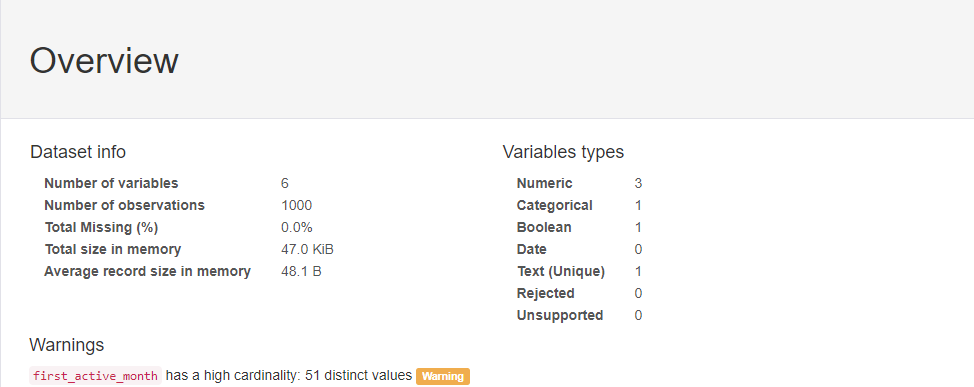

In [420]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/Training_Profile.png", width=800, unconfined=True))

__Observation__
- From Preprofiling we can get a clear picture of the data, refer __"TrainingData_Pre_Profiling.html"__ for more clarity.
- From the above summary image we can see that there are zero missing data’s.

__Test Data__

In [421]:
profile = pandas_profiling.ProfileReport(dftest)
profile.to_file(outputfile="../PandasProfiling/TestData_Pre_Profiling.html")

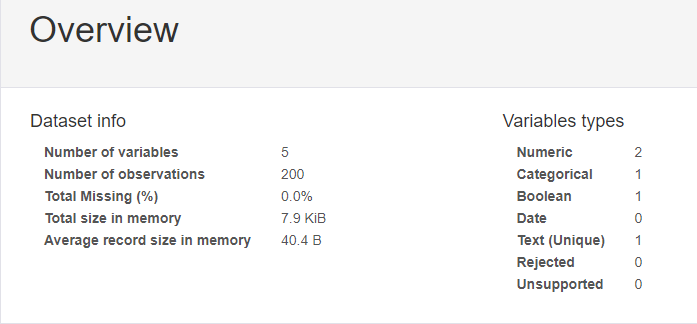

In [422]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/Testing_Profile.png", width=600, unconfined=True))

__Observation__

- From Preprofiling we can get a clear picture of the data, refer __"TestData_Pre_Profiling.html"__ for more clarity.
- From the above summary image we can see that there are zero missing data’s.

__Historical Transaction__

In [423]:
profile = pandas_profiling.ProfileReport(dfhist)
profile.to_file(outputfile="../PandasProfiling/HistoricalData_Pre_Profiling.html")

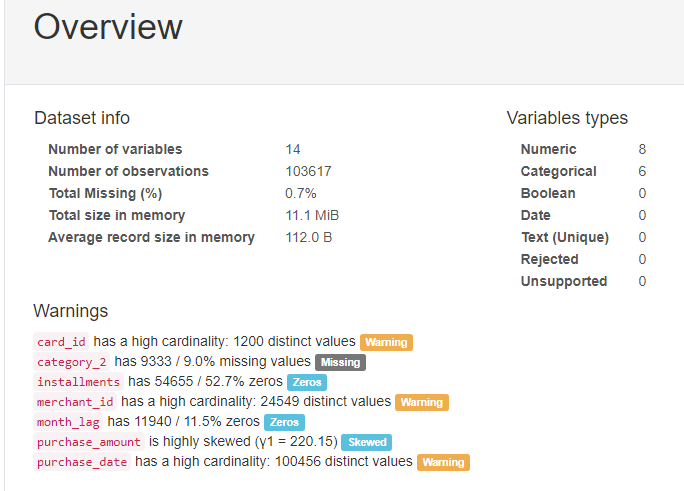

In [424]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/HistoriData_Profile.png", width=600, unconfined=True))

__Observation__
- From Preprofiling we can get a clear picture of the data, refer __"HistoricalData_Pre_Profiling.html"__ for more clarity.
- From the above summary image we can see that there are 0.7% of missing data and some Zero values.
- We will see what can be done in our next section.

__New Transaction Data__

In [425]:
profile = pandas_profiling.ProfileReport(dfnewm)
profile.to_file(outputfile="../PandasProfiling/Newmerchants_Pre_Profiling.html")

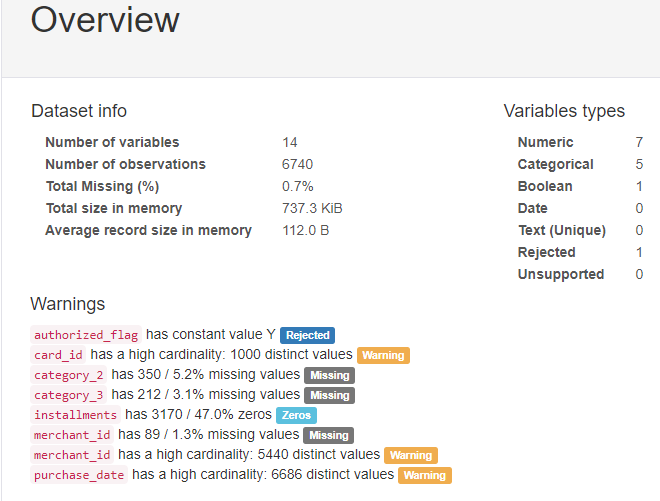

In [426]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/NewMerchent.png", width=600, unconfined=True))

__Observation__
- From Preprofiling we can get a clear picture of the data, refer __"Newmerchants_Pre_Profiling.html"__ for more clarity.
- From the above summary image we can see that there are 0.7% of missing data and some Zero values.
- We will see what can be done in our next section.


#### [Back to Index](#Index)

<a id=section503><a/>

### 5.3 Data Processing

- Lets have some clear count on how many data’s are missing in __Numerical columns__ and __Categorical columns__ separately
- Wee shall look at Historical and New merchants data first.

__Historical Data__

In [427]:
dfhist.columns[dfhist.dtypes!=object]

Index(['city_id', 'installments', 'merchant_category_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id'],
      dtype='object')

In [428]:
mynonObjlist = []
mynonObjlist = dfhist.columns[dfhist.dtypes!=object]

for each in mynonObjlist:
    if dfhist[each].dtypes == np.object:
        print('Its an Object')
    elif dfhist[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, dfhist[each].isnull().sum()))

category_2 ------ : 9333


In [429]:
dfhist.columns[dfhist.dtypes==object]

Index(['authorized_flag', 'card_id', 'category_1', 'category_3', 'merchant_id',
       'purchase_date'],
      dtype='object')

In [430]:
mynonObjlist = []
mynonObjlist = dfhist.columns[dfhist.dtypes==object]

for each in mynonObjlist:
    if dfhist[each].dtypes != np.object:
        print('Its an Object')
    elif dfhist[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, dfhist[each].isnull().sum()))

category_3 ------ : 647
merchant_id ------ : 458


<Figure size 2000x2000 with 0 Axes>

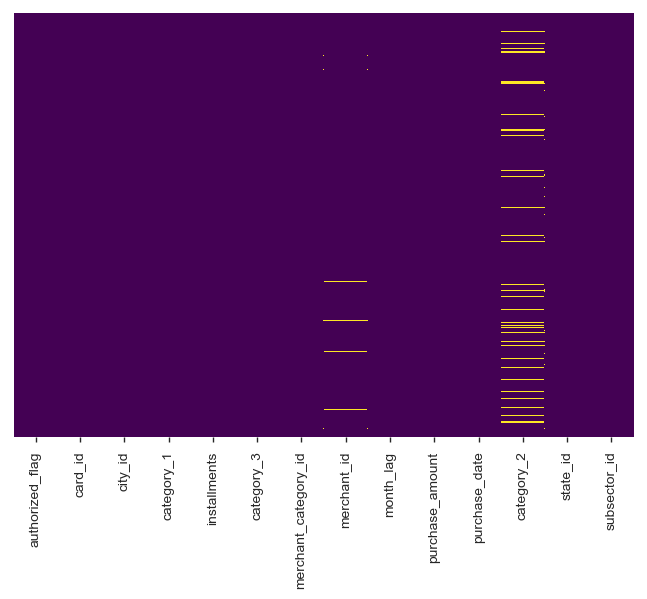

<Figure size 2000x2000 with 0 Axes>

In [431]:
## Missig Data heatmap

sns.heatmap(dfhist.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

__Observation__

- We can see that, 1 columns out of 8 columns (Numerical data type) are having Null values.

  - __category_2 ------ : 9333__

- We can see that, 2 columns out of 6 columns (Object data type) are having Null values.

  - __category_3 ------ : 647__
  - __merchant_id ------ : 458__

- In the above heat map, all the missing values are marked by yellow color.

__New merchants Data__

In [432]:
dfnewm.columns[dfnewm.dtypes!=object]

Index(['city_id', 'installments', 'merchant_category_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id'],
      dtype='object')

In [433]:
mynonObjlist = []
mynonObjlist = dfnewm.columns[dfnewm.dtypes!=object]

for each in mynonObjlist:
    if dfnewm[each].dtypes == np.object:
        print('Its an Object')
    elif dfnewm[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, dfnewm[each].isnull().sum()))

category_2 ------ : 350


In [434]:
mynonObjlist = []
mynonObjlist = dfnewm.columns[dfnewm.dtypes==object]

for each in mynonObjlist:
    if dfnewm[each].dtypes != np.object:
        print('Its an Object')
    elif dfnewm[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, dfnewm[each].isnull().sum()))

category_3 ------ : 212
merchant_id ------ : 89


<Figure size 2000x2000 with 0 Axes>

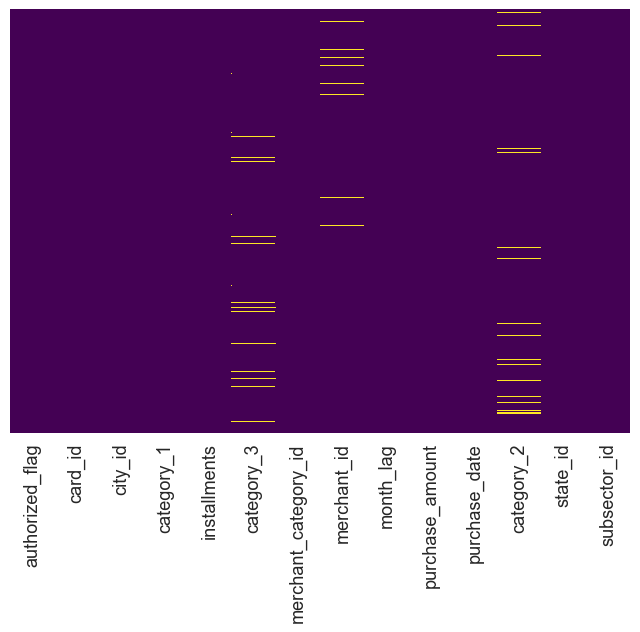

<Figure size 2000x2000 with 0 Axes>

In [435]:
## Missig Data heatmap

sns.heatmap(dfnewm.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

__Observation__

- We can see that, 1 columns out of 8 columns (Numerical data type) are having Null values.

  - __category_2 ------ : 350__

- We can see that, 2 columns out of 6 columns (Object data type) are having Null values.

  - __category_3 ------ : 212__
  - __merchant_id ------ : 89__

- In the above heat map, all the missing values are marked by yellow color.

#### [Back to Index](#Index)

#### Correlation with target variable

__Training Data__

In [436]:
corr=dftrain.corr()["loyalty_score"]
corr[np.argsort(corr, axis=0)[::-1]]

loyalty_score    1.000000
feature_2       -0.009027
feature_1       -0.029475
feature_3       -0.044424
Name: loyalty_score, dtype: float64

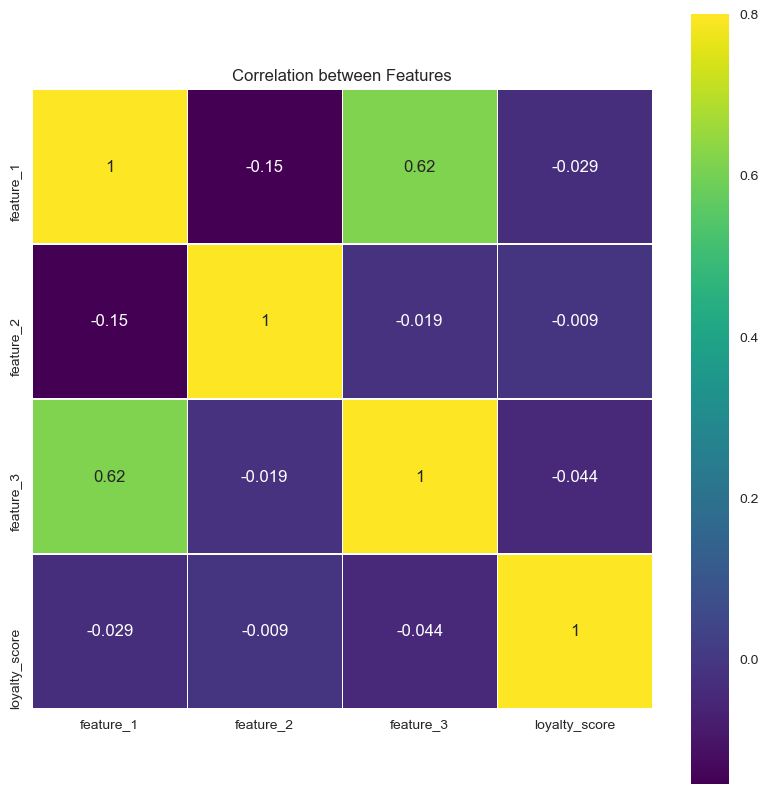

In [437]:
corrMatrix = dftrain.corr()

sns.set(font_scale=1)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between Features');

__Multicollinearity__

In [438]:
correlations = dftrain.corr()# taking correlation into variable
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
0  (feature_1, feature_3)     0.617171

__Observation__
-	This was just a simple calculation of correlation in training data.
-	We shall see more after the data set are merged.
-	We can see there is no good correlation between the input variables and target variables.
-	We need more attributes to make this data set better for our models
-	We shall merge few data columns and see what correlation we can get.


#### [Back to Index](#Index)

<a id=section5031><a/>

#### Working on missing data

In [439]:
dfhist.columns[dfhist.isnull().any()]

Index(['category_3', 'merchant_id', 'category_2'], dtype='object')

In [440]:
[col for col in dfhist.columns if dfhist[col].isnull().any() if dfhist[col].dtypes==object]

['category_3', 'merchant_id']

__Lets see the frequency of the object dtype columns__

In [441]:
dfhist['category_3'].value_counts()

A    54655
B    41912
C     6403
Name: category_3, dtype: int64

In [442]:
dfhist['merchant_id'].value_counts()

M_ID_00a6ca8a8a    3781
M_ID_e5374dabc0    1909
M_ID_9139332ccc    1313
M_ID_50f575c681     596
M_ID_fc7d7969c3     588
M_ID_5ba019a379     569
M_ID_1f4773aa76     497
M_ID_86be58d7e0     408
M_ID_445742726b     322
M_ID_d855771cd9     305
M_ID_6f274b9340     290
M_ID_f86439cec0     289
M_ID_26d4fadb60     277
M_ID_98b342c0e3     257
M_ID_57df19bf28     251
M_ID_19171c737a     248
M_ID_82a30d9203     233
M_ID_cd2c0b07e9     216
M_ID_48257bb851     215
M_ID_aea2ca4a31     214
M_ID_b5b80addf5     205
M_ID_a3ee416a9f     200
M_ID_d33bc89fdd     200
M_ID_c9cc03462e     189
M_ID_2c4b8c61f6     180
M_ID_f416f2710c     180
M_ID_2637773dd2     170
M_ID_c03b62d83d     156
M_ID_548f18cdd2     154
M_ID_b98db225f5     152
                   ... 
M_ID_a42b24388d       1
M_ID_200e501a78       1
M_ID_195d4f36b2       1
M_ID_2a337323e1       1
M_ID_0b5f22adb4       1
M_ID_548ffd4c2e       1
M_ID_70fa6aa570       1
M_ID_9ebc8708c1       1
M_ID_994895d0d6       1
M_ID_9562e4320f       1
M_ID_baddcec157 

__'category_2' variable is a numerical variable, we will take the highest frequency of the variable since it’s a categorical entity__

In [443]:
dfhist['category_2'].value_counts()

1.0    50062
3.0    17560
5.0    13205
4.0     9623
2.0     3834
Name: category_2, dtype: int64

__Lets replace missing values in all these above columns__

In [444]:
dfhist['category_2'].fillna(1.0,inplace=True)
dfhist['category_3'].fillna('A',inplace=True)
dfhist['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

In [445]:
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103617 entries, 0 to 103616
Data columns (total 14 columns):
authorized_flag         103617 non-null object
card_id                 103617 non-null object
city_id                 103617 non-null int64
category_1              103617 non-null object
installments            103617 non-null int64
category_3              103617 non-null object
merchant_category_id    103617 non-null int64
merchant_id             103617 non-null object
month_lag               103617 non-null int64
purchase_amount         103617 non-null float64
purchase_date           103617 non-null object
category_2              103617 non-null float64
state_id                103617 non-null int64
subsector_id            103617 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 11.1+ MB


In [446]:
dfhist.columns[dfhist.isnull().any()]

Index([], dtype='object')

- __No missing data in Historice Data set__
- __Lets proceed to New Merchants data set __

In [447]:
dfnewm.columns[dfnewm.isnull().any()]

Index(['category_3', 'merchant_id', 'category_2'], dtype='object')

__We have the same columns like above, lets check the frequency and replace the data__

In [448]:
dfnewm['category_3'].value_counts()

A    3170
B    2829
C     529
Name: category_3, dtype: int64

In [449]:
dfnewm['merchant_id'].value_counts()

M_ID_00a6ca8a8a    84
M_ID_cd2c0b07e9    57
M_ID_9139332ccc    51
M_ID_50f575c681    40
M_ID_725a60d404    25
M_ID_a9d91682ad    20
M_ID_f2045dd267    16
M_ID_d855771cd9    13
M_ID_e5374dabc0    13
M_ID_59764e8cb1    13
M_ID_98b342c0e3    13
M_ID_f86439cec0    12
M_ID_5ba019a379    12
M_ID_2637773dd2    11
M_ID_b9f9332438    11
M_ID_fc7d7969c3    11
M_ID_0855bda176    11
M_ID_c03b62d83d    11
M_ID_7c5e93af2f    10
M_ID_b9dcf28cb9    10
M_ID_b98db225f5     9
M_ID_a216ec6d06     8
M_ID_b5b80addf5     8
M_ID_2c4b8c61f6     7
M_ID_15a7835c3e     7
M_ID_3f3084da59     7
M_ID_1f4773aa76     7
M_ID_2c049b075c     7
M_ID_6f274b9340     7
M_ID_800c9d11e3     7
                   ..
M_ID_fd026f8044     1
M_ID_a6a2e1fc91     1
M_ID_db0289d3aa     1
M_ID_0866c4899c     1
M_ID_317950e367     1
M_ID_538ac562ab     1
M_ID_1036b9f762     1
M_ID_7b362325a2     1
M_ID_72186034ba     1
M_ID_787118d4d4     1
M_ID_919fe1889a     1
M_ID_3a9679ccde     1
M_ID_c2defd389a     1
M_ID_5f9d3c2174     1
M_ID_9da84

In [450]:
dfnewm['category_2'].value_counts()

1.0    3528
3.0    1070
5.0     803
4.0     725
2.0     264
Name: category_2, dtype: int64

__Lets replace missing values in all these above columns__

In [451]:
dfnewm['category_2'].fillna(1.0,inplace=True)
dfnewm['category_3'].fillna('A',inplace=True)
dfnewm['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)

In [452]:
dfnewm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 14 columns):
authorized_flag         6740 non-null object
card_id                 6740 non-null object
city_id                 6740 non-null int64
category_1              6740 non-null object
installments            6740 non-null int64
category_3              6740 non-null object
merchant_category_id    6740 non-null int64
merchant_id             6740 non-null object
month_lag               6740 non-null int64
purchase_amount         6740 non-null float64
purchase_date           6740 non-null object
category_2              6740 non-null float64
state_id                6740 non-null int64
subsector_id            6740 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 737.3+ KB


In [453]:
dfnewm.columns[dfnewm.isnull().any()]

Index([], dtype='object')

<Figure size 2000x2000 with 0 Axes>

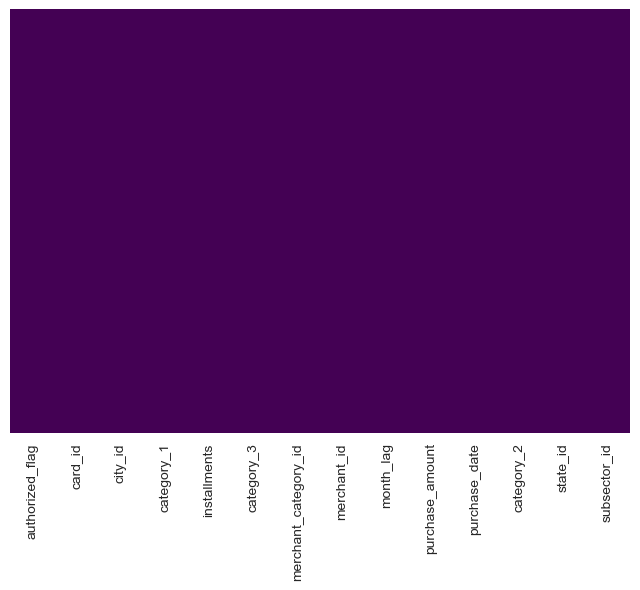

<Figure size 2000x2000 with 0 Axes>

In [454]:
## Missig Data heatmap

sns.heatmap(dfhist.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

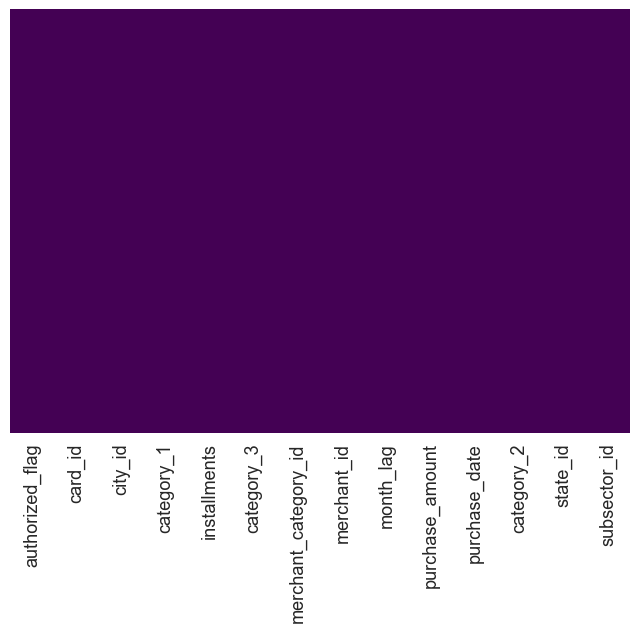

<Figure size 2000x2000 with 0 Axes>

In [455]:
## Missig Data heatmap

sns.heatmap(dfnewm.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

__No Missing data in new trasaction__

#### [Back to Index](#Index)

<a id=section504><a/>

### 5.4 Post Profiling

In [456]:
profile = pandas_profiling.ProfileReport(dftrain)
profile.to_file(outputfile="../PandasProfiling/TrainingData_Post_Profiling.html")

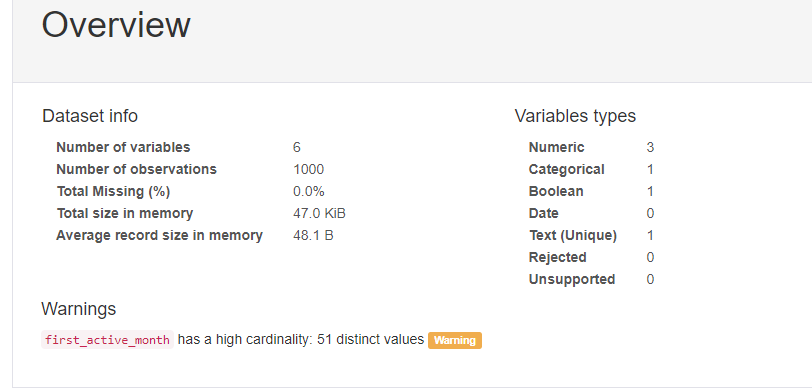

In [457]:
display(Image(filename = "../Images/Training_Post_Profile.png", width=600, unconfined=True))

In [458]:
profile = pandas_profiling.ProfileReport(dftest)
profile.to_file(outputfile="../PandasProfiling/TestData_Post_Profiling.html")

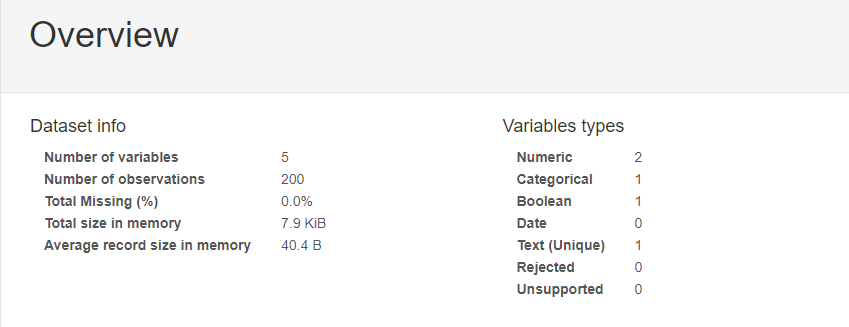

In [459]:
display(Image(filename = "../Images/Testing_Post_Profile.png", width=600, unconfined=True))

In [460]:
profile = pandas_profiling.ProfileReport(dfhist)
profile.to_file(outputfile="../PandasProfiling/HistoricalData_Post_Profiling.html")

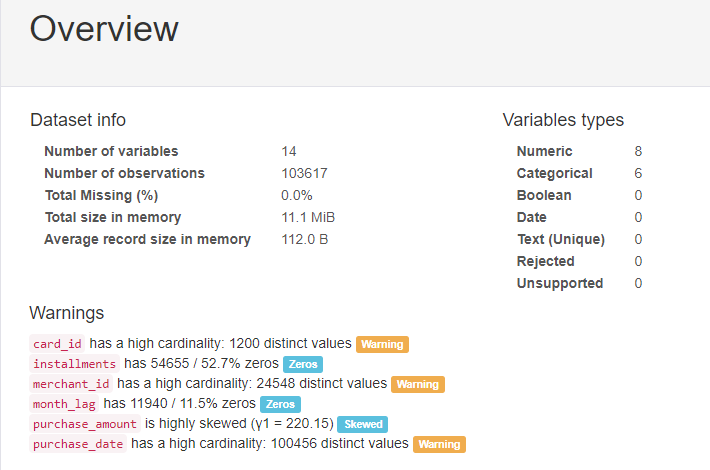

In [461]:
display(Image(filename = "../Images/HistoriData_Post_Profile.png", width=600, unconfined=True))

In [462]:
profile = pandas_profiling.ProfileReport(dfnewm)
profile.to_file(outputfile="../PandasProfiling/Newmerchants_Post_Profiling.html")

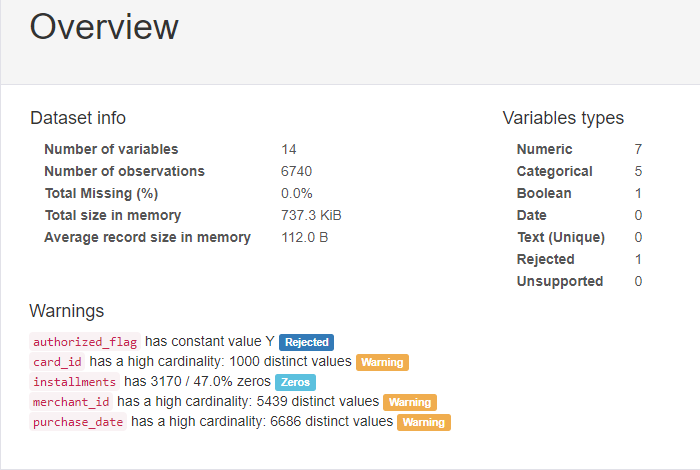

In [463]:
display(Image(filename = "../Images/NewMerchent_PostProfiling.png", width=600, unconfined=True))

#### Observation

- We have no missing values in the data set.
- But we have few Zero values and warnings which we will take care in Feature engineering section.

#### [Back to Index](#Index)

<a id=section6><a/>

## 6. Exploratory Data Analysis(EDA)

### A. Univariate analysis

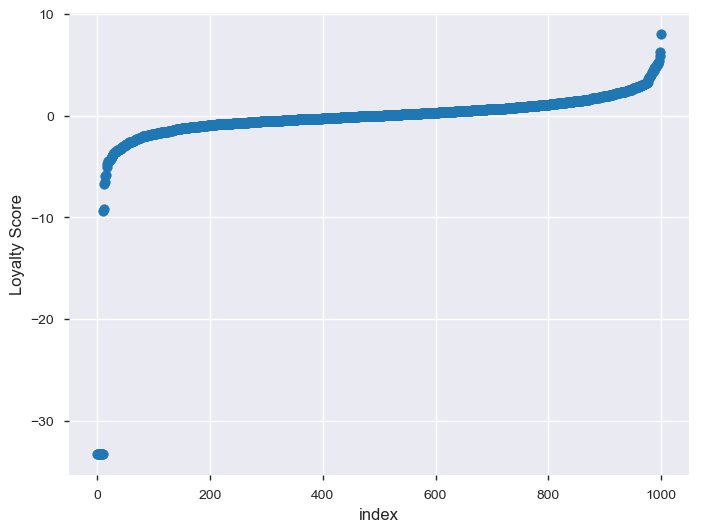

In [464]:
target_col = "loyalty_score"

plt.figure(figsize=(8,6))
plt.scatter(range(dftrain.shape[0]), np.sort(dftrain[target_col].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



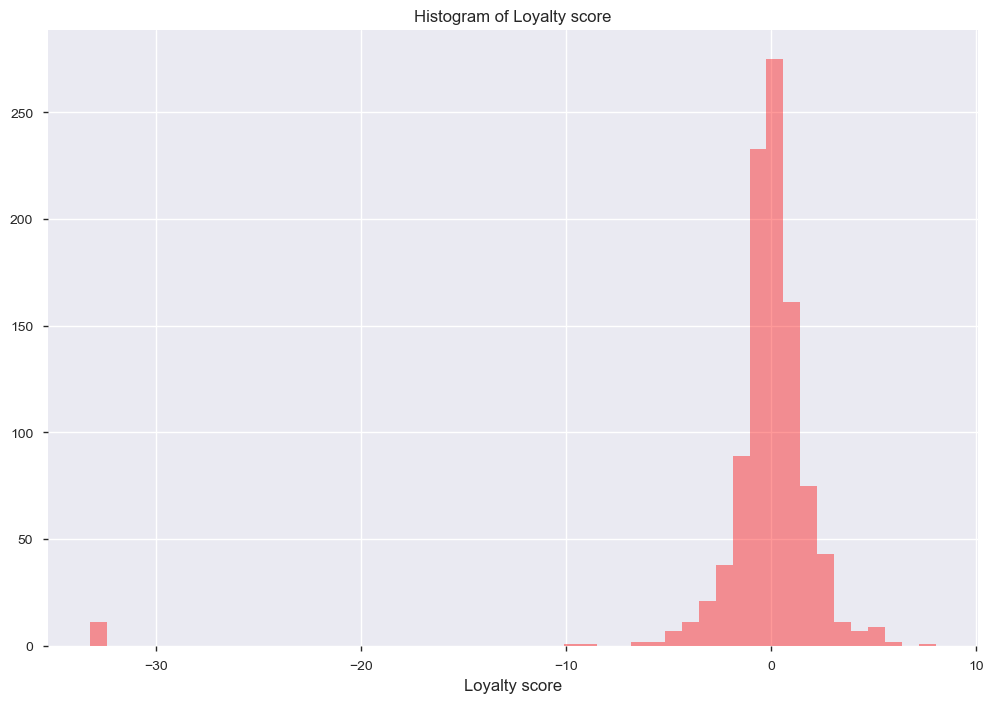

In [465]:
plt.figure(figsize=(12,8))
sns.distplot(dftrain[target_col].values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



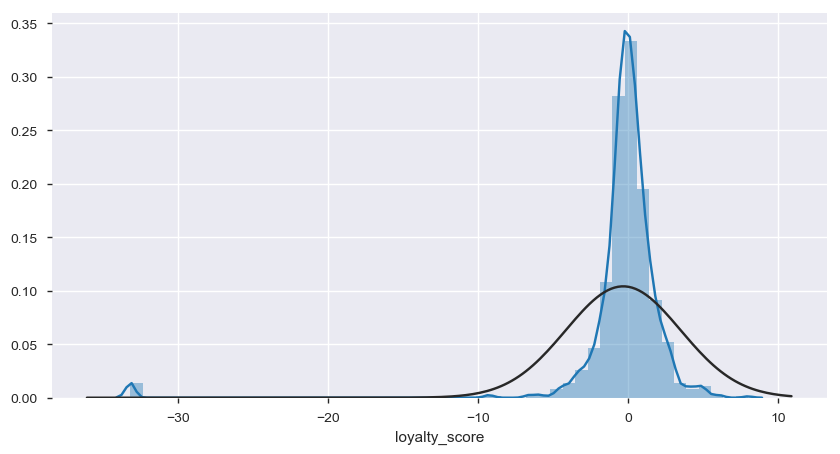

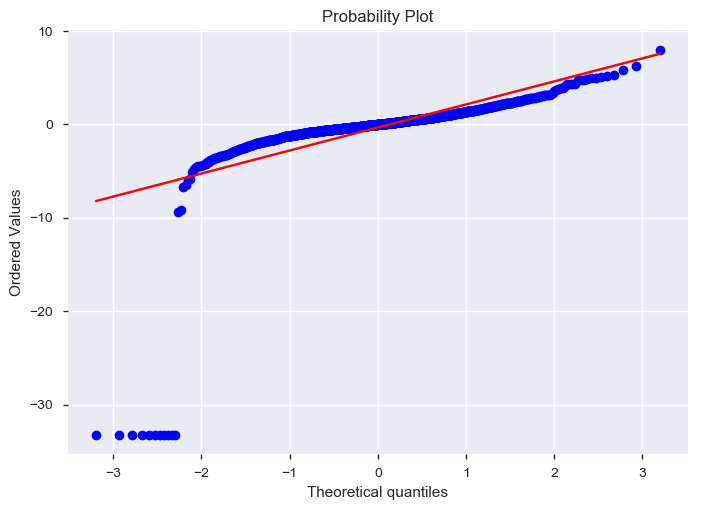

In [466]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize= (10,5))
#histogram and normal probability plot
sns.distplot(dftrain['loyalty_score'], fit=norm);
fig = plt.figure()
res = stats.probplot(dftrain['loyalty_score'], plot=plt)

- From both the plots we can see that Target variable is having values between -10 to 10.
- Looking at probability and distribution plots we can see that target variable has a good spread, with few exceptional points.
- We can also see few outliers; let’s see how we can eliminate them in future.

#### [Back to Index](#Index)

### B. Will Feature 1, 2 and 3 make a good attribute for prediction?

In [467]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
first_active_month    1000 non-null object
card_id               1000 non-null object
feature_1             1000 non-null int64
feature_2             1000 non-null int64
feature_3             1000 non-null int64
loyalty_score         1000 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


- lets explore feature_1,2,3.

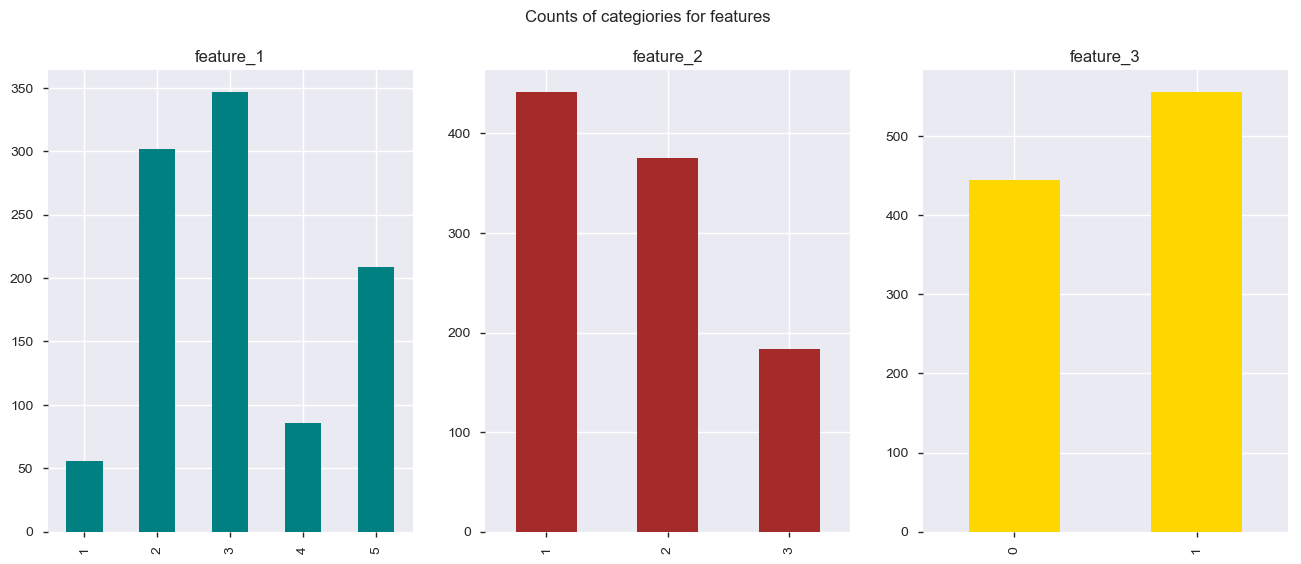

In [468]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
dftrain['feature_1'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='feature_1');
dftrain['feature_2'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='feature_2');
dftrain['feature_3'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='gold', title='feature_3');
plt.suptitle('Counts of categiories for features');

In [469]:
dftrain[['feature_1', 'feature_2', 'feature_3']].iplot(kind='hist',bins=25)

In [470]:
dftest[['feature_1', 'feature_2', 'feature_3']].iplot(kind='hist',bins=25)

- Above plots we can see these three attributes are having categorical values.
- Let’s take a look at the correlation with respect to loyalty_score

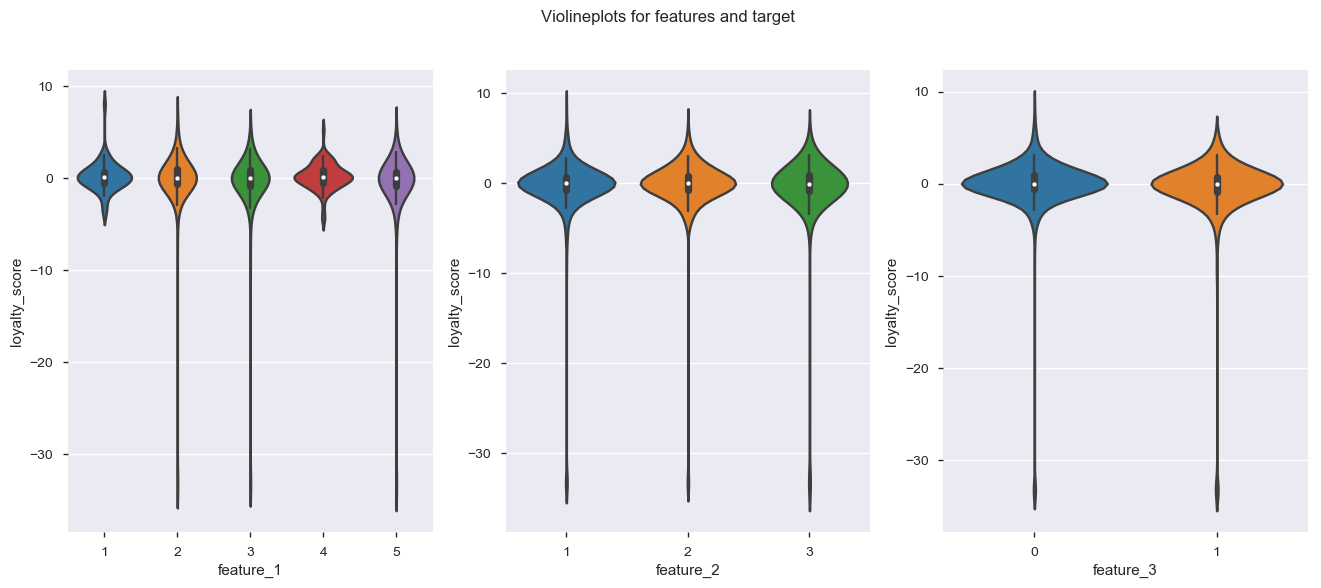

In [471]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features and target');
sns.violinplot(x="feature_1", y="loyalty_score", data=dftrain, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="loyalty_score", data=dftrain, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="loyalty_score", data=dftrain, ax=ax[2], title='feature_3');

- mean target values of each category of these features are near zero. This could mean that data was sampled from normal distribution
- These features aren't really good at predicting target. let’s see if we can do some feature engineering before using them for prediction.

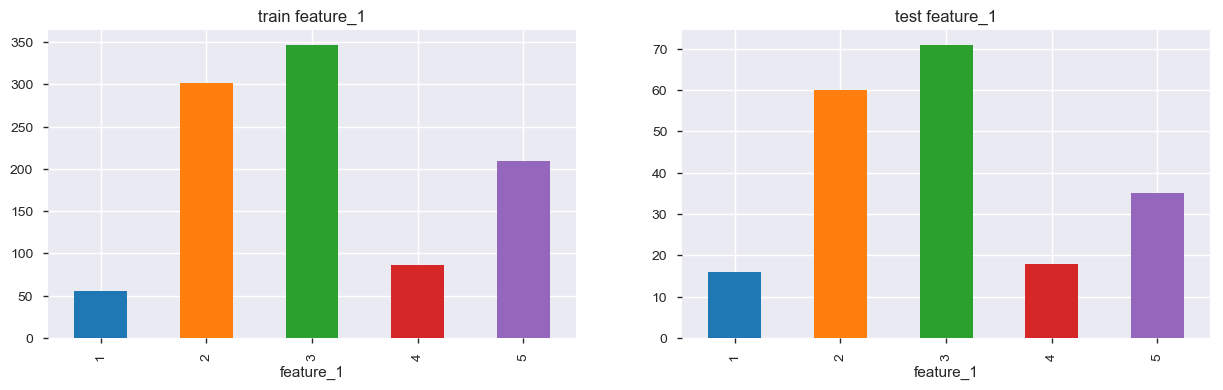

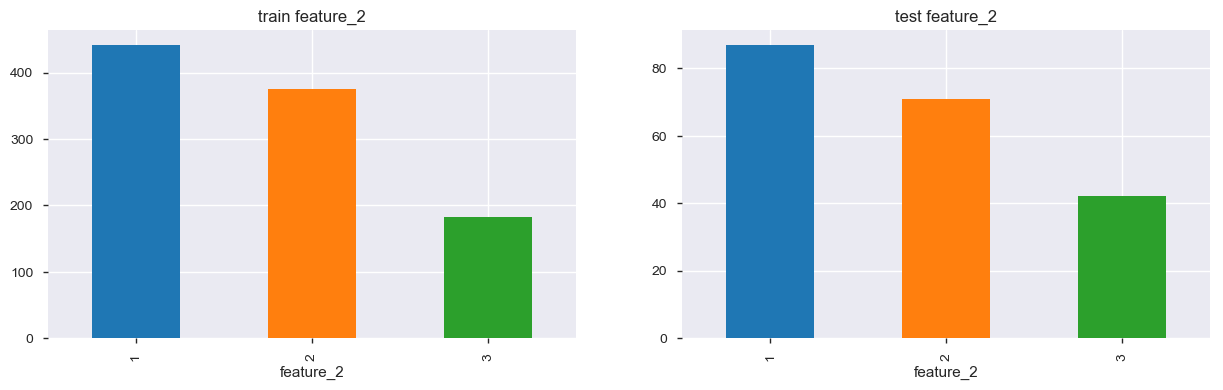

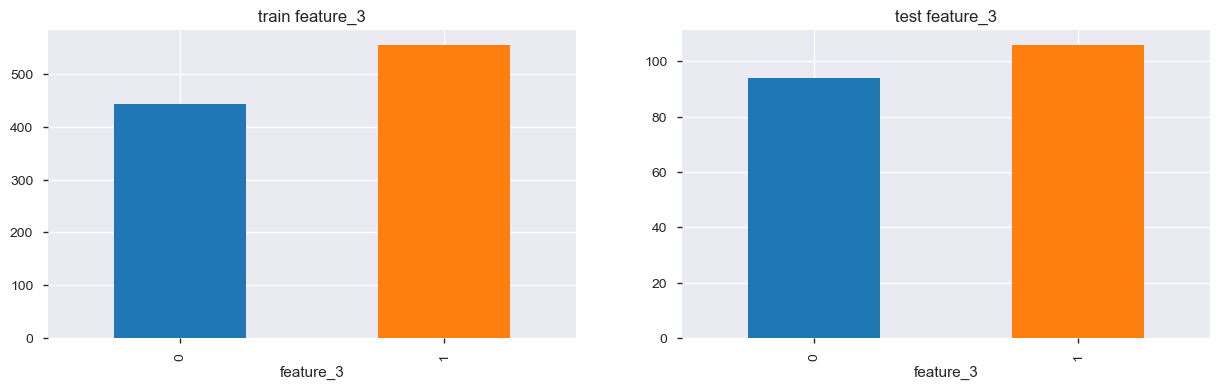

In [472]:
features = ['feature_1', 'feature_2', 'feature_3']
for feature in features:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    dftrain.groupby(feature).count()['first_active_month'].plot(kind='bar',
                                                              title='train {}'.format(feature),
                                                              figsize=(15, 4),
                                                              ax=axes[0])
    dftest.groupby(feature).count()['first_active_month'].plot(kind='bar',
                                                              title='test {}'.format(feature),
                                                              figsize=(15, 4))
    plt.show()

#### [Back to Index](#Index)

### C. Plotting first_active_month ?

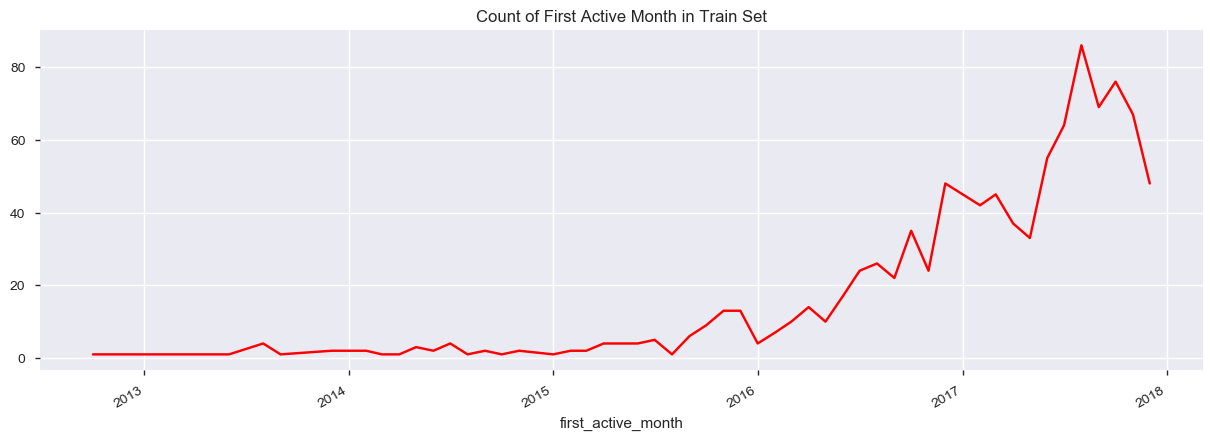

In [473]:
dftrain['first_active_month'] = pd.to_datetime(dftrain['first_active_month'])
dftrain.groupby('first_active_month').count()['card_id'].plot(figsize=(15,5),
                                                            title='Count of First Active Month in Train Set',
                                                           color='r')

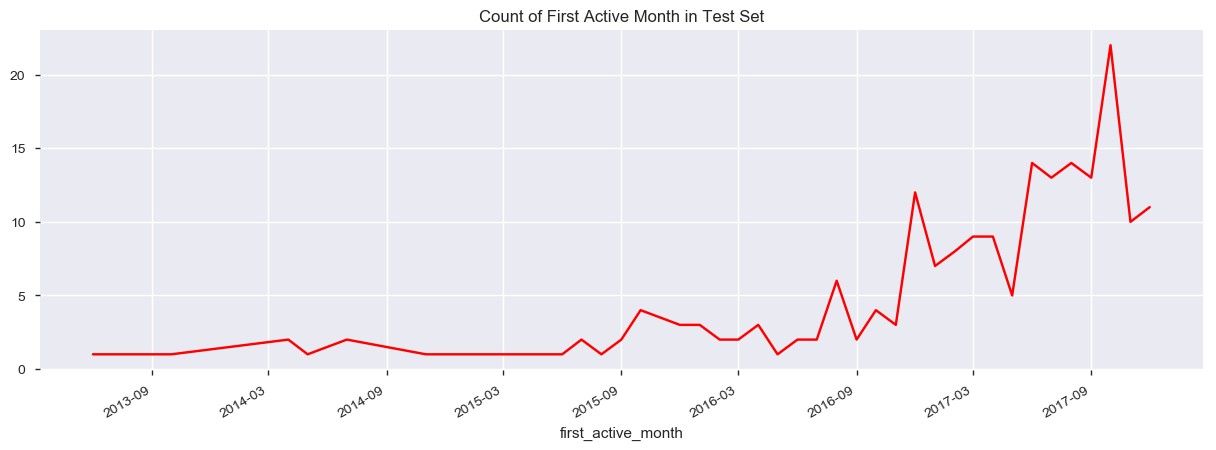

In [474]:
dftest['first_active_month'] = pd.to_datetime(dftest['first_active_month'])
dftest.groupby('first_active_month').count()['card_id'].plot(figsize=(15,5),
                                                            title='Count of First Active Month in Test Set',
                                                           color='r')

- We can see both Train and Test have some slight variations.
- 

#### [Back to Index](#Index)

### D. Comparing purchase_amount and purchase_date from historic and new_transaction data

- Lets create new features from purchase date variable

In [475]:
import datetime
import time
import sys

In [476]:
# Devide time 

def devide_time(data):
    data['purchase_date'] = pd.to_datetime(data['purchase_date'])
    data['month_diff'] = ((datetime.datetime.today() - data['purchase_date']).dt.days)//30  
    data['purchase_year'] = data['purchase_date'].dt.year
    data['purchase_month'] = data['purchase_date'].dt.month
    data['weekofyear'] = data['purchase_date'].dt.weekofyear
    data['dayofweek'] = data['purchase_date'].dt.dayofweek
    data['weekend'] = (data.purchase_date.dt.weekday >=5).astype(int)
    data['hour'] = data['purchase_date'].dt.hour
    return data

dfhist = devide_time(dfhist)
dfnewm = devide_time(dfnewm)

In [477]:
dfhist.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_ea299331ff      200          N             0   
1               Y  C_ID_ea299331ff      200          N             0   
2               Y  C_ID_ea299331ff      200          N             0   
3               Y  C_ID_ea299331ff      200          N             0   
4               Y  C_ID_ea299331ff      200          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                   690  M_ID_7ecb602096         -5   
1          A                   705  M_ID_e95b1970c2        -10   
2          A                   307  M_ID_77d5389a7e         -3   
3          A                   705  M_ID_e95b1970c2         -4   
4          A                   705  M_ID_9a24c5f117          0   

   purchase_amount  ...  category_2  state_id  subsector_id  month_diff  \
0        -0.351846  ...         2.0        18             1          19   
1        -0.603029  ...         2.0        18            33          23   
2        -0.656749  ...         2.0        18            19          16   
3        -0.557754  ...         2.0        18            33          18   
4        -0.603375  ...         2.0        18            33          13   

   purchase_year  purchase_month  weekofyear  dayofweek  weekend  hour  
0           2017               9          37          4        0    21  
1           2017               4          17          5        1     9  
2           2017              11          48          2        0     0  
3           2017              10          40          2        0    13  
4           2018               2           9          2        0    11  

[5 rows x 21 columns]

In [478]:
dfnewm.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_89f5a36cc3       69          N             2   
1               Y  C_ID_89f5a36cc3      231          N             1   
2               Y  C_ID_89f5a36cc3       69          N             1   
3               Y  C_ID_89f5a36cc3       69          N             1   
4               Y  C_ID_6a9d23ccea      261          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          C                   879  M_ID_00a6ca8a8a          1   
1          B                   108  M_ID_e6570d8726          1   
2          B                   273  M_ID_32d73b8ecf          2   
3          B                    80  M_ID_c03b62d83d          2   
4          A                   437  M_ID_d179007279          1   

   purchase_amount  ...  category_2  state_id  subsector_id  month_diff  \
0        -0.446378  ...         1.0         9            29          21   
1        -0.634509  ...         1.0         9            34          22   
2        -0.626696  ...         1.0         9            20          21   
3        -0.677786  ...         1.0         9            37          21   
4        -0.620460  ...         1.0         9            15          12   

   purchase_year  purchase_month  weekofyear  dayofweek  weekend  hour  
0           2017               6          26          3        0    17  
1           2017               6          25          1        0    12  
2           2017               7          29          3        0    14  
3           2017               7          29          3        0    14  
4           2018               3          13          0        0    18  

[5 rows x 21 columns]

__Lets check the distribution of purchase_amount__

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



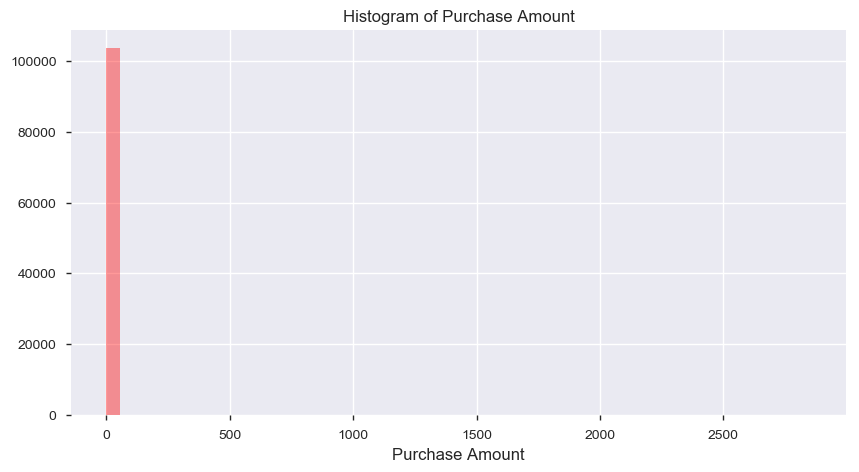

In [479]:
plt.figure(figsize=(10,5))
sns.distplot(dfhist['purchase_amount'].values, bins=50, kde=False, color="red")
plt.title("Histogram of Purchase Amount")
plt.xlabel('Purchase Amount', fontsize=12)
plt.show()

In [480]:
for i in [-1, 0]:
    n = dfhist.loc[dfhist['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = dfhist.loc[dfhist['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

There are 0 transactions with purchase_amount less than -1.
There are 99958 transactions with purchase_amount less than 0.
There are 3659 transactions with purchase_amount more than 0.
There are 54 transactions with purchase_amount more than 10.
There are 10 transactions with purchase_amount more than 100.


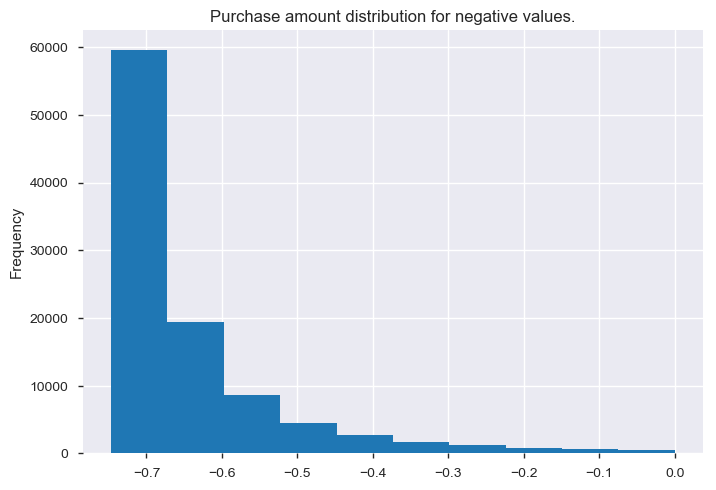

In [481]:
plt.title('Purchase amount distribution for negative values.');
dfhist.loc[dfhist['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



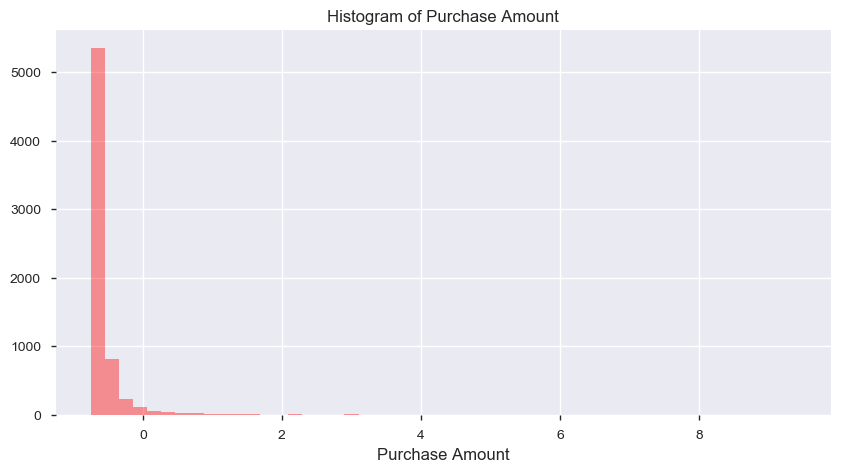

In [482]:
plt.figure(figsize=(10,5))
sns.distplot(dfnewm['purchase_amount'].values, bins=50, kde=False, color="red")
plt.title("Histogram of Purchase Amount")
plt.xlabel('Purchase Amount', fontsize=12)
plt.show()

In [483]:
for i in [-1, 0]:
    n = dfnewm.loc[dfnewm['purchase_amount'] < i].shape[0]
    print(f"There are {n} transactions with purchase_amount less than {i}.")
for i in [0, 10, 100]:
    n = dfnewm.loc[dfnewm['purchase_amount'] > i].shape[0]
    print(f"There are {n} transactions with purchase_amount more than {i}.")

There are 0 transactions with purchase_amount less than -1.
There are 6483 transactions with purchase_amount less than 0.
There are 257 transactions with purchase_amount more than 0.
There are 0 transactions with purchase_amount more than 10.
There are 0 transactions with purchase_amount more than 100.


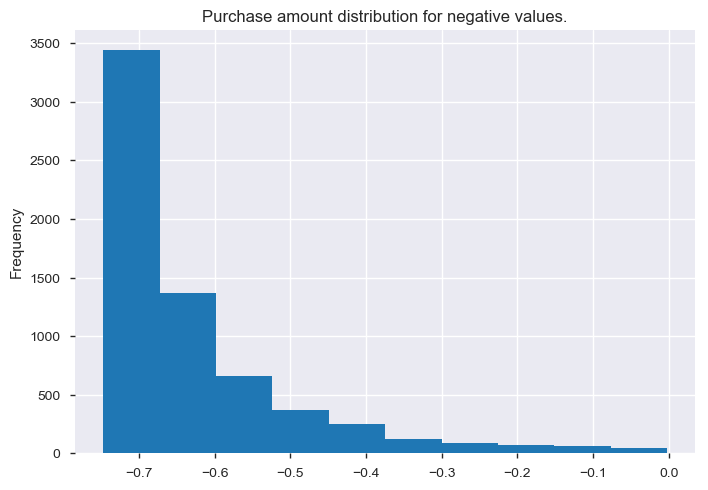

In [484]:
plt.title('Purchase amount distribution for negative values.');
dfnewm.loc[dfnewm['purchase_amount'] < 0, 'purchase_amount'].plot(kind='hist');

#### [Back to Index](#Index)

__Lets apply log transformation to this variable see if it can bring any changes in distribution__

In [485]:
dfhist['purchase_amount'] = np.log1p(dfhist['purchase_amount'])
dfnewm['purchase_amount'] = np.log1p(dfnewm['purchase_amount'])

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



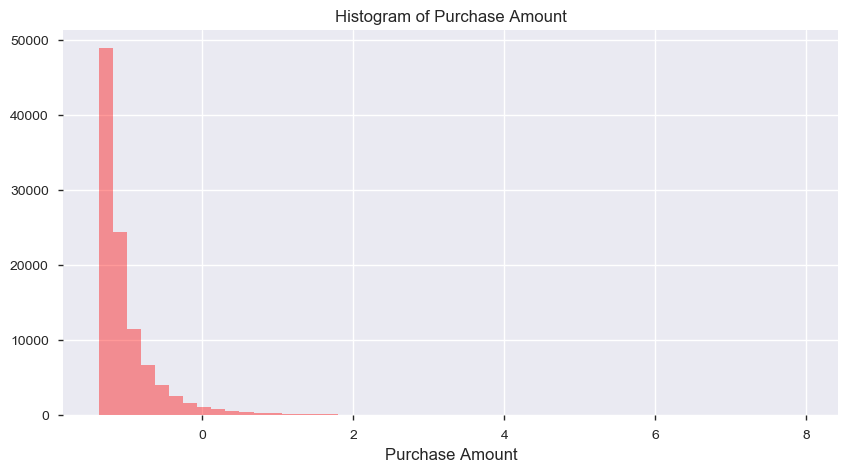

In [486]:
plt.figure(figsize=(10,5))
sns.distplot(dfhist['purchase_amount'].values, bins=50, kde=False, color="red")
plt.title("Histogram of Purchase Amount")
plt.xlabel('Purchase Amount', fontsize=12)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



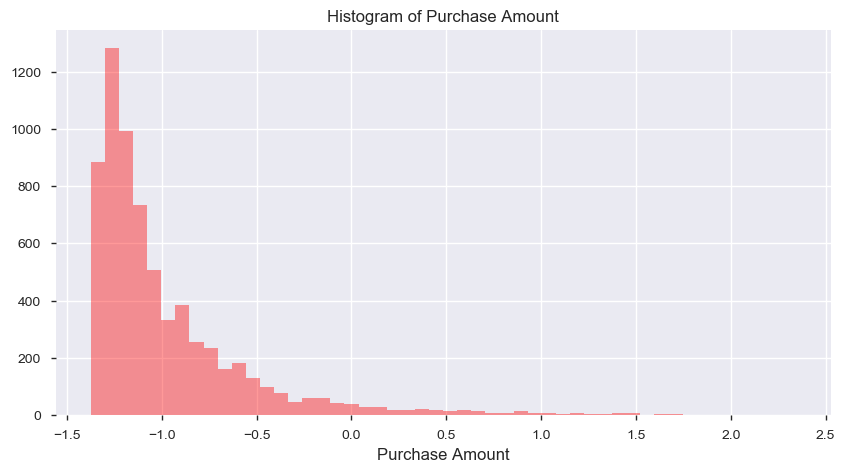

In [487]:
plt.figure(figsize=(10,5))
sns.distplot(dfnewm['purchase_amount'].values, bins=50, kde=False, color="red")
plt.title("Histogram of Purchase Amount")
plt.xlabel('Purchase Amount', fontsize=12)
plt.show()

#### We can see slight improvement , but still we have the data right skewed having more data population on negative side.

__Historical Data__

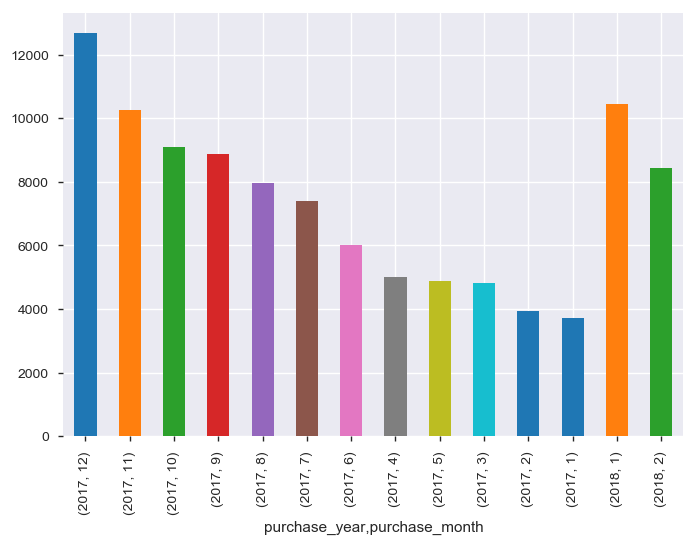

In [488]:
dfhist.groupby('purchase_year')['purchase_month'].value_counts().plot.bar()

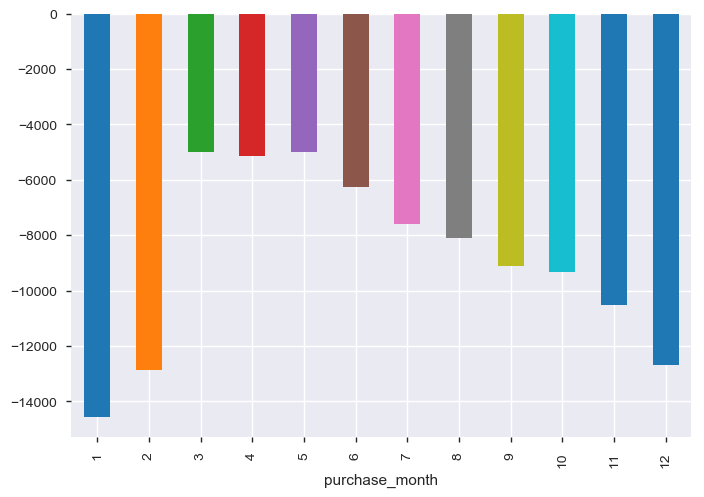

In [489]:
dfhist.groupby('purchase_month')['purchase_amount'].sum().plot.bar()

#### Observation
- if we see both plots we can clearly say that transaction of credit cards are more in the end of the year and beginning first two month of the year.

- This may be because of festive sales like __Thanks giving, Christmas, New year and New year sale(in first month of the year)__ 

__New Transaction__

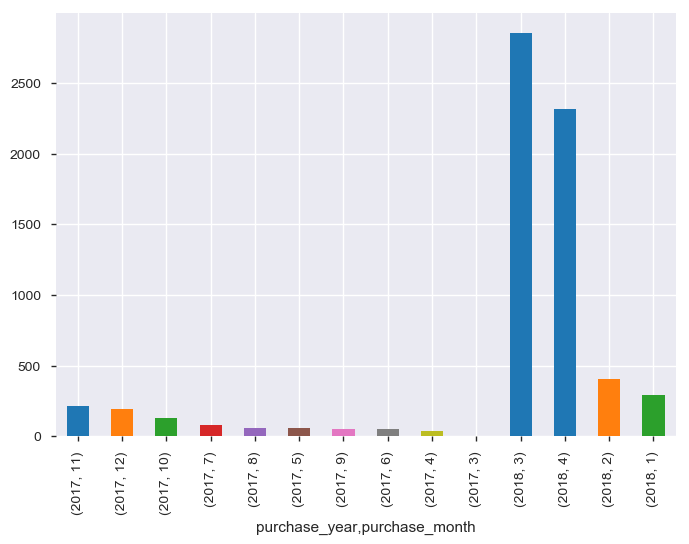

In [490]:
dfnewm.groupby('purchase_year')['purchase_month'].value_counts().plot.bar()

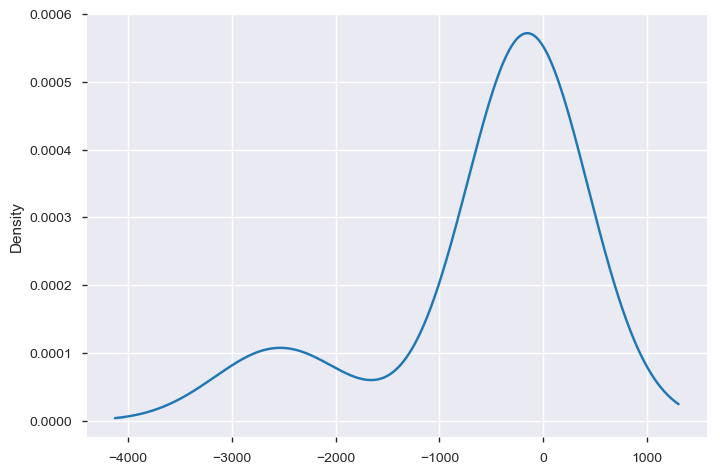

In [491]:
dfnewm.groupby('purchase_month')['purchase_amount'].sum().plot.density()

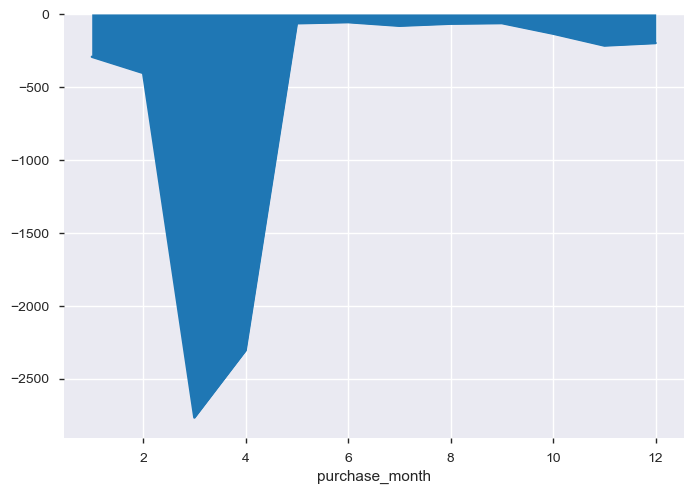

In [492]:
dfnewm.groupby('purchase_month')['purchase_amount'].sum().plot.area()

#### Observation
- with the above plots, all our assumptions regarding the purchase_amount has been proved wrong.
- we can see that 3rd and 4th month of the year has more amount than any other month.

#### [Back to Index](#Index)

### E. Plotting authorized_flag month wise from historic and new_transaction data

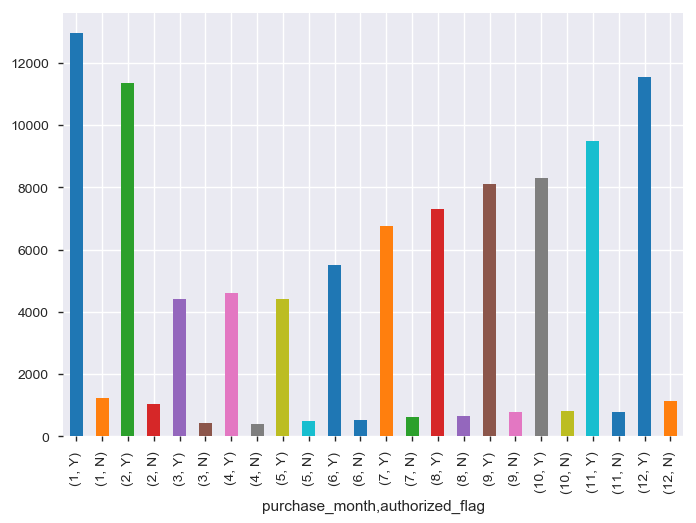

In [493]:
dfhist.groupby('purchase_month')['authorized_flag'].value_counts().plot.bar()

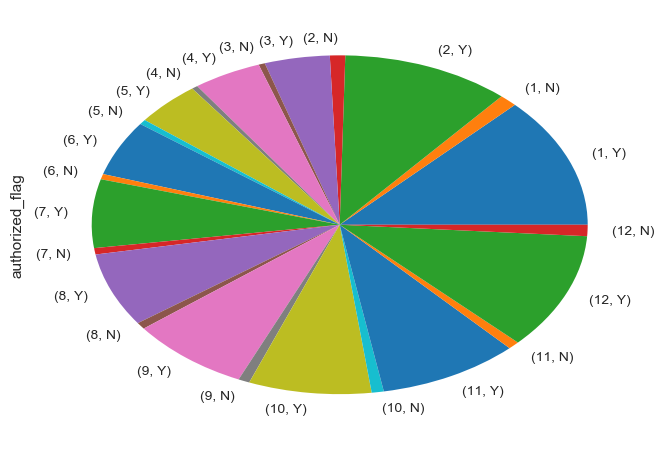

In [494]:
dfhist.groupby('purchase_month')['authorized_flag'].value_counts().plot.pie()

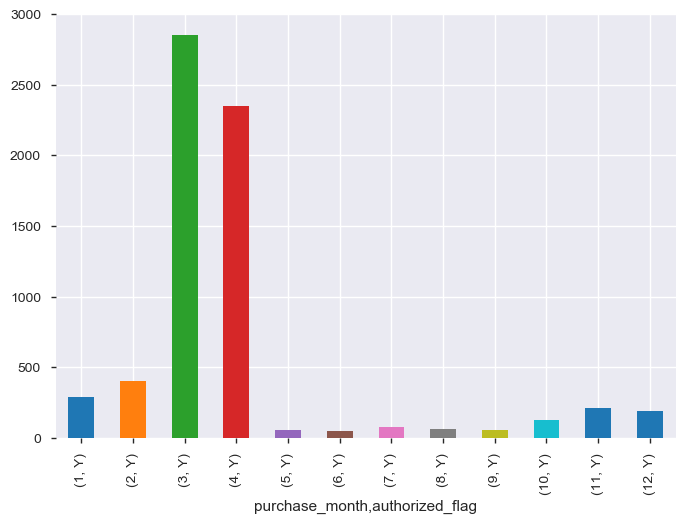

In [495]:
dfnewm.groupby('purchase_month')['authorized_flag'].value_counts().plot.bar()

#### Observation

- We can see that New Transaction data consist of all the records with positive Authorisation.
- Where as in Historical data we can see both positive and negative authorization.
- I think new transaction __authorized_flag__ will not impact much on our target variable.

#### [Back to Index](#Index)

### F. Plotting purchase_amount with respect to merchant_category_id and merchant_id from historic and        new_transaction data

__Historic Data__

In [496]:
dfhist.groupby('merchant_category_id')['purchase_amount'].sum().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').head(10)

merchant_category_id
705   -20401.026416
307   -11854.102015
80     -8903.165712
278    -8717.431644
367    -6408.264332
879    -4778.053408
560    -4567.415595
683    -3463.684438
839    -2506.264002
437    -1631.162755
Name: purchase_amount, dtype: float64

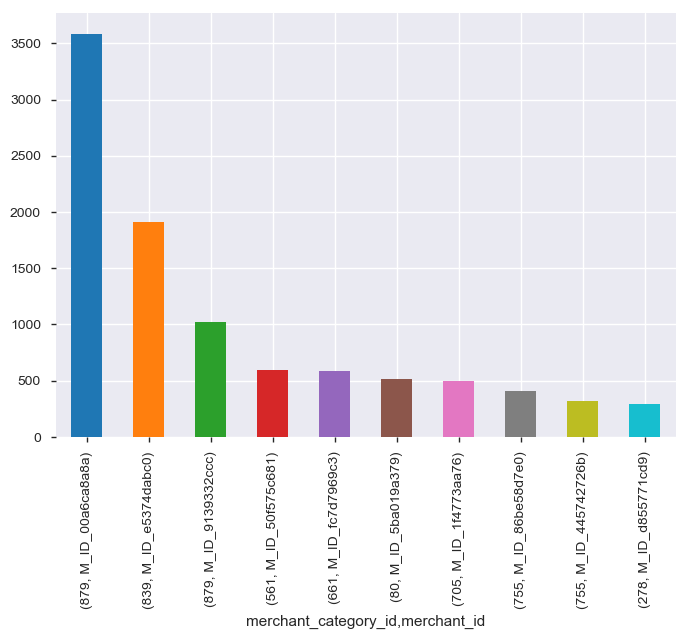

In [497]:
dfhist.groupby('merchant_category_id')['merchant_id'].value_counts().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').head(10).plot.bar()

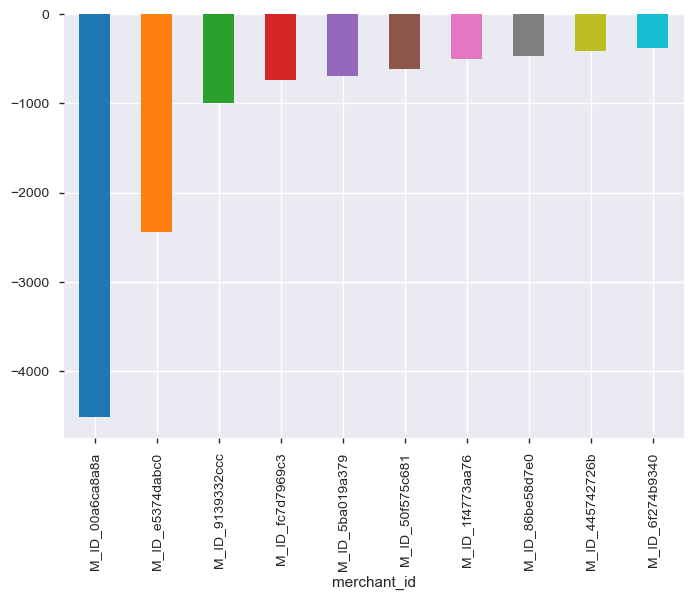

In [498]:
dfhist.groupby('merchant_id')['purchase_amount'].sum().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').head(10).plot.bar()

__New Merchant Transaction__

In [499]:
dfnewm.groupby('merchant_category_id')['purchase_amount'].sum().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').head(10)

merchant_category_id
307   -672.178081
278   -632.152459
705   -611.311842
80    -599.676424
367   -444.369120
560   -275.321654
683   -245.394898
879   -120.328907
884   -116.487539
690   -108.970056
Name: purchase_amount, dtype: float64

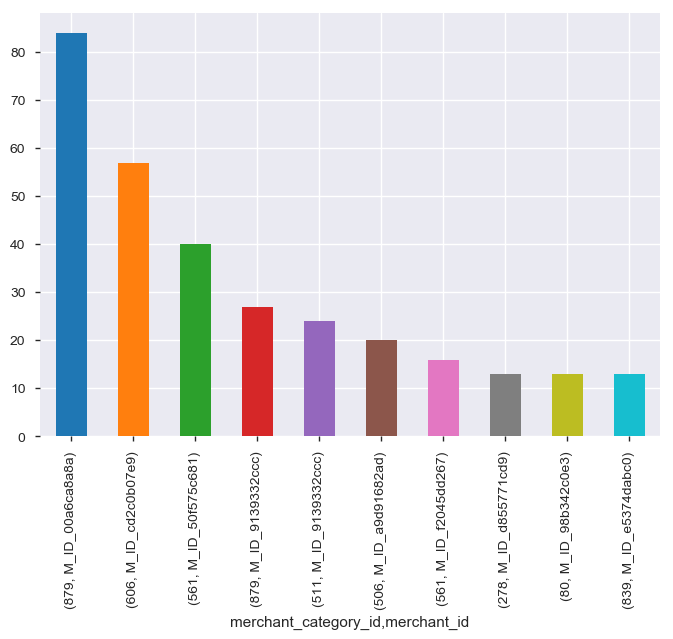

In [500]:
dfnewm.groupby('merchant_category_id')['merchant_id'].value_counts().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').head(10).plot.bar()

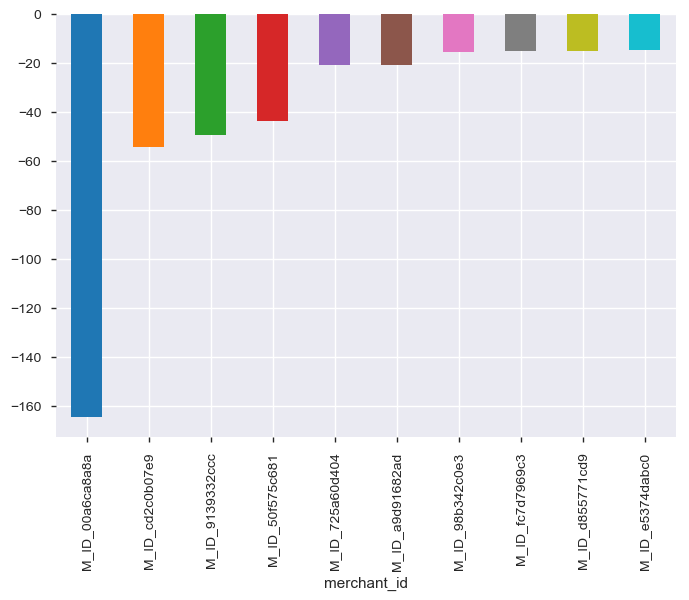

In [501]:
dfnewm.groupby('merchant_id')['purchase_amount'].sum().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').head(10).plot.bar()

#### Observation

- We can see that one perticular merchant_id has made more amount in both historicle and new transaction data.
- We can see some good relation between merchant_category_id and merchant_id from the above plots.

#### [Back to Index](#Index)

### G. Plotting purchase_month and year with respect to month_lag from historic and new_transaction data

__Historic Data__

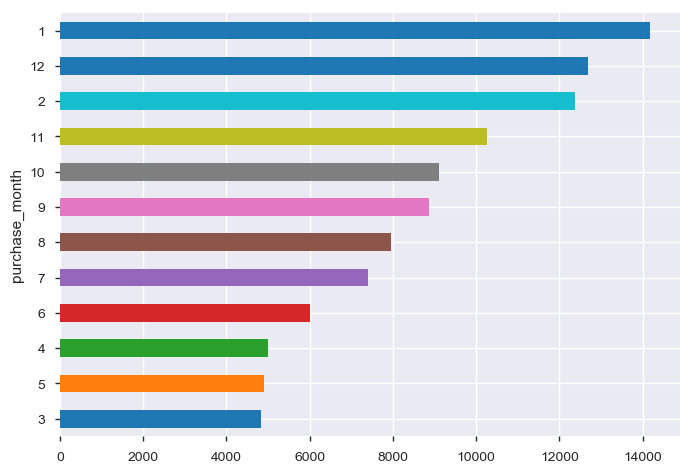

In [502]:
dfhist.groupby('purchase_month')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.barh()

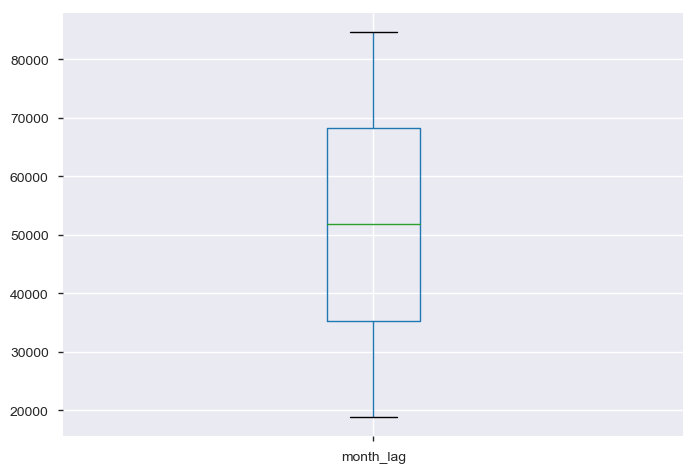

In [503]:
dfhist.groupby('purchase_year')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.box()

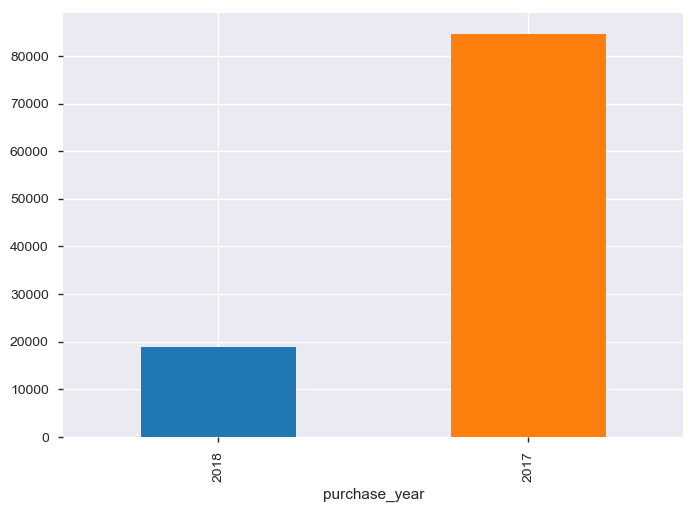

In [504]:
dfhist.groupby('purchase_year')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.bar()

__New Transaction Data__

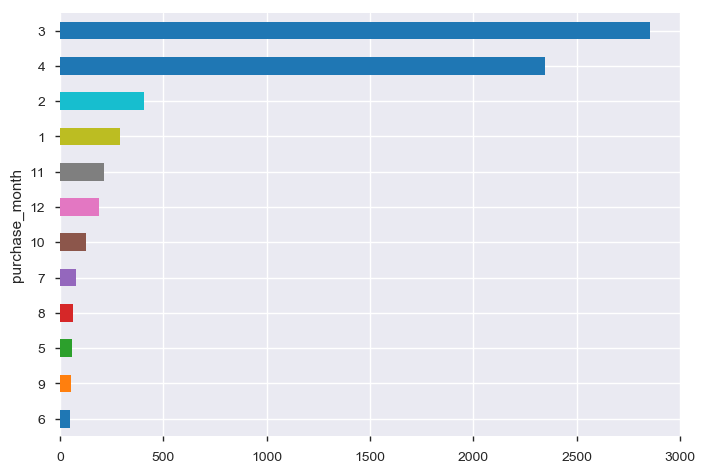

In [505]:
dfnewm.groupby('purchase_month')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.barh()

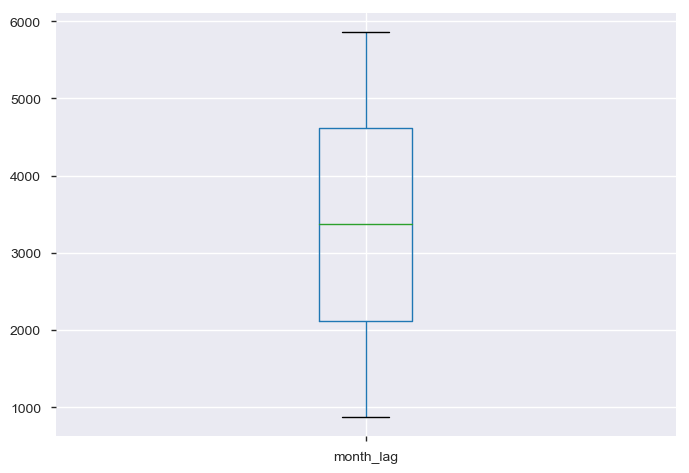

In [506]:
dfnewm.groupby('purchase_year')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.box()

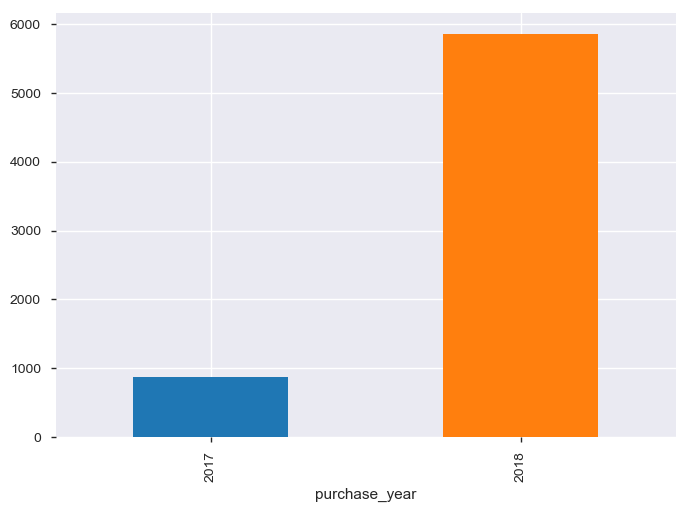

In [507]:
dfnewm.groupby('purchase_year')['month_lag'].count().sort_values(axis=0, ascending=True, kind='quicksort', na_position='last').plot.bar()

#### Observation
- If we see both plots we can clearly say that month lag is more in the end of the year and beginning first two month of the year.
- These plots are similer to purchase_amount plots above.
- We can see purchase_amount, purchase_date, month_lag, authorized_flag all are relational.

#### [Back to Index](#Index)

### H. Analyse category_1,2 and 3 from historic and new_transaction data

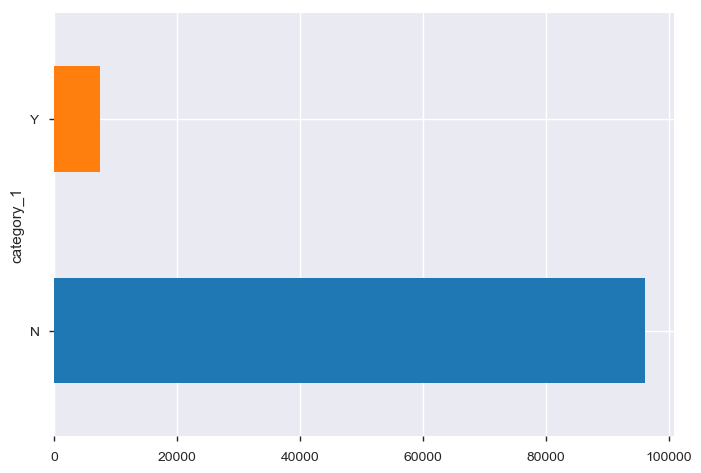

In [508]:
dfhist.groupby('category_1')['card_id'].count().plot.barh()

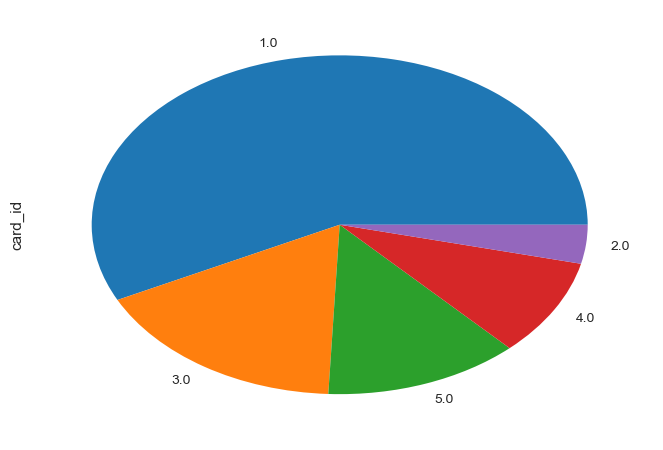

In [509]:
dfhist.groupby('category_2')['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.pie()

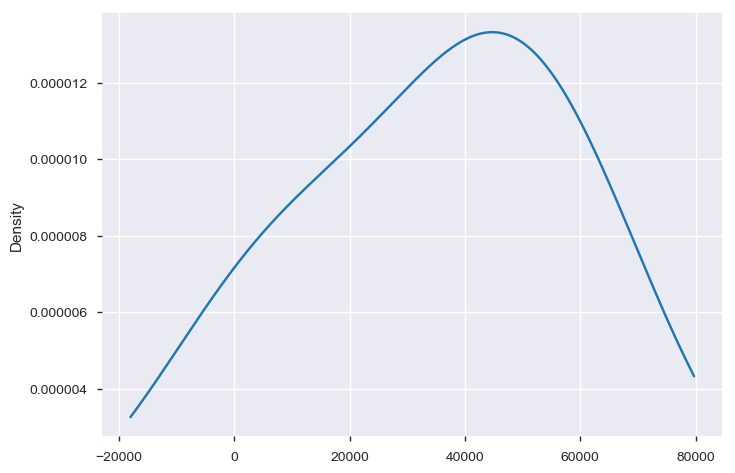

In [510]:
dfhist.groupby('category_3')['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.kde()

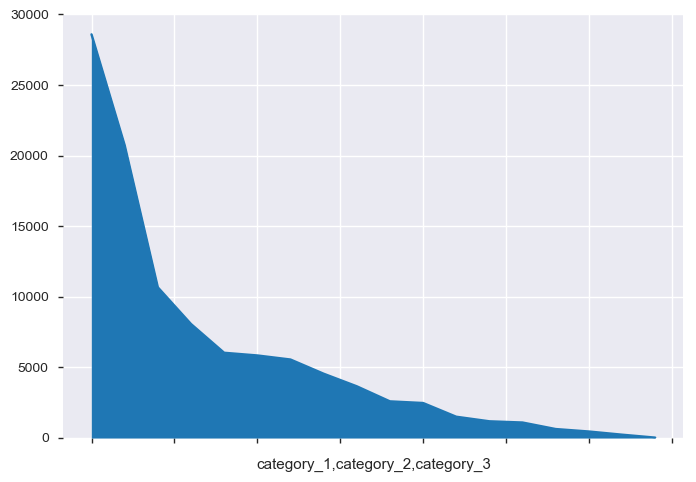

In [511]:
dfhist.groupby(['category_1', 'category_2', 'category_3'])['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.area()

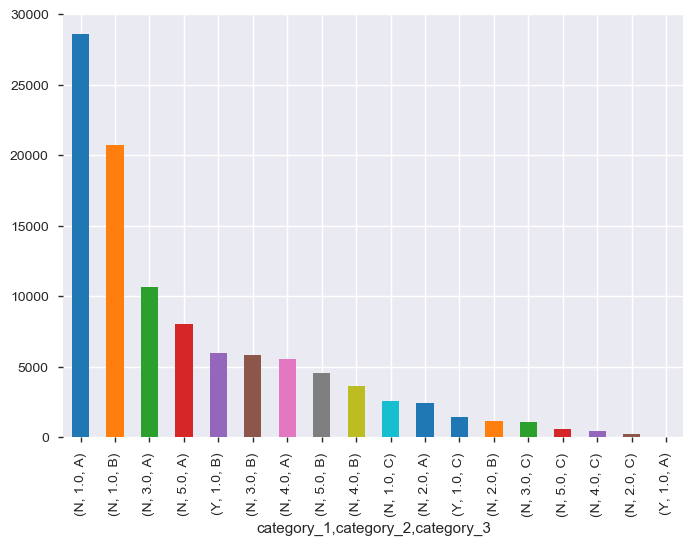

In [512]:
dfhist.groupby(['category_1', 'category_2', 'category_3'])['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.bar()

__New Marchent Transaction__

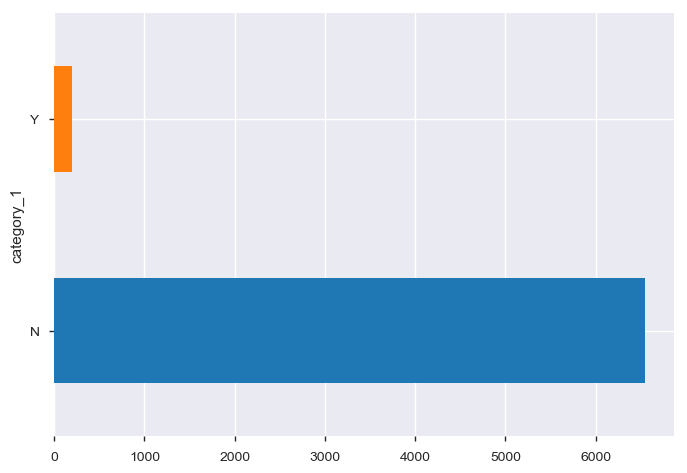

In [513]:
dfnewm.groupby('category_1')['card_id'].count().plot.barh()

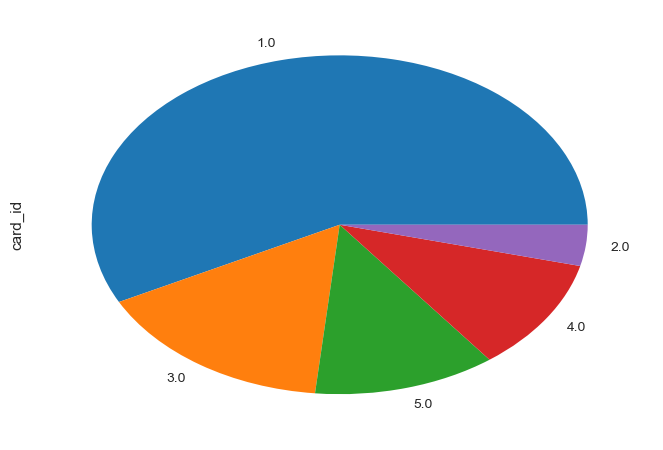

In [514]:
dfnewm.groupby('category_2')['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.pie()

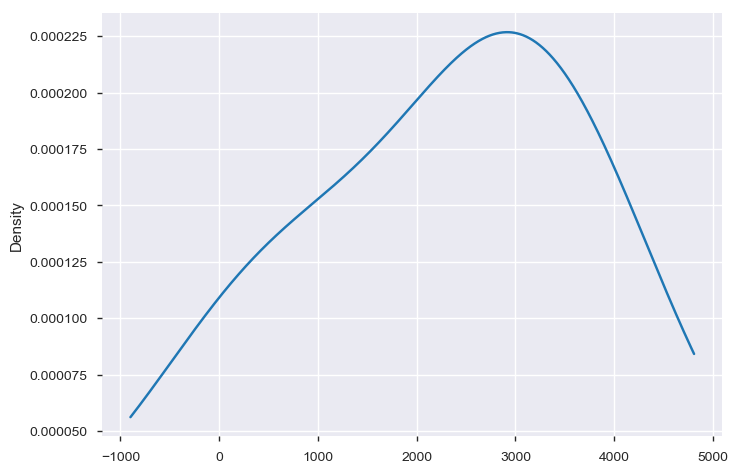

In [515]:
dfnewm.groupby('category_3')['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.kde()

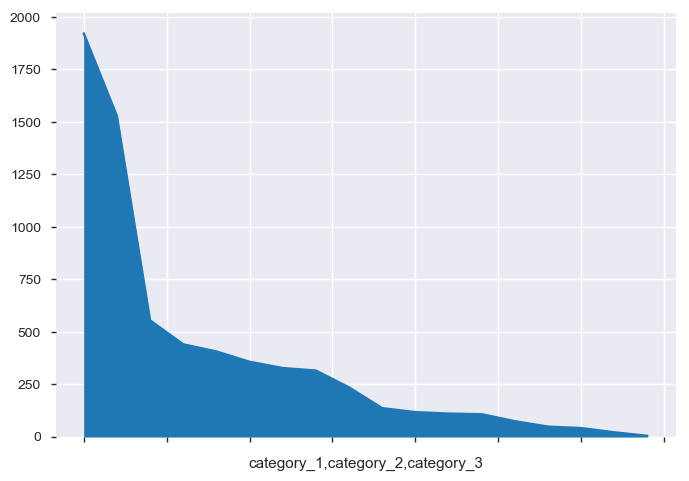

In [516]:
dfnewm.groupby(['category_1', 'category_2', 'category_3'])['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.area()

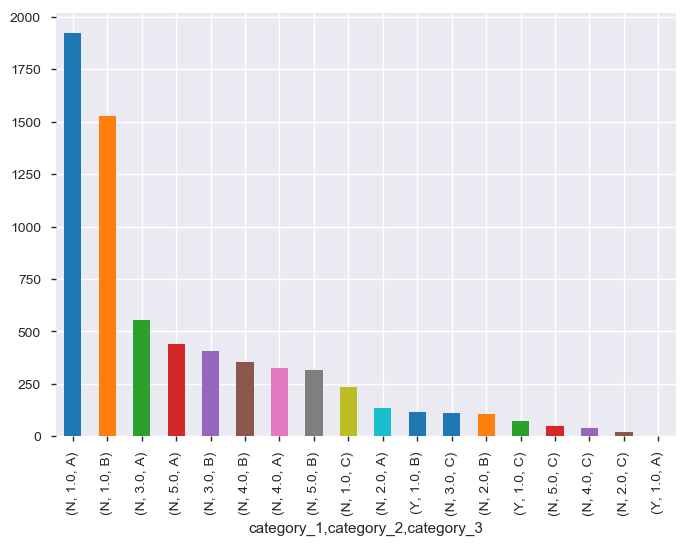

In [517]:
dfnewm.groupby(['category_1', 'category_2', 'category_3'])['card_id'].count().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.bar()

#### Observation

- Almost 50% of the card_id are related to Category_1 (N),Category_2(1) and Category_3(A,B)
- Both Historical and New marchant transactions are haveing same spred.

#### [Back to Index](#Index)

### I. installments distribution analysis from historic and new_transaction data

__Historic data__

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



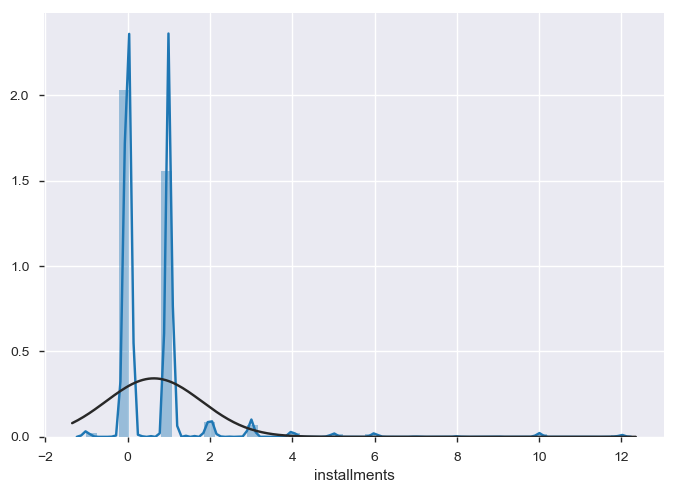

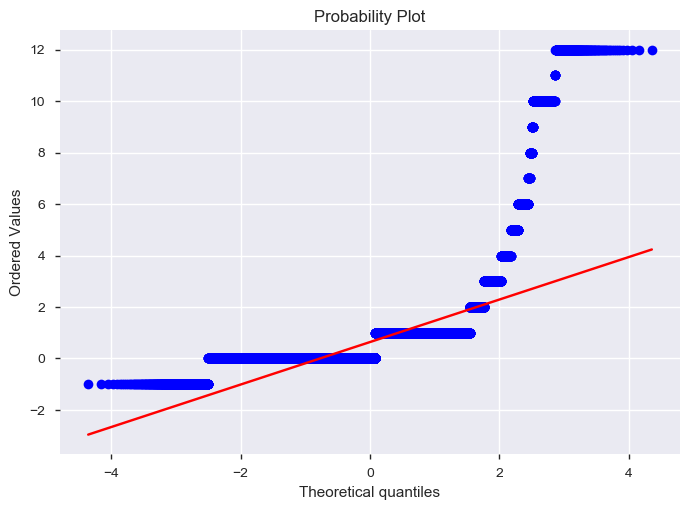

In [518]:
sns.distplot(dfhist['installments'], fit=norm);
fig = plt.figure()
res = stats.probplot(dfhist['installments'], plot=plt)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



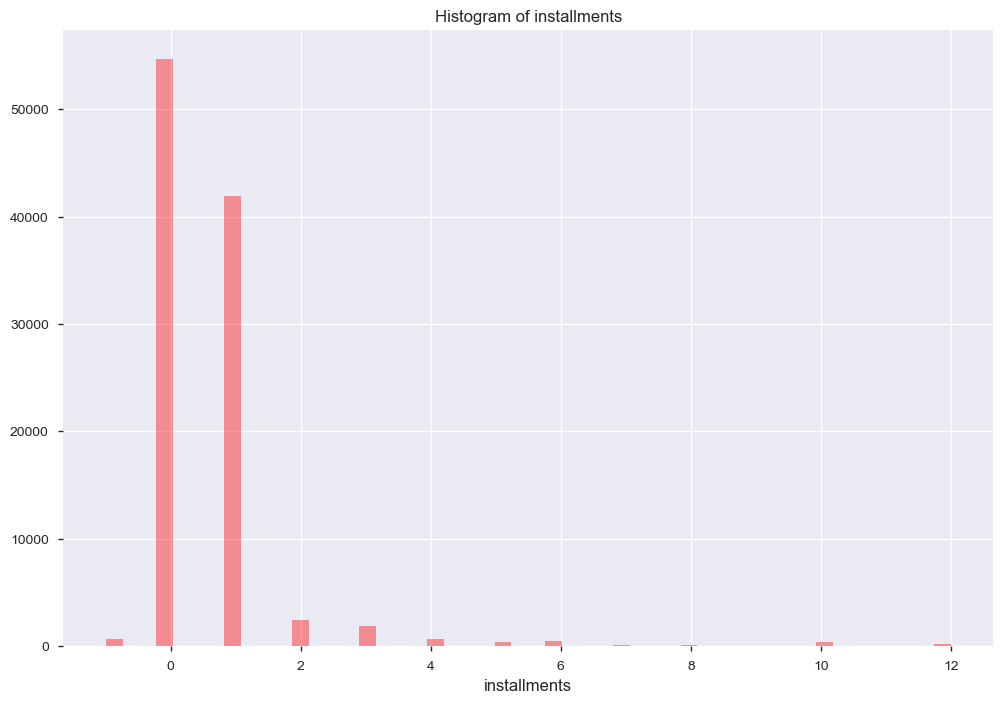

In [519]:
plt.figure(figsize=(12,8))
sns.distplot(dfhist['installments'].values, bins=50, kde=False, color="red")
plt.title("Histogram of installments")
plt.xlabel('installments', fontsize=12)
plt.show()

__New marchants data__

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



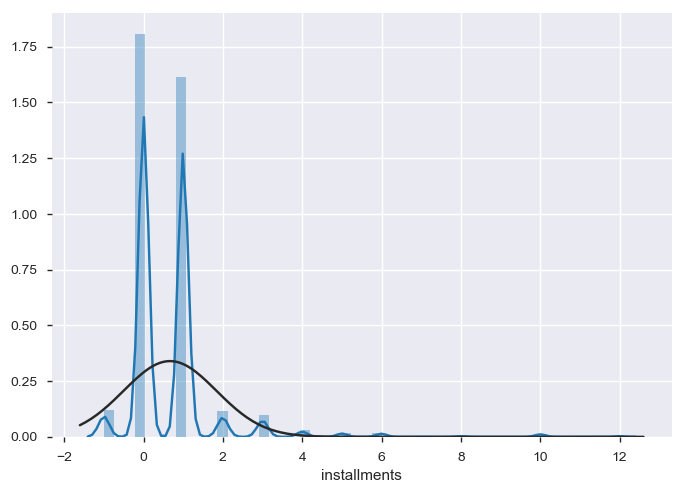

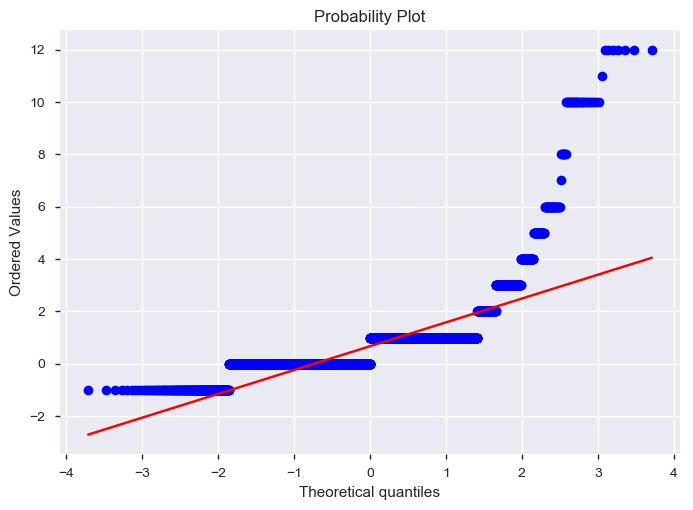

In [520]:
sns.distplot(dfnewm['installments'], fit=norm);
fig = plt.figure()
res = stats.probplot(dfnewm['installments'], plot=plt)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



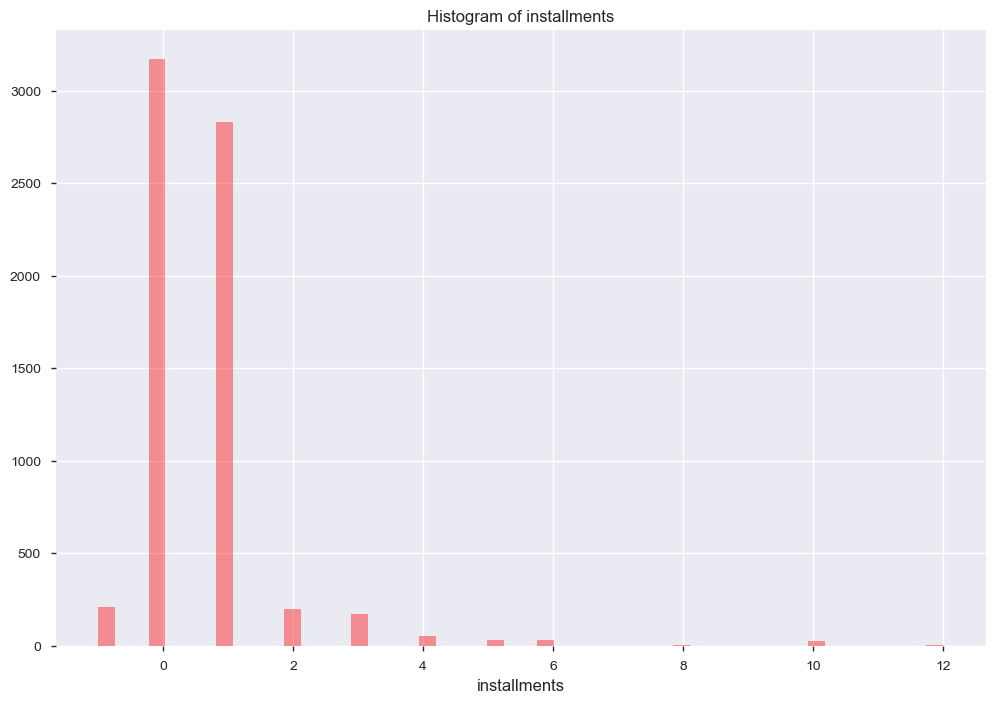

In [521]:
plt.figure(figsize=(12,8))
sns.distplot(dfnewm['installments'].values, bins=50, kde=False, color="red")
plt.title("Histogram of installments")
plt.xlabel('installments', fontsize=12)
plt.show()

#### Observation

- We can see some negative values, which are outliers.
- Data has more concentration at 0 and 1.

#### [Back to Index](#Index)

### J. installments vs purchase_amount vs month_lag from historic and new_transaction data

In [522]:
dfhist.groupby('installments')['purchase_amount'].sum().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').head()

installments
10    168.742805
12     82.680506
6      66.743072
8      27.941358
9      17.285229
Name: purchase_amount, dtype: float64

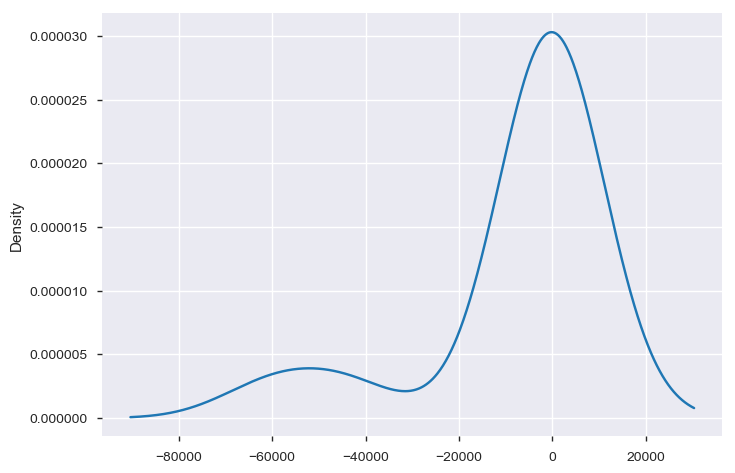

In [523]:
dfhist.groupby('installments')['purchase_amount'].sum().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.kde()

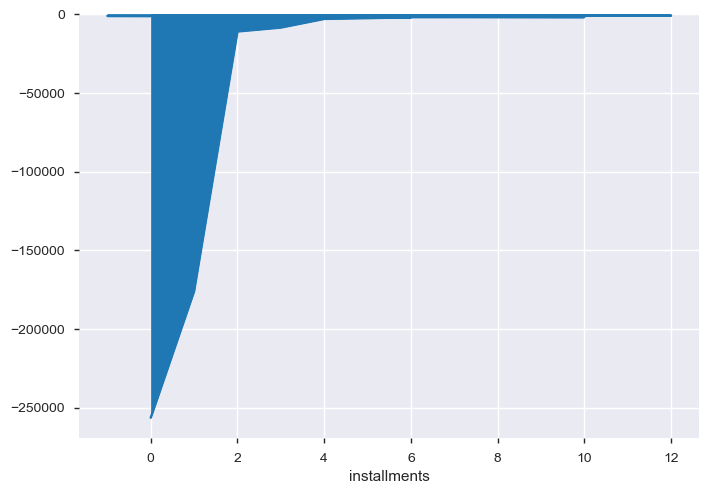

In [524]:
dfhist.groupby('installments')['month_lag'].sum().sort_values(axis=0, ascending=False, kind='quicksort', na_position='last').plot.area()

#### Observation

- We can see some distribution but the data is having lot of negative values, so it’s left skewed.
- I think these data’s may give some important input for the prediction let’s see how it works.
- Lets work on outliers and merg the data sets and later we shall make post EDA.

#### [Back to Index](#Index)

<a id=section7><a/>

## 7. Feature Engineer and Merging

In [525]:
dfhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103617 entries, 0 to 103616
Data columns (total 21 columns):
authorized_flag         103617 non-null object
card_id                 103617 non-null object
city_id                 103617 non-null int64
category_1              103617 non-null object
installments            103617 non-null int64
category_3              103617 non-null object
merchant_category_id    103617 non-null int64
merchant_id             103617 non-null object
month_lag               103617 non-null int64
purchase_amount         103617 non-null float64
purchase_date           103617 non-null datetime64[ns]
category_2              103617 non-null float64
state_id                103617 non-null int64
subsector_id            103617 non-null int64
month_diff              103617 non-null int64
purchase_year           103617 non-null int64
purchase_month          103617 non-null int64
weekofyear              103617 non-null int64
dayofweek               103617 non-null int

In [526]:
dfnewm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 21 columns):
authorized_flag         6740 non-null object
card_id                 6740 non-null object
city_id                 6740 non-null int64
category_1              6740 non-null object
installments            6740 non-null int64
category_3              6740 non-null object
merchant_category_id    6740 non-null int64
merchant_id             6740 non-null object
month_lag               6740 non-null int64
purchase_amount         6740 non-null float64
purchase_date           6740 non-null datetime64[ns]
category_2              6740 non-null float64
state_id                6740 non-null int64
subsector_id            6740 non-null int64
month_diff              6740 non-null int64
purchase_year           6740 non-null int64
purchase_month          6740 non-null int64
weekofyear              6740 non-null int64
dayofweek               6740 non-null int64
weekend                 6740 non-null i

- Since we have split purchase_date into different attributes we will drop this from the Data Frame.

In [527]:
dfhist.drop('purchase_date', axis = 1, inplace = True)

In [528]:
dfnewm.drop('purchase_date', axis = 1, inplace = True)

In [529]:
# Convert category values
def category_convert(data):
    data['category2'] = data['category_2']
    data['category3'] = data['category_3']
    data = pd.get_dummies(data, columns=['category2', 'category3'])
    for bi_cat in ['authorized_flag', 'category_1']:
        data[bi_cat] = data[bi_cat].map({'Y':1, 'N':0})
    return data

dfhist = category_convert(dfhist)
dfnewm = category_convert(dfnewm)

- Lets drop category_3 and category_2 from both dfhist and dfnewm data frames

In [530]:
dfhist.drop('category_3', axis = 1, inplace = True)

In [531]:
dfnewm.drop('category_3', axis = 1, inplace = True)

In [532]:
dfhist.drop('category_2', axis = 1, inplace = True)

In [533]:
dfnewm.drop('category_2', axis = 1, inplace = True)

- Lets create featurs for historic and new transaction data set using __'purchase_amount'__

In [534]:
# Create features from historic transactions
newfet_hist = dfhist.groupby("card_id")
newfet_hist = newfet_hist["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
newfet_hist.columns = ["card_id", "sum_hist_purch_amount", "mean_hist_purch_amount", "std_hist_purch_amount", "min_hist_purch_amount", "max_hist_purch_amount"]

In [535]:
# Create features from new merchants transactions
newfet_newm = dfnewm.groupby("card_id")
newfet_newm = newfet_newm["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
newfet_newm.columns = ["card_id", "sum_newm_purch_amount", "mean_newm_purch_amount", "std_newm_purch_amount", "min_newm_purch_amount", "max_newm_purch_amount"]

In [536]:
newfet_newm['std_newm_purch_amount'].fillna(newfet_newm['std_newm_purch_amount'].mean(),inplace=True)

In [537]:
newfet_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
card_id                   1200 non-null object
sum_hist_purch_amount     1200 non-null float64
mean_hist_purch_amount    1200 non-null float64
std_hist_purch_amount     1200 non-null float64
min_hist_purch_amount     1200 non-null float64
max_hist_purch_amount     1200 non-null float64
dtypes: float64(5), object(1)
memory usage: 56.3+ KB


In [538]:
newfet_newm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
card_id                   1000 non-null object
sum_newm_purch_amount     1000 non-null float64
mean_newm_purch_amount    1000 non-null float64
std_newm_purch_amount     1000 non-null float64
min_newm_purch_amount     1000 non-null float64
max_newm_purch_amount     1000 non-null float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


- Lets join this to our Training and Test Data Sets

In [539]:
dftrain = dftrain.merge(newfet_hist, on='card_id',how='left')
dftrain = dftrain.merge(newfet_newm, on='card_id',how='left')

In [540]:
dftrain.isna().values.sum()

515

In [541]:
dftrain['sum_newm_purch_amount'].fillna(dftrain['sum_newm_purch_amount'].median(),inplace=True)
dftrain['mean_newm_purch_amount'].fillna(dftrain['mean_newm_purch_amount'].median(),inplace=True)
dftrain['std_newm_purch_amount'].fillna(dftrain['std_newm_purch_amount'].median(),inplace=True)
dftrain['min_newm_purch_amount'].fillna(dftrain['min_newm_purch_amount'].median(),inplace=True)
dftrain['max_newm_purch_amount'].fillna(dftrain['max_newm_purch_amount'].median(),inplace=True)

In [542]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
first_active_month        1000 non-null datetime64[ns]
card_id                   1000 non-null object
feature_1                 1000 non-null int64
feature_2                 1000 non-null int64
feature_3                 1000 non-null int64
loyalty_score             1000 non-null float64
sum_hist_purch_amount     1000 non-null float64
mean_hist_purch_amount    1000 non-null float64
std_hist_purch_amount     1000 non-null float64
min_hist_purch_amount     1000 non-null float64
max_hist_purch_amount     1000 non-null float64
sum_newm_purch_amount     1000 non-null float64
mean_newm_purch_amount    1000 non-null float64
std_newm_purch_amount     1000 non-null float64
min_newm_purch_amount     1000 non-null float64
max_newm_purch_amount     1000 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(3), object(1)
memory usage: 132.8+ KB


In [543]:
dftest = dftest.merge(newfet_hist, on='card_id',how='left')

In [544]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
first_active_month        200 non-null datetime64[ns]
card_id                   200 non-null object
feature_1                 200 non-null int64
feature_2                 200 non-null int64
feature_3                 200 non-null int64
sum_hist_purch_amount     200 non-null float64
mean_hist_purch_amount    200 non-null float64
std_hist_purch_amount     200 non-null float64
min_hist_purch_amount     200 non-null float64
max_hist_purch_amount     200 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 17.2+ KB


- Lets drop first_active_month column from both Test and Training data

In [545]:
dftrain.drop('first_active_month', axis = 1, inplace = True)

In [546]:
dftest.drop('first_active_month', axis = 1, inplace = True)

#### [Back to Index](#Index)

- lets joine historical data and new merchant data with traing set and historical data with test set.

In [547]:
## befor joining these two data frames lets apply some agregate functions on both Historical and New transaction data.
from scipy import stats
dfhis_mode = dfhist.groupby('card_id').agg(lambda x: stats.mode(x)[0][0]).reset_index()
dfnewm_mode = dfnewm.groupby('card_id').agg(lambda x: stats.mode(x)[0][0]).reset_index()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



In [548]:
dfhis_mode.head()

card_id  authorized_flag  city_id  category_1  installments  \
0  C_ID_00370b000a                1      302           0             0   
1  C_ID_003904d29f                1       69           0             1   
2  C_ID_00892c8924                1       -1           1             2   
3  C_ID_00d285cf7e                1      143           0             0   
4  C_ID_0108beb1a8                1       17           0             0   

   merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                   307  M_ID_e1c021ddc2          0        -1.114057   
1                    80  M_ID_00a6ca8a8a         -1        -1.301528   
2                   879  M_ID_9139332ccc         -4        -0.884370   
3                   705  M_ID_5634fd83e0         -1        -1.344748   
4                   437  M_ID_df629cb541        -10        -0.762629   

   state_id     ...       weekend  hour  category2_1.0  category2_2.0  \
0         7     ...             0    12              0              0   
1         9     ...             0    12              1              0   
2        -1     ...             0    11              1              0   
3         5     ...             0    10              0              0   
4        22     ...             0    15              0              0   

   category2_3.0  category2_4.0  category2_5.0  category3_A  category3_B  \
0              1              0              0            1            0   
1              0              0              0            0            1   
2              0              0              0            0            0   
3              0              0              1            1            0   
4              0              1              0            1            0   

   category3_C  
0            0  
1            0  
2            1  
3            0  
4            0  

[5 rows x 26 columns]

In [549]:
dfnewm_mode.head()

card_id  authorized_flag  city_id  category_1  installments  \
0  C_ID_00370b000a                1      302           0             0   
1  C_ID_003904d29f                1       69           0             1   
2  C_ID_00892c8924                1       30           0            -1   
3  C_ID_00d285cf7e                1       69           0             0   
4  C_ID_01165a17a0                1       69           0             1   

   merchant_category_id      merchant_id  month_lag  purchase_amount  \
0                   179  M_ID_dda8e8902d          1        -1.263389   
1                    80  M_ID_0e84b2e9d6          2        -1.333282   
2                   705  M_ID_00a6ca8a8a          2        -0.946285   
3                   683  M_ID_00a6ca8a8a          1        -1.331289   
4                   398  M_ID_9054f69343          1        -1.246000   

   state_id     ...       weekend  hour  category2_1.0  category2_2.0  \
0        20     ...             0    15              0              0   
1         9     ...             1    11              1              0   
2        17     ...             0     9              0              0   
3         5     ...             1     6              0              0   
4         9     ...             0    10              1              0   

   category2_3.0  category2_4.0  category2_5.0  category3_A  category3_B  \
0              0              0              1            1            0   
1              0              0              0            0            1   
2              1              0              0            0            0   
3              0              0              1            1            0   
4              0              0              0            0            1   

   category3_C  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 26 columns]

- Before joining the data lets drop few columns

In [550]:
dfhis_mode.drop(['installments', 'month_lag', 'purchase_amount', 'month_diff'], axis = 1, inplace = True)

In [551]:
dfnewm_mode.drop(['installments', 'month_lag', 'purchase_amount', 'month_diff'], axis = 1, inplace = True)

- Let apply agregate function for the above variables in the original data frame

In [552]:
dfnewm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 26 columns):
authorized_flag         6740 non-null int64
card_id                 6740 non-null object
city_id                 6740 non-null int64
category_1              6740 non-null int64
installments            6740 non-null int64
merchant_category_id    6740 non-null int64
merchant_id             6740 non-null object
month_lag               6740 non-null int64
purchase_amount         6740 non-null float64
state_id                6740 non-null int64
subsector_id            6740 non-null int64
month_diff              6740 non-null int64
purchase_year           6740 non-null int64
purchase_month          6740 non-null int64
weekofyear              6740 non-null int64
dayofweek               6740 non-null int64
weekend                 6740 non-null int32
hour                    6740 non-null int64
category2_1.0           6740 non-null uint8
category2_2.0           6740 non-null uint8
category2

#### [Back to Index](#Index)

In [553]:
# historical_transactions & new merchants transaction
# categorical data and other general data
def aggregate_trans(data, prefix):  
    agg_func = {
        'installments': ['sum', 'mean', 'max', 'min', 'nunique'],
        'month_lag': ['sum', 'mean', 'max', 'min', 'nunique'],
        'month_diff': ['sum', 'mean', 'max', 'min', 'nunique']
    }    
    agg_trans = data.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)
    
    return agg_trans

hist_sum = aggregate_trans(dfhist, 'hist_')
new_sum = aggregate_trans(dfnewm, 'new_')

In [554]:
hist_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
card_id                      1200 non-null object
hist_installments_sum        1200 non-null int64
hist_installments_mean       1200 non-null float64
hist_installments_max        1200 non-null int64
hist_installments_min        1200 non-null int64
hist_installments_nunique    1200 non-null int64
hist_month_lag_sum           1200 non-null int64
hist_month_lag_mean          1200 non-null float64
hist_month_lag_max           1200 non-null int64
hist_month_lag_min           1200 non-null int64
hist_month_lag_nunique       1200 non-null int64
hist_month_diff_sum          1200 non-null int64
hist_month_diff_mean         1200 non-null float64
hist_month_diff_max          1200 non-null int64
hist_month_diff_min          1200 non-null int64
hist_month_diff_nunique      1200 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 150.1+ KB


In [555]:
new_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
card_id                     1000 non-null object
new_installments_sum        1000 non-null int64
new_installments_mean       1000 non-null float64
new_installments_max        1000 non-null int64
new_installments_min        1000 non-null int64
new_installments_nunique    1000 non-null int64
new_month_lag_sum           1000 non-null int64
new_month_lag_mean          1000 non-null float64
new_month_lag_max           1000 non-null int64
new_month_lag_min           1000 non-null int64
new_month_lag_nunique       1000 non-null int64
new_month_diff_sum          1000 non-null int64
new_month_diff_mean         1000 non-null float64
new_month_diff_max          1000 non-null int64
new_month_diff_min          1000 non-null int64
new_month_diff_nunique      1000 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 125.1+ KB


In [556]:
new_sum.head()

card_id  new_installments_sum  new_installments_mean  \
0  C_ID_00370b000a                     0                    0.0   
1  C_ID_003904d29f                     9                    1.0   
2  C_ID_00892c8924                     3                    1.0   
3  C_ID_00d285cf7e                     0                    0.0   
4  C_ID_01165a17a0                     2                    1.0   

   new_installments_max  new_installments_min  new_installments_nunique  \
0                     0                     0                         1   
1                     1                     1                         1   
2                     3                    -1                         3   
3                     0                     0                         1   
4                     1                     1                         1   

   new_month_lag_sum  new_month_lag_mean  new_month_lag_max  \
0                  1            1.000000                  1   
1                 14            1.555556                  2   
2                  6            2.000000                  2   
3                  4            1.333333                  2   
4                  3            1.500000                  2   

   new_month_lag_min  new_month_lag_nunique  new_month_diff_sum  \
0                  1                      1                  20   
1                  1                      2                 107   
2                  2                      1                  35   
3                  1                      2                  37   
4                  1                      2                  25   

   new_month_diff_mean  new_month_diff_max  new_month_diff_min  \
0            20.000000                  20                  20   
1            11.888889                  13                  11   
2            11.666667                  12                  11   
3            12.333333                  13                  12   
4            12.500000                  13                  12   

   new_month_diff_nunique  
0                       1  
1                       2  
2                       2  
3                       2  
4                       2

- lets join Traing and Test data with dfhis_mode data sets

In [557]:
dftrain = dftrain.merge(dfhis_mode, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))
dftrain = dftrain.merge(hist_sum, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))

In [558]:
dftest = dftest.merge(dfhis_mode, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))
dftest = dftest.merge(hist_sum, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))

- lets join Training and dfnewm_mode data sets

In [559]:
dftrain = dftrain.merge(dfnewm_mode, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))
dftrain = dftrain.merge(new_sum, on='card_id', how='left', suffixes=('_hitdata', '_newtrdata'))

#### [Back to Index](#Index)

In [560]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 87 columns):
card_id                           1000 non-null object
feature_1                         1000 non-null int64
feature_2                         1000 non-null int64
feature_3                         1000 non-null int64
loyalty_score                     1000 non-null float64
sum_hist_purch_amount             1000 non-null float64
mean_hist_purch_amount            1000 non-null float64
std_hist_purch_amount             1000 non-null float64
min_hist_purch_amount             1000 non-null float64
max_hist_purch_amount             1000 non-null float64
sum_newm_purch_amount             1000 non-null float64
mean_newm_purch_amount            1000 non-null float64
std_newm_purch_amount             1000 non-null float64
min_newm_purch_amount             1000 non-null float64
max_newm_purch_amount             1000 non-null float64
authorized_flag_hitdata           1000 non-null int64
city_id

In [561]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 45 columns):
card_id                      200 non-null object
feature_1                    200 non-null int64
feature_2                    200 non-null int64
feature_3                    200 non-null int64
sum_hist_purch_amount        200 non-null float64
mean_hist_purch_amount       200 non-null float64
std_hist_purch_amount        200 non-null float64
min_hist_purch_amount        200 non-null float64
max_hist_purch_amount        200 non-null float64
authorized_flag              200 non-null int64
city_id                      200 non-null int64
category_1                   200 non-null int64
merchant_category_id         200 non-null int64
merchant_id                  200 non-null object
state_id                     200 non-null int64
subsector_id                 200 non-null int64
purchase_year                200 non-null int64
purchase_month               200 non-null int64
weekofyear         

In [562]:
def replaceNa_mode(df, collist):
    for evr in collist:
        df[evr].fillna(df[evr].median(),inplace=True)

#### [Back to Index](#Index)

In [563]:
mylist =  dftrain.columns[dftrain.isnull().any()]

In [564]:
newlist = mylist.drop('merchant_id_newtrdata')

In [565]:
replaceNa_mode(dftrain, newlist)

In [566]:
dftrain['merchant_id_newtrdata'].fillna('M_ID_00a6ca8a8a', inplace=True)

In [567]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 87 columns):
card_id                           1000 non-null object
feature_1                         1000 non-null int64
feature_2                         1000 non-null int64
feature_3                         1000 non-null int64
loyalty_score                     1000 non-null float64
sum_hist_purch_amount             1000 non-null float64
mean_hist_purch_amount            1000 non-null float64
std_hist_purch_amount             1000 non-null float64
min_hist_purch_amount             1000 non-null float64
max_hist_purch_amount             1000 non-null float64
sum_newm_purch_amount             1000 non-null float64
mean_newm_purch_amount            1000 non-null float64
std_newm_purch_amount             1000 non-null float64
min_newm_purch_amount             1000 non-null float64
max_newm_purch_amount             1000 non-null float64
authorized_flag_hitdata           1000 non-null int64
city_id

In [568]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 45 columns):
card_id                      200 non-null object
feature_1                    200 non-null int64
feature_2                    200 non-null int64
feature_3                    200 non-null int64
sum_hist_purch_amount        200 non-null float64
mean_hist_purch_amount       200 non-null float64
std_hist_purch_amount        200 non-null float64
min_hist_purch_amount        200 non-null float64
max_hist_purch_amount        200 non-null float64
authorized_flag              200 non-null int64
city_id                      200 non-null int64
category_1                   200 non-null int64
merchant_category_id         200 non-null int64
merchant_id                  200 non-null object
state_id                     200 non-null int64
subsector_id                 200 non-null int64
purchase_year                200 non-null int64
purchase_month               200 non-null int64
weekofyear         

In [569]:
dftrain.drop(['card_id'], axis = 1, inplace = True)
Test_submission = dftest.drop(['card_id'], axis = 1, inplace = True)

#### Observation

- With all the data transformation done, we have 87 attributes and 1000 observation in Training data.
- And we have 45 attributes and 200 observations in test data set.
- New merchant data set has not observation related to the card_id listed in test data sets. so we are not going to consider new transaction for test data sets.
- We shall have three different approaches to build an efficient Machine Learning Model
   - First approach we shall use entire set of variables.
   - Second we shall use PCA for dimensionality reduction.
   - We shall use K-folds to select the variable.
- 'car_id' parameter is of no use for the prediction so we will drop that column.

#### [Back to Index](#Index)

<a id=section701><a/>

### 7.1 Converting Categorical Features

In [570]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

myObjlist = []
myObjlist = dftrain.columns[dftrain.dtypes==object]

for col in myObjlist:
    dftrain[col]=labelEnc.fit_transform(dftrain[col])

In [571]:
myObjlist

Index(['merchant_id_hitdata', 'merchant_id_newtrdata'], dtype='object')

In [572]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 86 columns):
feature_1                         1000 non-null int64
feature_2                         1000 non-null int64
feature_3                         1000 non-null int64
loyalty_score                     1000 non-null float64
sum_hist_purch_amount             1000 non-null float64
mean_hist_purch_amount            1000 non-null float64
std_hist_purch_amount             1000 non-null float64
min_hist_purch_amount             1000 non-null float64
max_hist_purch_amount             1000 non-null float64
sum_newm_purch_amount             1000 non-null float64
mean_newm_purch_amount            1000 non-null float64
std_newm_purch_amount             1000 non-null float64
min_newm_purch_amount             1000 non-null float64
max_newm_purch_amount             1000 non-null float64
authorized_flag_hitdata           1000 non-null int64
city_id_hitdata                   1000 non-null int64
category

In [573]:
labelEnc=LabelEncoder()

myObjlist = []
myObjlist = dftest.columns[dftest.dtypes==object]

for col in myObjlist:
    dftest[col]=labelEnc.fit_transform(dftest[col])

In [574]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 44 columns):
feature_1                    200 non-null int64
feature_2                    200 non-null int64
feature_3                    200 non-null int64
sum_hist_purch_amount        200 non-null float64
mean_hist_purch_amount       200 non-null float64
std_hist_purch_amount        200 non-null float64
min_hist_purch_amount        200 non-null float64
max_hist_purch_amount        200 non-null float64
authorized_flag              200 non-null int64
city_id                      200 non-null int64
category_1                   200 non-null int64
merchant_category_id         200 non-null int64
merchant_id                  200 non-null int64
state_id                     200 non-null int64
subsector_id                 200 non-null int64
purchase_year                200 non-null int64
purchase_month               200 non-null int64
weekofyear                   200 non-null int64
dayofweek            

#### [Back to Index](#Index)

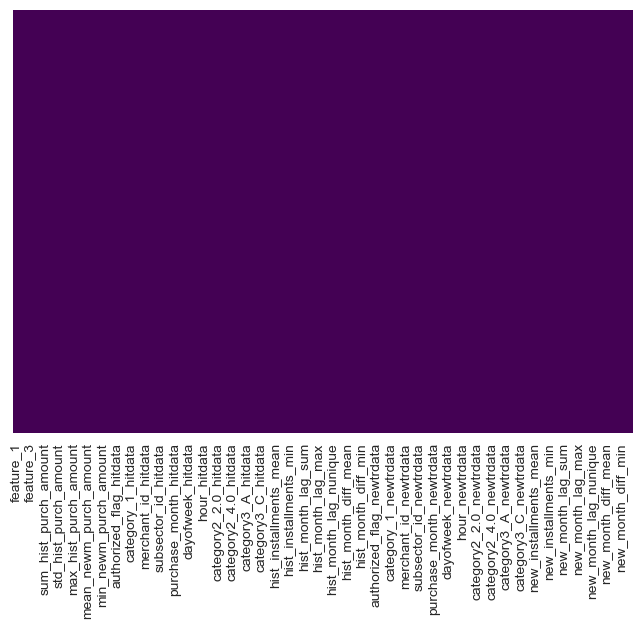

In [575]:
sns.set(font_scale=1.00)
sns.heatmap(dftrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

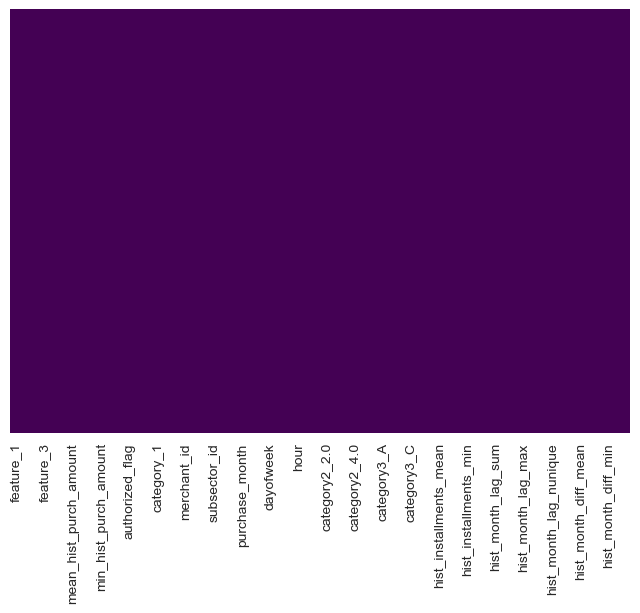

In [576]:
sns.set(font_scale=1.00)
sns.heatmap(dftest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Observation
- All the missing data is replaced in both train and test data sets.
- Now let’s  take a look at Skew and Kurt of the data.

#### [Back to Index](#Index)

<a id=section702><a/>

### 7.2 Feature slection and transformation

- We shall check the __Skewness and Kurtosis__ of each data sets
- Then we shall check for Correlationa and Multicoleanrity between data variables.
- later we shall apply two methods to select the features for modeling (PCA and Mean decrease impurity(Random Forest))

In [577]:
dftrain.skew()

feature_1                        0.358502
feature_2                        0.461125
feature_3                       -0.225757
loyalty_score                   -6.945424
sum_hist_purch_amount           -3.137005
mean_hist_purch_amount           2.438756
std_hist_purch_amount            1.441177
min_hist_purch_amount           11.404073
max_hist_purch_amount            2.056533
sum_newm_purch_amount           -2.506878
mean_newm_purch_amount           2.623684
std_newm_purch_amount            1.907168
min_newm_purch_amount            4.486002
max_newm_purch_amount            1.534880
authorized_flag_hitdata         -8.285448
city_id_hitdata                  0.512036
category_1_hitdata               3.568131
merchant_category_id_hitdata    -0.353967
merchant_id_hitdata              0.025094
state_id_hitdata                 0.018306
subsector_id_hitdata            -0.994290
purchase_year_hitdata            2.634068
purchase_month_hitdata           0.096299
weekofyear_hitdata               0

In [578]:
dftest.skew()

feature_1                    0.382051
feature_2                    0.412481
feature_3                   -0.121127
sum_hist_purch_amount       -2.538178
mean_hist_purch_amount       1.666925
std_hist_purch_amount        1.007037
min_hist_purch_amount        4.274096
max_hist_purch_amount        0.904789
authorized_flag             -8.040524
city_id                      0.505321
category_1                   2.431904
merchant_category_id        -0.286292
merchant_id                  0.023728
state_id                     0.044555
subsector_id                -1.026122
purchase_year                2.356449
purchase_month               0.155213
weekofyear                   0.293788
dayofweek                   -0.335565
weekend                      2.887010
hour                        -0.863832
category2_1.0               -0.141407
category2_2.0                4.730408
category2_3.0                1.592387
category2_4.0                2.596553
category2_5.0                2.217057
category3_A 

- We can see negetive skews as well as positive skews in the data, which indicateshe skewness is substantial and the distribution is far from symmetrical.
- Lets see the Kurtosis for both the data set.

In [579]:
dftrain.kurt()

feature_1                        -0.907537
feature_2                        -1.088808
feature_3                        -1.952944
loyalty_score                    57.340005
sum_hist_purch_amount            14.621115
mean_hist_purch_amount           10.571237
std_hist_purch_amount             2.980498
min_hist_purch_amount           211.478329
max_hist_purch_amount             9.975541
sum_newm_purch_amount             8.746158
mean_newm_purch_amount           11.551782
std_newm_purch_amount             5.223893
min_newm_purch_amount            28.238449
max_newm_purch_amount             2.537235
authorized_flag_hitdata          66.782208
city_id_hitdata                  -0.973448
category_1_hitdata               10.753060
merchant_category_id_hitdata     -1.168145
merchant_id_hitdata              -1.242978
state_id_hitdata                 -0.740146
subsector_id_hitdata              0.128694
purchase_year_hitdata             4.948208
purchase_month_hitdata           -1.660538
weekofyear_

In [580]:
dftest.kurt()

feature_1                    -0.714383
feature_2                    -1.214965
feature_3                    -2.005485
sum_hist_purch_amount         8.098383
mean_hist_purch_amount        3.623980
std_hist_purch_amount         0.663493
min_hist_purch_amount        21.686244
max_hist_purch_amount         1.098610
authorized_flag              63.282780
city_id                      -1.094314
category_1                    3.953597
merchant_category_id         -1.260130
merchant_id                  -1.298723
state_id                     -0.829741
subsector_id                  0.082421
purchase_year                 3.588638
purchase_month               -1.607183
weekofyear                   -1.478723
dayofweek                    -1.206853
weekend                       6.398715
hour                          0.580922
category2_1.0                -2.000107
category2_2.0                20.582491
category2_3.0                 0.541007
category2_4.0                 4.789891
category2_5.0            

- The Kurtosis must be between 3 and -3 but we can see many variables are above that.

#### [Back to Index](#Index)

#### Correlation of each data

In [581]:
corr=dftrain.corr()['loyalty_score']
corr[np.argsort(corr, axis=0)[::-1]]

loyalty_score                   1.000000e+00
subsector_id_newtrdata          2.649006e-02
category2_4.0_hitdata           6.159696e-02
category2_3.0_newtrdata        -3.155680e-02
merchant_id_hitdata             5.053393e-02
std_hist_purch_amount           4.422336e-02
mean_hist_purch_amount          4.262525e-02
max_hist_purch_amount           4.243456e-02
min_hist_purch_amount           3.152040e-02
state_id_newtrdata             -2.452541e-02
category2_2.0_hitdata           2.628219e-02
hist_month_lag_nunique          2.609513e-02
hist_month_diff_nunique         2.605494e-02
new_month_lag_mean              2.461744e-02
new_month_lag_sum              -2.405607e-02
sum_newm_purch_amount           2.203226e-02
hist_month_diff_sum             2.160625e-02
city_id_hitdata                 1.995014e-02
hour_newtrdata                 -4.536527e-02
category2_1.0_hitdata           1.840805e-02
hour_hitdata                    1.681699e-02
category2_5.0_hitdata           1.677518e-02
new_month_

- we dont see much good correlation between Target and rest of the data.
- Lets see the Multicollinearity variables

#### [Back to Index](#Index)

__Multicollinearity__

In [582]:
correlations = dftrain.corr()# taking correlation into variable
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
45           (new_month_diff_max, new_month_diff_mean)     0.984214
57           (new_month_diff_mean, new_month_diff_min)     0.979971
29   (hist_month_diff_nunique, hist_month_lag_nunique)     0.979201
82        (hist_month_diff_sum, sum_hist_purch_amount)    -0.972676
87           (hist_month_diff_sum, hist_month_lag_sum)    -0.961575
44    (purchase_month_newtrdata, weekofyear_newtrdata)     0.958242
52             (new_month_diff_sum, new_month_lag_sum)     0.953429
61            (new_month_diff_max, new_month_diff_min)     0.943003
71         (new_month_diff_sum, sum_newm_purch_amount)    -0.936514
48          (new_month_lag_sum, sum_newm_purch_amount)    -0.932770
67         (hist_month_lag_sum, sum_hist_purch_amount)     0.919650
102       (category3_A_hitdata, category3_A_newtrdata)     0.889995
64        (hist_month_lag_min, hist_month_lag_nunique)    -0.885999
106          (hist_month_lag_mean, hist_month_lag_min)     0.882460
55       (hist_month_diff_nunique, hist_month_lag_min)    -0.866988
1           (category3_A_hitdata, category3_B_hitdata)    -0.865647
108     (new_month_diff_mean, purchase_year_newtrdata)    -0.856521
25       (new_month_diff_max, purchase_year_newtrdata)    -0.849957
69          (hist_month_diff_min, new_month_diff_mean)     0.845526
19           (hist_month_diff_min, new_month_diff_min)     0.843074
73   (purchase_month_newtrdata, purchase_year_newtr...    -0.838137
107  (hist_installments_max, hist_installments_nuni...     0.836409
24       (new_month_diff_min, purchase_year_newtrdata)    -0.835101
66           (hist_month_diff_min, new_month_diff_max)     0.832663
7          (hist_month_diff_max, hist_month_diff_mean)     0.826132
17           (hist_month_diff_max, hist_month_lag_min)    -0.825216
41      (max_newm_purch_amount, std_newm_purch_amount)     0.823539
21    (category2_3.0_hitdata, category2_3.0_newtrdata)     0.823382
88       (new_installments_max, new_installments_mean)     0.815871
91     (purchase_year_newtrdata, weekofyear_newtrdata)    -0.810417
..                                                 ...          ...
26         (hist_month_diff_mean, hist_month_lag_mean)    -0.578132
90         (hist_month_diff_mean, new_month_diff_mean)     0.575965
51      (hist_month_diff_nunique, hist_month_diff_sum)     0.565938
8         (category3_B_hitdata, hist_installments_max)     0.564354
37          (hist_month_diff_mean, new_month_diff_max)     0.556238
27     (max_hist_purch_amount, mean_hist_purch_amount)     0.554051
30            (dayofweek_newtrdata, weekend_newtrdata)     0.550374
4        (category3_A_newtrdata, new_installments_max)    -0.547780
95       (hist_month_diff_sum, hist_month_lag_nunique)     0.546354
101       (category3_A_hitdata, hist_installments_sum)    -0.545979
94         (category3_A_hitdata, new_installments_max)    -0.542641
104          (new_installments_sum, new_month_lag_sum)     0.534963
32       (max_newm_purch_amount, new_installments_max)     0.526332
11    (mean_hist_purch_amount, mean_newm_purch_amount)     0.523776
31      (category2_1.0_hitdata, category2_3.0_hitdata)    -0.523473
70     (hist_installments_mean, std_hist_purch_amount)     0.522280
86        (category3_B_hitdata, hist_installments_sum)     0.520350
10     (hist_month_diff_mean, purchase_year_newtrdata)    -0.520267
34    (hist_month_diff_nunique, sum_hist_purch_amount)    -0.518327
28         (category3_A_hitdata, new_installments_sum)    -0.517695
9       (hist_installments_mean, new_installments_max)     0.515919
35   (max_newm_purch_amount, new_installments_nunique)     0.513025
38   (category2_1.0_newtrdata, category2_3.0_newtrd...    -0.508002
68       (new_installments_mean, new_installments_sum)     0.507532
47    (category3_B_hitdata, hist_installments_nunique)     0.506365
33      (new_month_diff_max, purchase_month_newtrdata)     0.505924
84     (new_month_diff_mean, purchase_month_newtrdata)     0.505442
3             (hist_month_la

In [583]:
correlations = dftest.corr()# taking correlation into variable
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
41       (hist_month_diff_sum, sum_hist_purch_amount)    -0.967231
2           (hist_month_diff_sum, hist_month_lag_sum)    -0.935423
35          (hist_month_lag_mean, hist_month_lag_min)     0.886146
22        (hist_month_lag_sum, sum_hist_purch_amount)     0.878553
8         (hist_month_diff_max, hist_month_diff_mean)     0.848647
40  (hist_installments_max, hist_installments_nuni...     0.846036
21                         (category3_A, category3_B)    -0.834847
19       (hist_month_lag_min, hist_month_lag_nunique)    -0.826688
3      (max_hist_purch_amount, std_hist_purch_amount)     0.812930
36          (hist_month_diff_max, hist_month_lag_min)    -0.809502
28    (hist_installments_max, hist_installments_mean)     0.788541
5     (mean_hist_purch_amount, std_hist_purch_amount)     0.775506
18               (category3_A, hist_installments_max)    -0.745464
10         (hist_month_diff_max, hist_month_lag_mean)    -0.734470
30              (category3_A, hist_installments_mean)    -0.724596
38        (hist_month_diff_mean, hist_month_diff_min)     0.714069
31      (hist_month_lag_mean, hist_month_lag_nunique)    -0.707850
39                       (purchase_month, weekofyear)     0.703162
43           (category3_A, hist_installments_nunique)    -0.699306
20  (hist_installments_nunique, hist_installments_...     0.662989
11      (hist_month_diff_max, hist_month_lag_nunique)     0.655179
17              (category3_C, hist_installments_mean)     0.649717
33  (hist_installments_mean, hist_installments_nun...     0.624534
12       (hist_month_lag_nunique, hist_month_lag_sum)    -0.618755
7     (max_hist_purch_amount, mean_hist_purch_amount)     0.618264
1                              (feature_1, feature_3)     0.608542
24    (hist_installments_mean, std_hist_purch_amount)     0.607079
0      (hist_installments_max, std_hist_purch_amount)     0.603231
6         (hist_month_diff_mean, hist_month_lag_mean)    -0.591591
42                             (category_1, state_id)    -0.588540
26       (hist_installments_sum, hist_month_diff_sum)     0.580512
32   (hist_installments_mean, mean_hist_purch_amount)     0.578761
44     (hist_installments_max, hist_installments_sum)     0.569633
13  (hist_installments_nunique, max_hist_purch_amo...     0.567961
37     (hist_installments_max, max_hist_purch_amount)     0.564329
16               (category3_A, hist_installments_sum)    -0.544578
23  (hist_installments_nunique, std_hist_purch_amo...     0.529139
9           (hist_month_lag_mean, hist_month_lag_sum)     0.523168
34               (hist_month_diff_max, purchase_year)    -0.520783
14                     (category2_1.0, category2_3.0)    -0.519499
45     (hist_installments_sum, max_hist_purch_amount)     0.519422
15      (hist_month_diff_sum, hist_month_lag_nunique)     0.517298
29    (mean_hist_purch_amount, min_hist_purch_amount)     0.517286
25               (category3_B, hist_installments_max)     0.517072
27               (category3_B, hist_installments_sum)     0.510283
4            (category3_B, hist_installments_nunique)     0.505872

- The result show there is high, very high Multicollinearity between variables which is not good for a ML model.

In [584]:
## Will save this into CSV file for further use

dftrain.to_csv('../Transformed_Datafiles/TraingTransformed.csv')
dftest.to_csv('../Transformed_Datafiles/TestTransformed.csv')

#### [Back to Index](#Index)

<a id=section7021><a/>

### 7.2.1 Random forest feature importance (Mean decrease impurity)

In [585]:
treefetTrain = dftrain.copy()
treefetTest = dftest.copy()

In [586]:
treeTarget = treefetTrain.pop('loyalty_score')

In [587]:
from sklearn.ensemble import RandomForestRegressor
X = treefetTrain
y= treeTarget
names = treefetTrain.columns
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.0619, 'hour_newtrdata'), (0.0543, 'hist_installments_sum'), (0.054, 'merchant_category_id_newtrdata'), (0.0524, 'merchant_id_newtrdata'), (0.0515, 'merchant_id_hitdata'), (0.0495, 'new_month_diff_mean'), (0.0465, 'min_newm_purch_amount'), (0.0452, 'max_newm_purch_amount'), (0.0422, 'weekend_hitdata'), (0.0318, 'category2_3.0_hitdata'), (0.0314, 'merchant_category_id_hitdata'), (0.0277, 'hist_month_diff_min'), (0.0265, 'purchase_month_hitdata'), (0.0238, 'purchase_month_newtrdata'), (0.0233, 'city_id_newtrdata'), (0.0219, 'city_id_hitdata'), (0.0198, 'feature_2'), (0.0196, 'mean_hist_purch_amount'), (0.0174, 'subsector_id_hitdata'), (0.0171, 'std_hist_purch_amount'), (0.0157, 'max_hist_purch_amount'), (0.0154, 'new_month_diff_sum'), (0.015, 'category2_5.0_newtrdata'), (0.0145, 'mean_newm_purch_amount'), (0.0143, 'hour_hitdata'), (0.0143, 'hist_month_lag_mean'), (0.0143, 'hist_installments_mean'), (0.0127, 'sum_newm_purch_amount'), (0.0126, 'weekofyear

#### Observation

- We doesn’t see much impurity in this variables, let’s take entire data set for modelling
- We shall apply LightGBM algorithm with K-Folds CV and try to build a model.

#### [Back to Index](#Index)

### LightGBM 

#### Let’s import the required libraries

In [588]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [589]:
# set default parameters for 1st round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.01, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.5,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [590]:
nfolds = 10
nrepeats = 2 
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(treefetTrain))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(treefetTest))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(treefetTrain.values,treeTarget.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(treefetTrain.iloc[trn_idx], label=treeTarget.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(treefetTrain.iloc[val_idx], label=treeTarget.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 2000
    lgb_m = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_m.predict(treefetTrain.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = treefetTrain.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_m.predict(treefetTest, num_iteration=lgb_m.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, treeTarget))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.71884	valid_1's rmse: 1.67201
Early stopping, best iteration is:
[97]	training's rmse: 3.72493	valid_1's rmse: 1.67199
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.5931	valid_1's rmse: 3.65927
[200]	training's rmse: 3.40053	valid_1's rmse: 3.63761
Early stopping, best iteration is:
[160]	training's rmse: 3.46539	valid_1's rmse: 3.6146
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.78038	valid_1's rmse: 1.43485
[200]	training's rmse: 3.60001	valid_1's rmse: 1.4381
Early stopping, best iteration is:
[157]	training's rmse: 3.67585	valid_1's rmse: 1.41949
fold n°3
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.13058	valid_1's rmse: 6.87426
Early stopping, best iteration is:
[1]	training's rmse: 3.3369	valid_1's rmse: 6.81585
fold n°4
Training until valid

In [591]:
# ranking all feature by avg importance score from Kfold, select top50
all_features = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
all_features.reset_index(inplace=True)
important_features = list(all_features[0:50]['feature'])
all_features[0:50]

feature  importance
0            max_newm_purch_amount       94.40
1            std_newm_purch_amount       73.75
2                  city_id_hitdata       55.60
3             hist_month_diff_mean       53.00
4           mean_hist_purch_amount       52.90
5            sum_newm_purch_amount       52.10
6            std_hist_purch_amount       51.55
7            min_newm_purch_amount       50.05
8            max_hist_purch_amount       49.60
9               new_month_diff_sum       49.30
10          mean_newm_purch_amount       48.05
11             merchant_id_hitdata       45.40
12           merchant_id_newtrdata       45.15
13             new_month_diff_mean       42.75
14           sum_hist_purch_amount       40.85
15           hist_installments_sum       40.80
16           min_hist_purch_amount       39.40
17              new_month_lag_mean       38.90
18                    hour_hitdata       38.45
19              weekofyear_hitdata       38.10
20             hist_month_diff_sum       37.15
21          hist_installments_mean       36.30
22             hist_month_diff_min       35.30
23               dayofweek_hitdata       34.40
24                  hour_newtrdata       31.40
25               new_month_lag_sum       30.50
26            weekofyear_newtrdata       29.75
27              hist_month_lag_sum       28.70
28             hist_month_lag_mean       27.95
29          purchase_month_hitdata       27.55
30                 weekend_hitdata       27.50
31  merchant_category_id_newtrdata       25.50
32               city_id_newtrdata       25.05
33          subsector_id_newtrdata       24.20
34          hist_month_lag_nunique       24.05
35           category2_3.0_hitdata       23.05
36                state_id_hitdata       22.65
37    merchant_category_id_hitdata       19.30
38              hist_month_lag_min       18.40
39              new_month_diff_min       18.35
40         hist_month_diff_nunique       17.70
41             hist_month_diff_max       17.35
42            new_installments_sum       16.60
43            subsector_id_hitdata       14.45
44                       feature_2       14.05
45        purchase_month_newtrdata       13.85
46                       feature_1       12.05
47              new_month_diff_max       11.85
48              category_1_hitdata       11.70
49           hist_installments_max       10.55

Training data feature correlation

In [592]:
# Check feature correlation 
# important_features = list(final_importance['feature'][0:60])
df = treefetTrain[important_features]
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(high_cor))
print(high_cor)

7
['hist_month_diff_sum', 'new_month_lag_sum', 'hist_month_lag_sum', 'new_month_diff_min', 'hist_month_diff_nunique', 'purchase_month_newtrdata', 'new_month_diff_max']


In [593]:
# final selected features: drop highly correlated features from important features.
features = [i for i in important_features if i not in high_cor]
print(len(features))
print(features)

43
['max_newm_purch_amount', 'std_newm_purch_amount', 'city_id_hitdata', 'hist_month_diff_mean', 'mean_hist_purch_amount', 'sum_newm_purch_amount', 'std_hist_purch_amount', 'min_newm_purch_amount', 'max_hist_purch_amount', 'new_month_diff_sum', 'mean_newm_purch_amount', 'merchant_id_hitdata', 'merchant_id_newtrdata', 'new_month_diff_mean', 'sum_hist_purch_amount', 'hist_installments_sum', 'min_hist_purch_amount', 'new_month_lag_mean', 'hour_hitdata', 'weekofyear_hitdata', 'hist_installments_mean', 'hist_month_diff_min', 'dayofweek_hitdata', 'hour_newtrdata', 'weekofyear_newtrdata', 'hist_month_lag_mean', 'purchase_month_hitdata', 'weekend_hitdata', 'merchant_category_id_newtrdata', 'city_id_newtrdata', 'subsector_id_newtrdata', 'hist_month_lag_nunique', 'category2_3.0_hitdata', 'state_id_hitdata', 'merchant_category_id_hitdata', 'hist_month_lag_min', 'hist_month_diff_max', 'new_installments_sum', 'subsector_id_hitdata', 'feature_2', 'feature_1', 'category_1_hitdata', 'hist_installments

Test data feature correlation

In [594]:
# Check feature correlation 
# important_features = list(final_importance['feature'][0:60])
corr_matrix = treefetTest.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
high_cor_Test = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(high_cor_Test))
print(high_cor_Test)

2
['hist_month_diff_sum', 'hist_month_diff_nunique']


In [595]:
# final selected features: drop highly correlated features from important features.
Test_features = [i for i in treefetTest.columns if i not in high_cor_Test]
print(len(Test_features))
print(Test_features)

42
['feature_1', 'feature_2', 'feature_3', 'sum_hist_purch_amount', 'mean_hist_purch_amount', 'std_hist_purch_amount', 'min_hist_purch_amount', 'max_hist_purch_amount', 'authorized_flag', 'city_id', 'category_1', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id', 'purchase_year', 'purchase_month', 'weekofyear', 'dayofweek', 'weekend', 'hour', 'category2_1.0', 'category2_2.0', 'category2_3.0', 'category2_4.0', 'category2_5.0', 'category3_A', 'category3_B', 'category3_C', 'hist_installments_sum', 'hist_installments_mean', 'hist_installments_max', 'hist_installments_min', 'hist_installments_nunique', 'hist_month_lag_sum', 'hist_month_lag_mean', 'hist_month_lag_max', 'hist_month_lag_min', 'hist_month_lag_nunique', 'hist_month_diff_mean', 'hist_month_diff_max', 'hist_month_diff_min']


- __Train model with selected important_features only__

In [596]:
# params for 2nd round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.003, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.8,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [597]:
train = treefetTrain[features]
test = treefetTest[Test_features]

In [598]:
# Use Kfold predict
nfolds = 10
nrepeats = 2 

folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(train))
lgb_preds = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, treeTarget.values)): #target.values
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx], label=treeTarget.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(train.iloc[val_idx], label=treeTarget.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 3000
    lgb_model = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_model.predict(train.iloc[val_idx], num_iteration=lgb_model.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = train.columns
    fold_importance_df["importance"] = lgb_model.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_model.predict(test, num_iteration=lgb_model.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, treeTarget))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.90157	valid_1's rmse: 1.74235
[200]	training's rmse: 3.82344	valid_1's rmse: 1.73045
[300]	training's rmse: 3.7537	valid_1's rmse: 1.73907
[400]	training's rmse: 3.69026	valid_1's rmse: 1.72888
[500]	training's rmse: 3.62035	valid_1's rmse: 1.74029
Early stopping, best iteration is:
[443]	training's rmse: 3.66438	valid_1's rmse: 1.72475
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.74875	valid_1's rmse: 3.67291
[200]	training's rmse: 3.67121	valid_1's rmse: 3.67514
Early stopping, best iteration is:
[160]	training's rmse: 3.69845	valid_1's rmse: 3.66145
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.93022	valid_1's rmse: 1.48504
[200]	training's rmse: 3.85557	valid_1's rmse: 1.45336
[300]	training's rmse: 3.78083	valid_1's rmse: 1.44335
[400]	training's rmse: 3.73085	valid_1's rmse: 1.46194


#### Observation

- In first run we got CV score of 3.80 and in Second Run we got CV score of 3.81
- RMSE score we can see few itration had very good  scores __fold n°2 , fold n°4, fold n°9, fold n°12, fold n°14 and fold n°17__
- Lets apply PCA and see if there will be any changes in the score.

#### [Back to Index](#Index)

<a id=section5><a/>

### 7.2.2 Applying PCA on the data.

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [599]:
standTrain = dftrain.copy()
standTest = dftest.copy()

In [600]:
target = standTrain.pop('loyalty_score')

- Lets transform the Training data first

In [601]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
standTrain = scl.fit_transform(standTrain)

In [602]:
scltest = StandardScaler()
standTest = scltest.fit_transform(standTest)

In [603]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(standTrain)

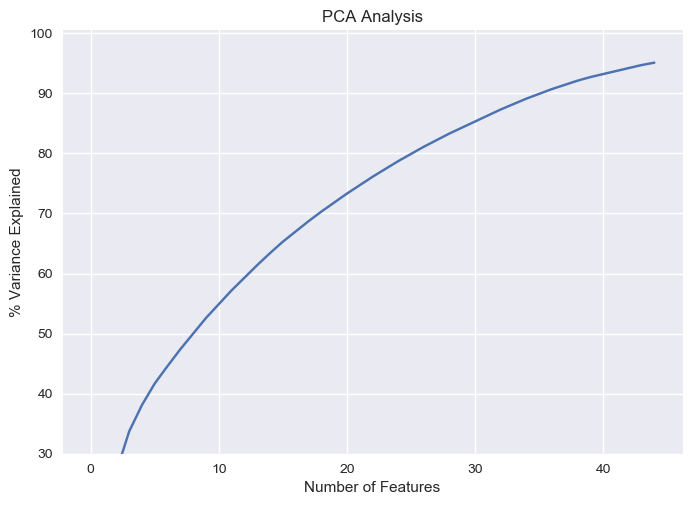

In [604]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [605]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

45 components explain 95% of the variation in data


In [606]:
pca = PCA(n_components=45, random_state = 0)
PcData = pca.fit_transform(standTrain)
PCADataFr = pd.DataFrame(data = PcData)
finalDf = pd.concat([PCADataFr, target], axis = 1)
print(finalDf.shape)

(1000, 46)


In [607]:
finalDf.head()

0         1         2         3         4         5         6  \
0  1.038090  6.434294 -0.536772  2.728679  0.126182 -0.946722 -1.509134   
1 -0.942634  0.670838  3.061569 -2.615031  2.011144  0.750606 -3.298158   
2 -1.475837  1.424302  1.965458 -3.092828 -1.856656 -0.241379 -0.064154   
3  2.522018 -0.229825 -0.889326 -1.840116 -2.672866  0.967417 -0.542227   
4 -0.932648  0.445499  3.369964 -2.166362 -0.963081  3.270706 -0.382244   

          7         8         9      ...              36        37        38  \
0 -0.821280  1.029902 -1.154133      ...       -0.140084 -0.574232  0.616582   
1 -1.340869  0.500059 -1.199659      ...        1.633532 -0.138113 -0.140854   
2  0.011741 -0.737535  0.046847      ...       -0.926339 -0.069316  1.053266   
3 -0.857249  0.473411 -0.065621      ...        0.663205  0.721479  0.463894   
4  0.637249  0.382885  1.285725      ...       -0.895076  0.069266  1.156093   

         39        40        41        42        43        44  loyalty_score  
0  0.419545 -0.190987  0.681918  0.368536 -0.627475 -0.783523       1.463612  
1  0.969715  1.009981  0.388565  0.687667  1.072826 -0.960171      -0.086608  
2 -0.016444 -0.606457  0.174431 -0.354138  0.362422  0.029347       1.367614  
3 -2.016581  1.273245 -0.562643 -0.052158 -0.566232 -0.848317      -1.245025  
4  0.667896  0.572113  0.583880  0.286211  0.459122  0.464915       0.293999  

[5 rows x 46 columns]

- Lets transform test data set

In [608]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(standTest)

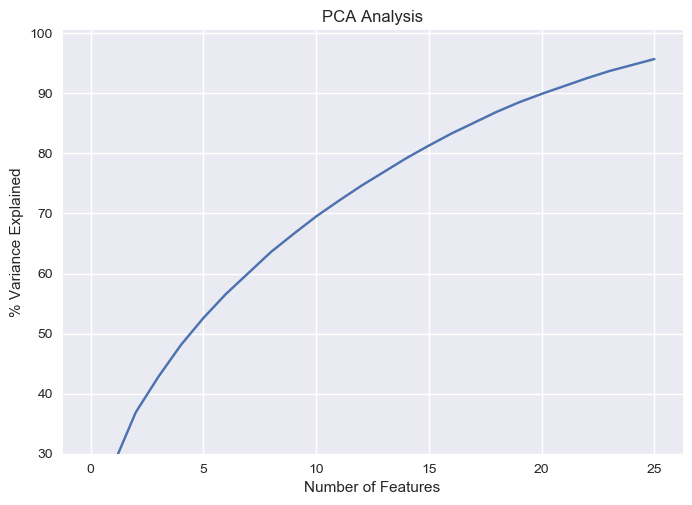

In [609]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [610]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

26 components explain 95% of the variation in data


In [611]:
pca = PCA(n_components=26, random_state = 0)
PcData = pca.fit_transform(standTest)
PCADataFr_testdata = pd.DataFrame(data = PcData)
print(PCADataFr_testdata.shape)

(200, 26)


In [612]:
PCADataFr_testdata.head()

0         1         2         3         4         5         6   \
0  1.398819  0.246868  2.141718  1.262321  1.752288 -0.600724  0.693251   
1 -3.266978 -0.319831 -2.719155  0.914668  0.565382  0.865525  0.885431   
2 -2.085466  1.244385 -0.440439 -0.096163  3.376425  0.602669  0.035664   
3  1.631377 -0.531876  0.087244 -0.545037 -1.843419  0.459377 -2.322330   
4  0.990995 -1.719229 -2.918866  0.689389  4.788776 -0.367349 -2.529951   

         7         8         9     ...           16        17        18  \
0 -2.082698 -0.197419 -0.104944    ...    -0.508849  0.615113 -0.067634   
1 -1.238787 -1.303704  1.326766    ...    -0.515687  0.334635  1.103853   
2  0.665769  0.040552 -0.193047    ...    -1.237106 -1.198184  0.276326   
3 -1.472671  0.310574  0.331698    ...    -0.604941  0.695157 -0.752520   
4  0.186714 -0.127345  0.926385    ...    -2.592652 -0.687629  1.128832   

         19        20        21        22        23        24        25  
0 -0.918787 -1.511679 -0.555063  1.457966 -0.174105  0.185767 -0.513715  
1  0.670771  0.779019  0.334685 -0.439492 -0.440927 -0.497375  0.030820  
2 -0.775475  0.402003  0.504099  0.478651 -0.272836 -0.968417 -0.426383  
3  1.265230  0.108360 -0.804363  1.091805 -0.172103 -0.391802  1.333393  
4  0.085491 -0.266544 -1.193949  0.963999  0.568650 -0.576227 -0.389087  

[5 rows x 26 columns]

#### [Back to Index](#Index)

We are going to use bunch of Algorithms to get the best prediction possible. I will use the following Algorithms.

- __LightGB Regressor__
- __Linear Regression__
  - Hyper-parameter optimizers - __GridSearchCV__
- __Decision Tree Regressor__
  - Hyper-parameter optimizers - __GridSearchCV__
- __Random Forest Regressor__
  - Hyper-parameter optimizers - __RandomizedsearchCV__
- __KNN for regression__
- __Support Vector Machine (SVR - Support vector regression)__

__Split the random variable in train and test data__

In [613]:
target = finalDf.pop('loyalty_score')

In [614]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.20, random_state=1)

In [615]:
print(X_train.shape)
print(X_test.shape)

(800, 45)
(200, 45)


#### [Back to Index](#Index)

### Linear Regression

In [616]:
from sklearn.linear_model import LinearRegression #From Scikit Learn importing Linear regression model
from sklearn.model_selection import train_test_split

linreg_SetA = LinearRegression()
linreg_SetA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [617]:
print('Intercept:',linreg_SetA.intercept_)                                           # print the intercept 
print('Coefficients:',linreg_SetA.coef_)

Intercept: -0.2770364054946919
Coefficients: [ 0.01193422 -0.07650443 -0.02112422 -0.04919775 -0.0513804   0.00402484
  0.13314672 -0.0452358   0.10954444 -0.03219497  0.03447674 -0.00330326
 -0.10168831 -0.02972355 -0.13419894 -0.0591825   0.16222376 -0.01987453
 -0.04655941  0.09202664 -0.06789577  0.0097508  -0.12721654  0.38491717
 -0.31527435 -0.22676238  0.10767331 -0.15793512 -0.4085566   0.11870007
 -0.16008611  0.21186984  0.02893932 -0.30170719 -0.01110278 -0.11046713
  0.03304332 -0.4195907   0.20140345  0.10777901 -0.30238737  0.02083716
  0.02638564 -0.34105281 -0.0081306 ]


In [618]:
predictions = linreg_SetA.predict(X_test)

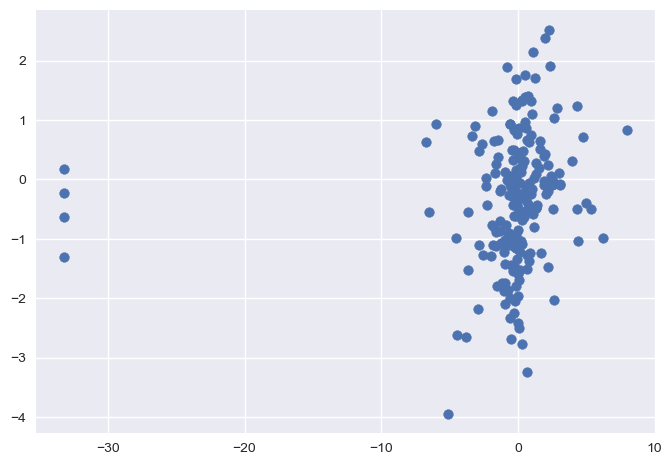

In [619]:
plt.scatter(y_test,predictions)

- We can see how the outlier of the target variable is affecting the prediction.

__Regression Evaluation Metrics__

In [620]:
from sklearn import metrics

In [621]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1614227952535847
MSE: 25.740336271011888
RMSE: 5.073493497681049


- __Lets remove the target variable outlier and see if we can improve the prediction accuracy__

In [622]:
remOutLieTrain = dftrain.copy()
remOutLieTest = dftest.copy()

In [623]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [624]:
# Give the outliers for the first column for example
outliers_iqr(remOutLieTrain['loyalty_score'])

(array([  8,   9,  18,  22,  29,  42,  46,  47,  50,  73,  90,  96,  97,
        106, 109, 115, 127, 133, 157, 162, 163, 183, 207, 209, 221, 255,
        257, 274, 311, 339, 355, 439, 441, 479, 487, 507, 552, 576, 586,
        591, 594, 601, 604, 605, 614, 627, 647, 654, 665, 690, 714, 721,
        738, 744, 754, 758, 762, 764, 816, 830, 856, 868, 872, 881, 882,
        885, 909, 910, 927, 945, 968, 976, 980], dtype=int64),)

In [625]:
remOutLieTrain.drop(remOutLieTrain.index[[8,   9,  18,  22,  29,  42,  46,  47,  50,  73,  90,  96,  97,
        106, 109, 115, 127, 133, 157, 162, 163, 183, 207, 209, 221, 255,
        257, 274, 311, 339, 355, 439, 441, 479, 487, 507, 552, 576, 586,
        591, 594, 601, 604, 605, 614, 627, 647, 654, 665, 690, 714, 721,
        738, 744, 754, 758, 762, 764, 816, 830, 856, 868, 872, 881, 882,
        885, 909, 910, 927, 945, 968, 976, 980]], inplace = True)

In [626]:
remOutLieTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 999
Data columns (total 86 columns):
feature_1                         927 non-null int64
feature_2                         927 non-null int64
feature_3                         927 non-null int64
loyalty_score                     927 non-null float64
sum_hist_purch_amount             927 non-null float64
mean_hist_purch_amount            927 non-null float64
std_hist_purch_amount             927 non-null float64
min_hist_purch_amount             927 non-null float64
max_hist_purch_amount             927 non-null float64
sum_newm_purch_amount             927 non-null float64
mean_newm_purch_amount            927 non-null float64
std_newm_purch_amount             927 non-null float64
min_newm_purch_amount             927 non-null float64
max_newm_purch_amount             927 non-null float64
authorized_flag_hitdata           927 non-null int64
city_id_hitdata                   927 non-null int64
category_1_hitdata       

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



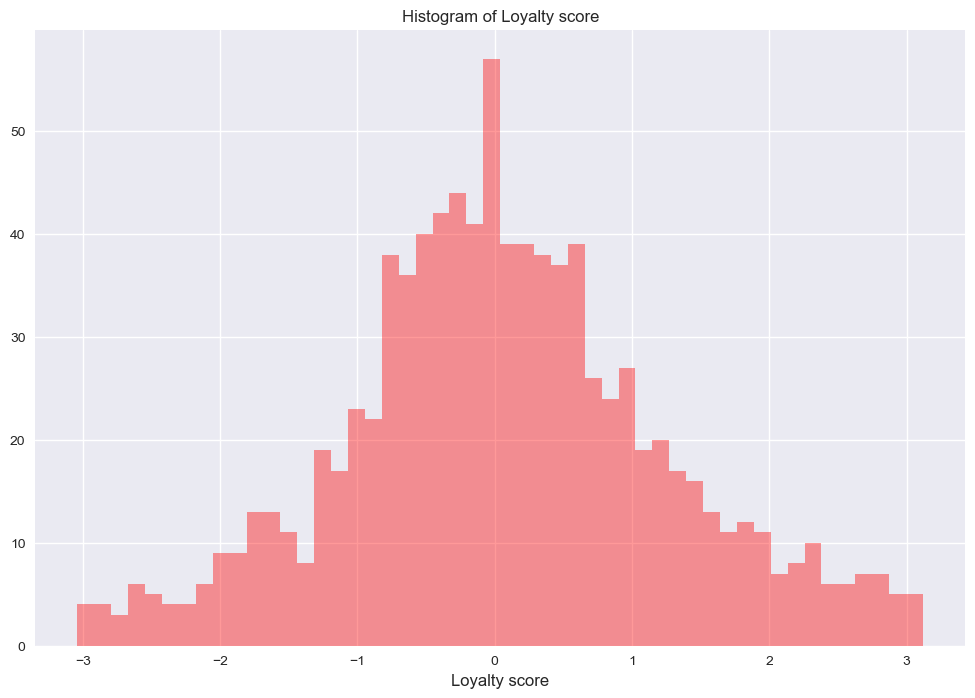

In [627]:
plt.figure(figsize=(12,8))
sns.distplot(remOutLieTrain['loyalty_score'].values, bins=50, kde=False, color="red")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

In [628]:
target = remOutLieTrain.pop('loyalty_score')

- Lets transform the Training data first

In [629]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
remOutLieTrain = scl.fit_transform(remOutLieTrain)

In [630]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(remOutLieTrain)

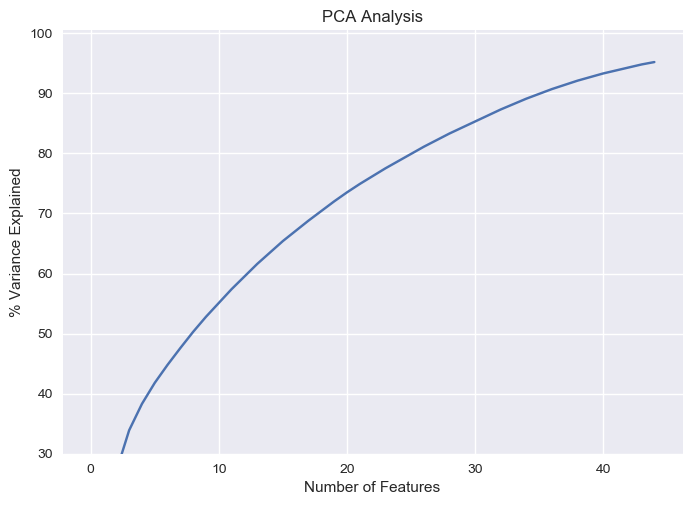

In [631]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [632]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

45 components explain 95% of the variation in data


In [633]:
pca = PCA(n_components=45, random_state = 0)
PcData = pca.fit_transform(remOutLieTrain)
PCADataFr = pd.DataFrame(data = PcData)
finalDf = pd.concat([PCADataFr, target], axis = 1)
print(finalDf.shape)

(995, 46)


In [634]:
finalDf.head()

0         1         2         3         4         5         6  \
0  0.969273  6.463786  0.218974  3.030532  0.311702 -1.034854  1.902473   
1 -0.850257  0.327800  3.007984 -2.582841  2.086918  0.674422  3.719049   
2 -1.409371  1.318390  2.084396 -3.075055 -1.828673 -0.256155 -0.038366   
3  2.491654 -0.009476 -0.946777 -1.794247 -2.664890  0.991260  0.868689   
4 -0.920398  0.165636  3.314444 -2.185986 -0.918526  3.443101  0.212980   

          7         8         9      ...              36        37        38  \
0 -0.544759  0.964414 -0.700340      ...       -0.549366  0.623134  0.547386   
1 -0.727701  0.294312 -1.000791      ...       -1.331249 -0.026686 -0.007714   
2  0.222786 -0.681914 -0.023636      ...        0.853920  0.119594  0.973477   
3 -0.865870  0.526878 -0.050689      ...       -1.173474 -1.182784  0.037681   
4  0.393549  0.174728  0.879191      ...        0.761606  0.338564  1.172196   

         39        40        41        42        43        44  loyalty_score  
0  0.375967 -0.331872 -0.549868  0.210937 -0.799372 -0.625196       1.463612  
1  1.052805  1.019898 -0.391442  0.683790  1.070821 -1.130860      -0.086608  
2 -0.096766 -0.690667 -0.174210 -0.238292  0.417114  0.094630       1.367614  
3 -1.880679  1.251305  0.146576 -0.393516 -0.509270 -0.599196      -1.245025  
4  0.365152  0.442424 -0.602541  0.390926  0.378268  0.316329       0.293999  

[5 rows x 46 columns]

In [635]:
def fillna(df, col):
    for ev in col:
        df[ev].fillna(df[ev].mean(),inplace=True)

In [636]:
fillna(finalDf, finalDf.columns)

In [637]:
mynonObjlist = []
mynonObjlist = finalDf.columns[finalDf.dtypes!=object]

for each in mynonObjlist:
    if finalDf[each].dtypes == np.object:
        print('Its an Object')
    elif finalDf[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, finalDf[each].isnull().sum()))

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



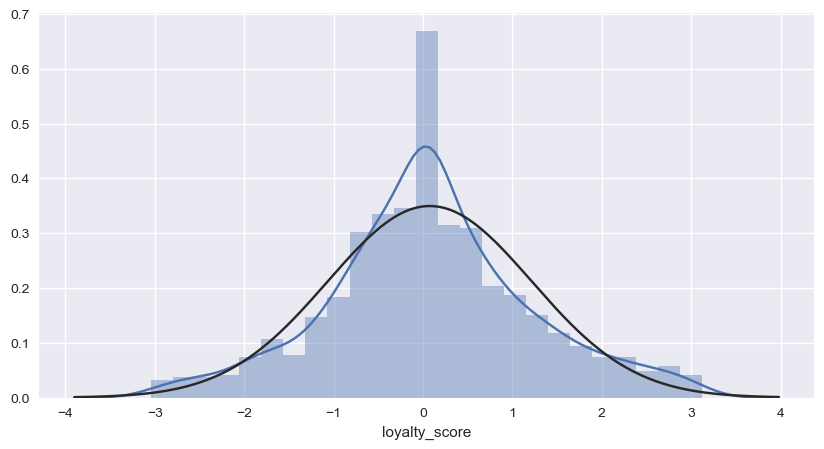

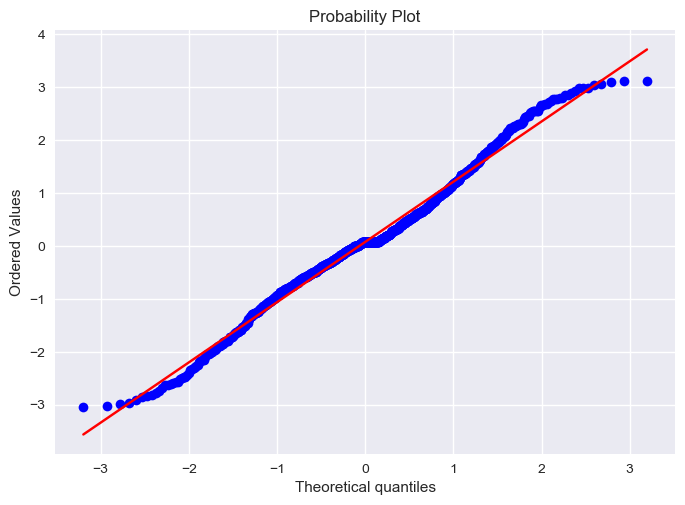

In [638]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize= (10,5))
#histogram and normal probability plot
sns.distplot(finalDf['loyalty_score'], fit=norm);
fig = plt.figure()
res = stats.probplot(finalDf['loyalty_score'], plot=plt)

__Split the random variable in train and test data__

In [639]:
target = finalDf.pop('loyalty_score')

In [640]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.20, random_state=1)

In [641]:
print(X_train.shape)
print(X_test.shape)

(796, 45)
(199, 45)


In [642]:
X_train.isna().values.sum()

0

#### [Back to Index](#Index)

### Linear Regression

In [643]:
from sklearn.linear_model import LinearRegression #From Scikit Learn importing Linear regression model
from sklearn.model_selection import train_test_split

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 0.07512845833262771
Coefficients: [-0.0033034  -0.00387435 -0.02779412 -0.01312579  0.00917429 -0.01877027
  0.01580929  0.00806213 -0.05575953  0.02904023 -0.00343537  0.02276848
  0.03294365  0.03531659 -0.00808952  0.01717451 -0.05352349  0.00902245
  0.02334509 -0.01110881  0.03054395 -0.02351303 -0.00060975  0.00811819
  0.06315097  0.00495167 -0.01640683  0.01273322 -0.01072543 -0.09708149
 -0.00186584 -0.06189179  0.04745832 -0.07556149  0.06312738  0.0014486
 -0.01342715 -0.10753463  0.04254892  0.02056902 -0.00363408  0.01738384
 -0.01556553 -0.03009436 -0.01899932]


In [644]:
predictions = linreg.predict(X_test)

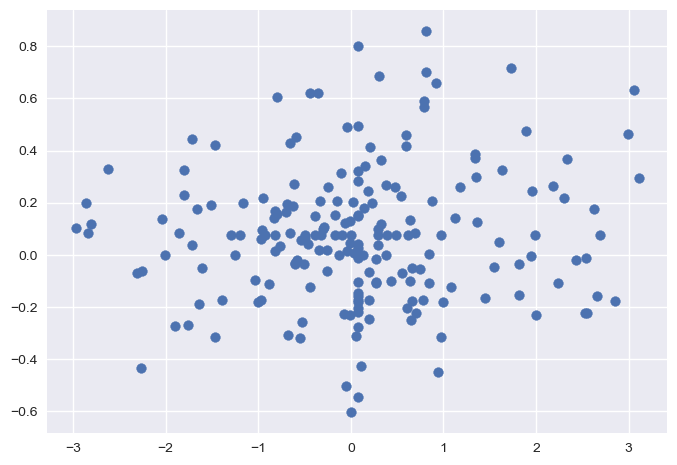

In [645]:
plt.scatter(y_test,predictions)

__Regression Evaluation Metrics__

In [646]:
from sklearn import metrics

In [647]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9352688633724195
MSE: 1.5152753593028825
RMSE: 1.2309652144975025


#### [Back to Index](#Index)

### Hyper-parameter optimizers - GridSearchCV

In [648]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.25, random_state=1)

In [649]:
print(X_train.shape)
print(X_test.shape)

(746, 45)
(249, 45)


In [650]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

parameters = {'normalize':[True,False], 'copy_X':[True, False]}

# create and fit a ridge regression model, testing each alpha
model = LinearRegression()
linreg_grid = GridSearchCV(estimator=model, param_grid=parameters)
linreg_grid.fit(X_train, y_train)

print(linreg_grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [651]:
print(linreg_grid.best_score_)

-0.1536456580227793


In [652]:
y_pred_test = linreg_grid.predict(X_test)

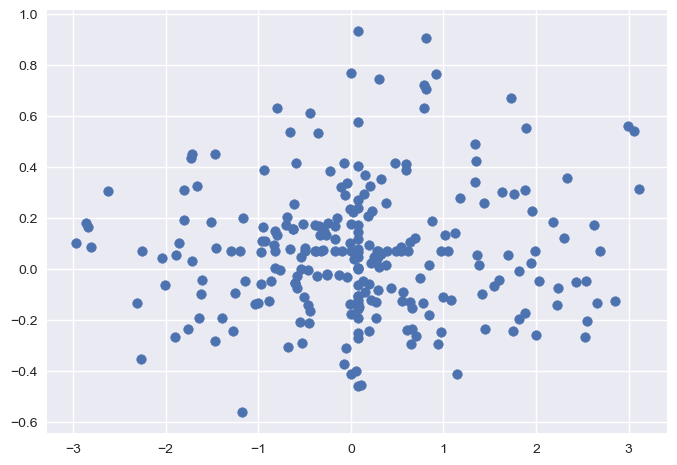

In [653]:
plt.scatter(y_test,y_pred_test)

In [654]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.9168773710779211
MSE: 1.4479217416954786
RMSE: 1.2032961986541297


#### [Back to Index](#Index)

### Decision Tree Regressor

In [655]:
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.20, random_state=1)

In [656]:
print(X_train.shape)
print(y_train.shape)

(796, 45)
(796,)


In [657]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [658]:
y_pred_train = DT_model.predict(X_train)

In [659]:
y_pred_test = DT_model.predict(X_test)

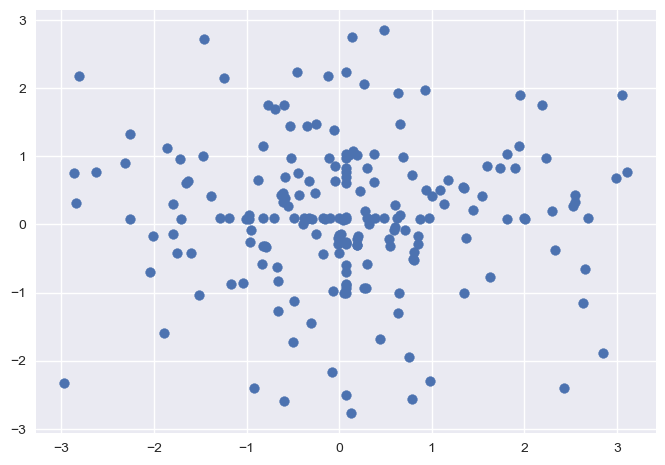

In [660]:
plt.scatter(y_test,y_pred_test)

In [661]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 1.2686734851940287
MSE: 2.6330719006270944
RMSE: 1.6226743051601866


#### [Back to Index](#Index)

### Decision Tree with Gridsearch

In [662]:
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.25, random_state=1)

In [663]:
print(X_train.shape)
print(y_train.shape)

(746, 45)
(746,)


In [664]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_regressor = DecisionTreeRegressor(random_state = 0)

tree_para = {'max_depth': range(2,100),
             'max_features': ['sqrt', 'log2', None],
             'min_samples_leaf': [2, 3, 4, 5],
             'min_samples_split': [6, 8, 10, 12]}    

DT_model_Grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
DT_model_Grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 100), 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [665]:
y_pred_train = DT_model_Grid_search.predict(X_train)

In [666]:
y_pred_test1 = DT_model_Grid_search.predict(X_test)

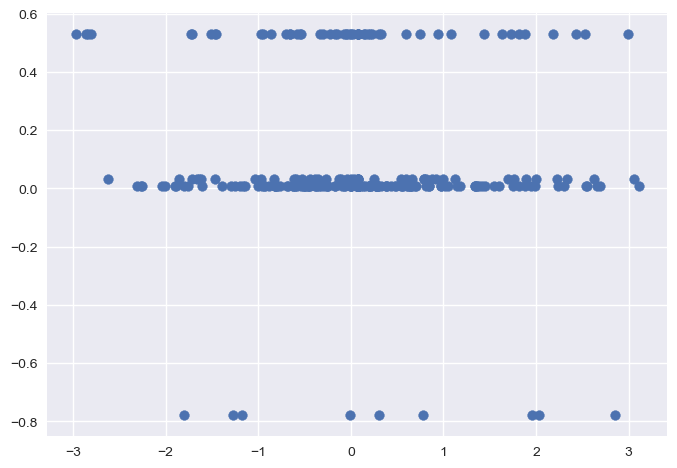

In [667]:
plt.scatter(y_test,y_pred_test1)

In [668]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test1)))

MAE: 0.9378409037751205
MSE: 1.5380828670456723
RMSE: 1.2401946891700804


#### [Back to Index](#Index)

### Random Forest Regressor

In [669]:
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.25, random_state=1)

In [670]:
print(X_train.shape)
print(y_train.shape)

(746, 45)
(746,)


#### [Back to Index](#Index)

- __Model without parameter specification__

In [671]:
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor(random_state = 0)

RFR_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

#### [Back to Index](#Index)

- __Model with parameters specified__

In [672]:
RFR_model1 = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

RFR_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [673]:
y_pred_train = RFR_model.predict(X_train)
y_pred_train1 = RFR_model1.predict(X_train)

In [674]:
y_pred_test = RFR_model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = RFR_model1.predict(X_test)

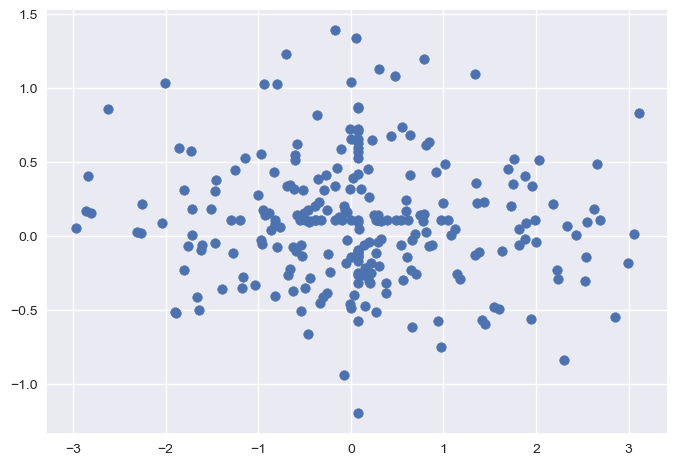

In [675]:
plt.scatter(y_test,y_pred_test)

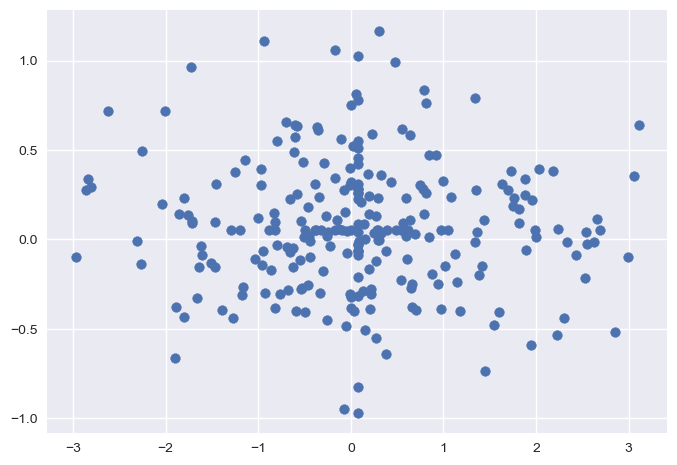

In [676]:
plt.scatter(y_test,y_pred_test1)

In [677]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 1.0079878370300086
MSE: 1.6630441067207196
RMSE: 1.2895906740980718


In [678]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test1)))

MAE: 0.9690265535910357
MSE: 1.587800596251685
RMSE: 1.2600795991728797


#### [Back to Index](#Index)

### Random forest with RandomizedsearchCV

In [679]:
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.20, random_state=1)

In [680]:
print(X_train.shape)
print(y_train.shape)

(796, 45)
(796,)


In [681]:
RFR_model_RCV = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 4,
                                min_samples_leaf = 2)

RFR_model_RCV.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [682]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ['sqrt', 'log2', None]
             }

# run randomized search
n_iter_search = 50
RFR_model_RandSearchCV = RandomizedSearchCV(RFR_model_RCV, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [683]:
RFR_model_RandSearchCV.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': range(2, 5), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F3C975EB00>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F3C975E0B8>, 'bootstrap': [True, False], 'n_estimators': [100, 400, 700, 1000, 1500], 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [684]:
y_pred_test = RFR_model_RandSearchCV.predict(X_test)

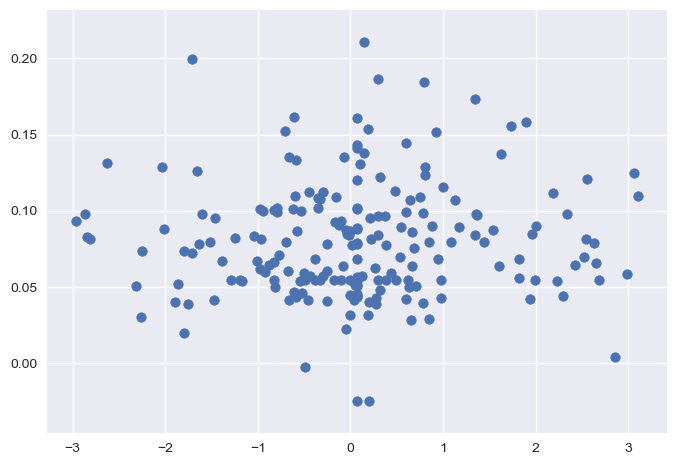

In [685]:
plt.scatter(y_test,y_pred_test)

In [686]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.905491088766138
MSE: 1.4973546888381404
RMSE: 1.2236644510804995


#### [Back to Index](#Index)

### KNN for regression

In [687]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
regressor = KNeighborsRegressor(n_neighbors=3)

# Fitting the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [688]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0401377357788946
MSE: 1.7425868767257695
RMSE: 1.32007078474064


### Using cross-validation for parameter tuning:

In [689]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='mean_squared_error')
    cv_scores.append(scores.mean())

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.

<Figure size 800x550 with 0 Axes>

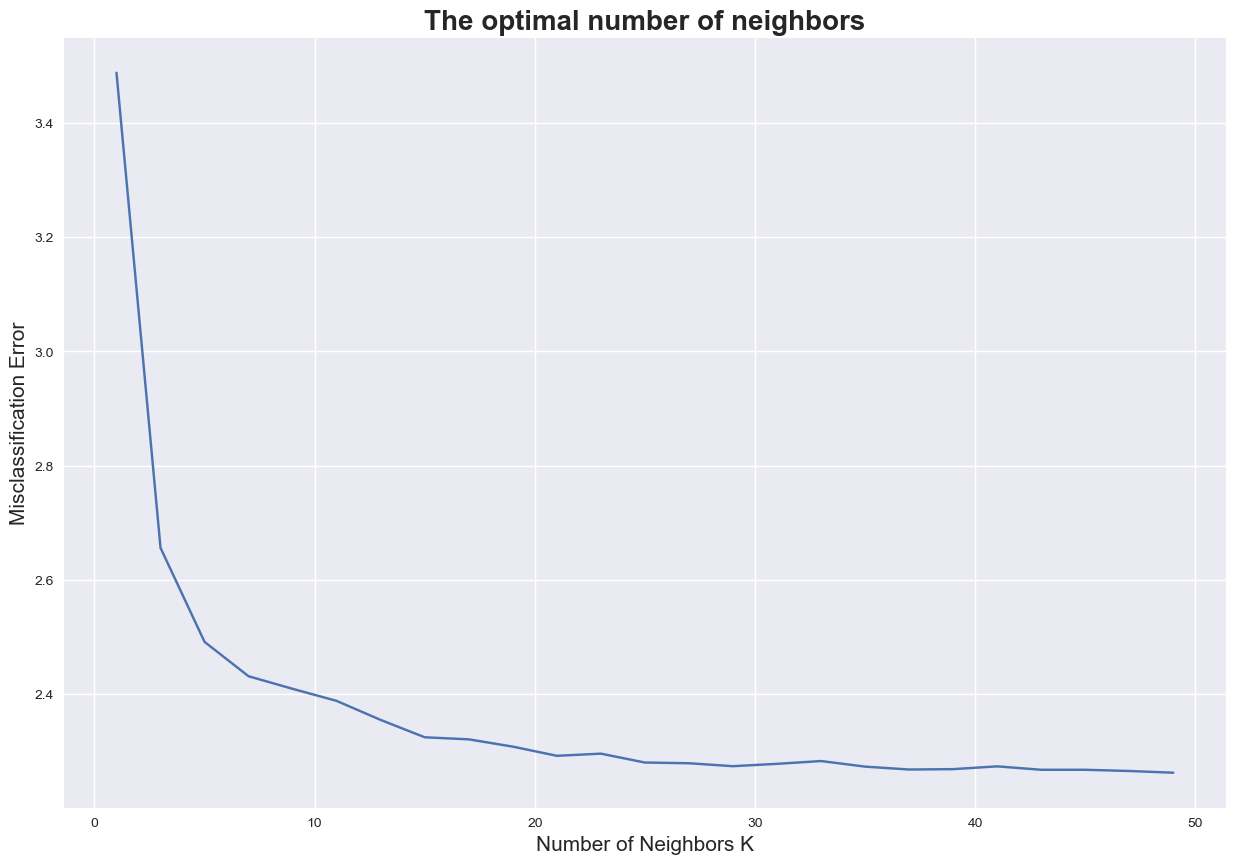

In [690]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [691]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 49.


__ KNN is not showing any improvement on the data, let us see with SVM(SVR) and compare the output__

#### [Back to Index](#Index)

### Support Vector Machine for Regression

In [692]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [693]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')

In [694]:
clf.fit(X_train, y_train)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [695]:
Ypredict = clf.predict(X_test)

In [696]:
print('MAE:', metrics.mean_absolute_error(y_test, Ypredict))
print('MSE:', metrics.mean_squared_error(y_test, Ypredict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Ypredict)))

MAE: 0.9663054385423105
MSE: 1.6901749877175967
RMSE: 1.3000673012262083


#### Observation

- Below are the Regression Evaluation Metrics for all the above models.

- __Linear Regression (Before removing outliers)__

MAE: 2.1687682545661655
MSE: 25.710852570696304
RMSE: 5.070587004548517

- __Linear Regression (After removing outliers)__

MAE: 0.9355455087373108
MSE: 1.5155794941952183
RMSE: 1.231088743428035

- __Linear Regression GRidSearch CV__

MAE: 0.9165293189071614
MSE: 1.4505586271263893
RMSE: 1.2043913928314123

- __Decision Tree Regressor__

MAE: 1.3318301340118506
MSE: 2.8479205769093094
RMSE: 1.6875783172668786

- __Decision Tree with Gridsearch__

MAE: 0.9336752554001756
MSE: 1.5133211210581432
RMSE: 1.2301711755110112

- __Random Forest Regressor__

  - Without parameter
MAE: 0.9701444045117288
MSE: 1.5667419699777458
RMSE: 1.2516956379159216
  - With parameter
MAE: 0.9507732777140986
MSE: 1.540262226514336
RMSE: 1.2410730141753692

- __Random forest with RandomizedsearchCV__

MAE: 0.9049772434415088
MSE: 1.493002834545131
RMSE: 1.2218849514357442

- __KNN for regression__

MAE: 1.0489946619109933
MSE: 1.8285261953760168
RMSE: 1.3522300822626365

- __SVM (Simple Vector Regressor - SVR)__

MAE: 0.9713428036197526
MSE: 1.7014624671982113
RMSE: 1.3044011910444622

- Lets try to use K-folds and split the data and later try to use all the  above models and see the results.

#### [Back to Index](#Index)

<a id=section7023><a/>

### 7.2.3 K-fold CV for PCA data 

### A. LightGB Regressor

In [697]:
# set default parameters for 1st round training
params = {'boosting': 'gbdt',
          'objective':'regression',
          'metric': 'rmse',
          'learning_rate': 0.01, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large, but over-fitting
          'max_bin': 66,  #60 #50 # large,but slower,over-fitting
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.5,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [698]:
nfolds = 10
nrepeats = 2 
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(finalDf))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(PCADataFr_testdata))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(finalDf.values,target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(finalDf.iloc[trn_idx], label=target.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(finalDf.iloc[val_idx], label=target.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 2000
    lgb_m = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_m.predict(finalDf.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = finalDf.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_m.predict(PCADataFr_testdata, num_iteration=lgb_m.best_iteration) / (nfolds*nrepeats)

print("CV score: {:<8.5f}".format(np.sqrt(mean_squared_error(fold_pred, target))))

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.02452	valid_1's rmse: 1.21832
Early stopping, best iteration is:
[18]	training's rmse: 1.1118	valid_1's rmse: 1.20698
fold n°1
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.04669	valid_1's rmse: 0.972458
Early stopping, best iteration is:
[9]	training's rmse: 1.14939	valid_1's rmse: 0.948922
fold n°2
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.03931	valid_1's rmse: 1.07017
Early stopping, best iteration is:
[1]	training's rmse: 1.14881	valid_1's rmse: 1.05849
fold n°3
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.02807	valid_1's rmse: 1.23284
Early stopping, best iteration is:
[1]	training's rmse: 1.13114	valid_1's rmse: 1.22265
fold n°4
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 1.02445	valid_1's rmse: 1.26286
Early stopp

#### [Back to Index](#Index)

### B. Linear Regression

In [699]:
from sklearn.model_selection import KFold
X = finalDf
y = target
n_splits=5
kf = KFold(n_splits, random_state=11)
accu = 0
maaccu = 0 
linreg_preds = np.zeros(len(PCADataFr_testdata))
##KFold(n_splits=2, random_state=None, shuffle=False)
for train, test in kf.split(X.values, y.values):
    X_train = np.array(X.values)[train]
    X_test = np.array(X.values)[test]
    y_train = np.array(y.values)[train]
    y_test = np.array(y.values)[test]
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred_test = linreg.predict(X_test)
    accu += np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    maaccu += metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('---------------------------------------------------------------')
    
print('Avg MAE : ', maaccu/n_splits)
print('Avg RMSE : ', accu/n_splits)

MAE: 0.8480823678520875
MSE: 1.2683692198605134
RMSE: 1.1262189928519735
---------------------------------------------------------------
MAE: 0.8765249233059065
MSE: 1.2911122710534422
RMSE: 1.1362712136868742
---------------------------------------------------------------
MAE: 0.9528142241132509
MSE: 1.541108068002108
RMSE: 1.2414137376403196
---------------------------------------------------------------
MAE: 0.8593880917056348
MSE: 1.265430440345434
RMSE: 1.1249135257189478
---------------------------------------------------------------
MAE: 0.9578047387160452
MSE: 1.5993391705874875
RMSE: 1.2646498213290063
---------------------------------------------------------------
Avg MAE :  0.8989228691385851
Avg RMSE :  1.1786934582454243


#### [Back to Index](#Index)

### C. Linear Regression - GridSearchCV

In [700]:
from sklearn.model_selection import KFold
X = finalDf
y = target
n_splits=5
kf = KFold(n_splits, random_state=11)
accu = 0
maaccu = 0 
##KFold(n_splits=2, random_state=None, shuffle=False)
for train, test in kf.split(X.values, y.values):
    X_train = np.array(X.values)[train]
    X_test = np.array(X.values)[test]
    y_train = np.array(y.values)[train]
    y_test = np.array(y.values)[test]
    
    # create and fit a ridge regression model, testing each alpha
    model = LinearRegression()
    linreg_grid = GridSearchCV(estimator=model, param_grid=parameters)
    linreg_grid.fit(X_train, y_train)
    y_pred_test = linreg_grid.predict(X_test)
    
    
    
    accu += np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    maaccu += metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('---------------------------------------------------------------')
    
print('Avg MAE : ', maaccu/n_splits)
print('Avg RMSE : ', accu/n_splits)

MAE: 0.8480823678520875
MSE: 1.2683692198605134
RMSE: 1.1262189928519735
---------------------------------------------------------------
MAE: 0.8765249233059065
MSE: 1.2911122710534422
RMSE: 1.1362712136868742
---------------------------------------------------------------
MAE: 0.9528142241132509
MSE: 1.5411080680021074
RMSE: 1.2414137376403194
---------------------------------------------------------------
MAE: 0.8593880917056348
MSE: 1.265430440345434
RMSE: 1.1249135257189478
---------------------------------------------------------------
MAE: 0.9578047387160452
MSE: 1.5993391705874875
RMSE: 1.2646498213290063
---------------------------------------------------------------
Avg MAE :  0.8989228691385851
Avg RMSE :  1.1786934582454243


#### [Back to Index](#Index)

### D. Decision Tree Regressor

In [701]:
from sklearn.model_selection import KFold
X = finalDf
y = target
n_splits=5
kf = KFold(n_splits, random_state=11)
accu = 0
maaccu = 0 
##KFold(n_splits=2, random_state=None, shuffle=False)
for train, test in kf.split(X.values, y.values):
    X_train = np.array(X.values)[train]
    X_test = np.array(X.values)[test]
    y_train = np.array(y.values)[train]
    y_test = np.array(y.values)[test]
    
    DT_model = DecisionTreeRegressor()
    DT_model.fit(X_train, y_train)
    y_pred_test = DT_model.predict(X_test)
        
    accu += np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    maaccu += metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('---------------------------------------------------------------')
    
print('Avg MAE : ', maaccu/n_splits)
print('Avg RMSE : ', accu/n_splits)

MAE: 1.2905347579921183
MSE: 2.6893963698952446
RMSE: 1.6399379164758783
---------------------------------------------------------------
MAE: 1.4033670121564674
MSE: 3.0756158900803485
RMSE: 1.7537433934530868
---------------------------------------------------------------
MAE: 1.3720983370537962
MSE: 2.86164131386374
RMSE: 1.6916386475437772
---------------------------------------------------------------
MAE: 1.2011008407494321
MSE: 2.5077290091752515
RMSE: 1.5835810712354614
---------------------------------------------------------------
MAE: 1.24935078671849
MSE: 2.747947754037141
RMSE: 1.657693504251356
---------------------------------------------------------------
Avg MAE :  1.3032903469340609
Avg RMSE :  1.6653189065919118


#### [Back to Index](#Index)

### E. Random Forest

In [702]:
from sklearn.model_selection import KFold
X = finalDf
y = target
n_splits=5
kf = KFold(n_splits, random_state=11)
accu = 0
maaccu = 0 
##KFold(n_splits=2, random_state=None, shuffle=False)
for train, test in kf.split(X.values, y.values):
    X_train = np.array(X.values)[train]
    X_test = np.array(X.values)[test]
    y_train = np.array(y.values)[train]
    y_test = np.array(y.values)[test]
    
    RFR_model = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
    RFR_model.fit(X_train, y_train)
    y_pred_test = RFR_model.predict(X_test)
    accu += np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    maaccu += metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('---------------------------------------------------------------')
    
    
print('Avg MAE : ', maaccu/n_splits)
print('Avg RMSE : ', accu/n_splits)

MAE: 0.8407634291089419
MSE: 1.2387196475095847
RMSE: 1.1129778288490677
---------------------------------------------------------------
MAE: 0.8742664996359774
MSE: 1.265497347859047
RMSE: 1.1249432642844914
---------------------------------------------------------------
MAE: 0.9934091028946959
MSE: 1.5949114749940665
RMSE: 1.2628980461597312
---------------------------------------------------------------
MAE: 0.8645701608522254
MSE: 1.2681739028887002
RMSE: 1.126132275928854
---------------------------------------------------------------
MAE: 1.0116090354621616
MSE: 1.7418581636912465
RMSE: 1.3197947430154608
---------------------------------------------------------------
Avg MAE :  0.9169236455908003
Avg RMSE :  1.1893492316475212


#### [Back to Index](#Index)

### F. Support Vector Machine for Regression

In [703]:
from sklearn.model_selection import KFold
X = finalDf
y = target
n_splits=5
kf = KFold(n_splits, random_state=11)
accu = 0
maaccu = 0 
##KFold(n_splits=2, random_state=None, shuffle=False)
for train, test in kf.split(X.values, y.values):
    X_train = np.array(X.values)[train]
    X_test = np.array(X.values)[test]
    y_train = np.array(y.values)[train]
    y_test = np.array(y.values)[test]
    
    clf = SVR(C=0.8, epsilon=0.2, kernel='poly')
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    
    accu += np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    maaccu += metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('---------------------------------------------------------------')
    
    
print('Avg MAE : ', maaccu/n_splits)
print('Avg RMSE : ', accu/n_splits)

MAE: 0.8805456354229766
MSE: 1.356588752662959
RMSE: 1.1647269004633485
---------------------------------------------------------------
MAE: 1.0491239498380853
MSE: 2.4872247468285997
RMSE: 1.5770937660229971
---------------------------------------------------------------
MAE: 0.9664728725764232
MSE: 1.566391952777974
RMSE: 1.2515558128896904
---------------------------------------------------------------
MAE: 1.0165234046786131
MSE: 1.8532102143923486
RMSE: 1.361326637656205
---------------------------------------------------------------
MAE: 1.0656099576139388
MSE: 1.9252167931606567
RMSE: 1.3875218171836639
---------------------------------------------------------------
Avg MAE :  0.9956551640260074
Avg RMSE :  1.348444986843181


#### Observation

A. LightGB Regressor
CV score: 1.13966
    
B. Linear Regression
MAE: 0.8591391767383477
MSE: 1.2646408300059175
RMSE: 1.1245625060466482
    
C. Linear Regression - GridSearchCV
MAE: 0.8591391767383477
MSE: 1.2646408300059178
RMSE: 1.1245625060466482
    
D. Decision Tree Regressor
MAE: 1.1556218396066633
MSE: 2.175811652747097
RMSE: 1.4750632707606468
    
E. Random Forest
MAE: 0.8532986437063059
MSE: 1.2922266454722304
RMSE: 1.1367614725492021
    
F. Support Vector Machine for Regression
MAE: 0.8821821949093602
MSE: 1.3578212279946877
RMSE: 1.165255863746108

- By looking at the above results we can say __LightGB Regressor, Linear Regression, Linear Regression - GridSearchCV and Random Forest__ are giving good results.

- Lets use optimization technique and try __Stochastic Gradient Descent__ and see if we can improve the accuracy.

#### [Back to Index](#Index)

<a id=section7024><a/>

### 7.2.4 Stochastic Gradient Descent(SGD)

- We shall aplly SGD Regressor with GridSearchCV

In [704]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDf, target, test_size=0.20, random_state=1)

In [705]:
print(X_train.shape)
print(X_test.shape)

(796, 45)
(199, 45)


#### [Back to Index](#Index)

### Linear Regression

In [706]:
from sklearn.linear_model import LinearRegression #From Scikit Learn importing Linear regression model
from sklearn.model_selection import train_test_split

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 0.07512845833262771
Coefficients: [-0.0033034  -0.00387435 -0.02779412 -0.01312579  0.00917429 -0.01877027
  0.01580929  0.00806213 -0.05575953  0.02904023 -0.00343537  0.02276848
  0.03294365  0.03531659 -0.00808952  0.01717451 -0.05352349  0.00902245
  0.02334509 -0.01110881  0.03054395 -0.02351303 -0.00060975  0.00811819
  0.06315097  0.00495167 -0.01640683  0.01273322 -0.01072543 -0.09708149
 -0.00186584 -0.06189179  0.04745832 -0.07556149  0.06312738  0.0014486
 -0.01342715 -0.10753463  0.04254892  0.02056902 -0.00363408  0.01738384
 -0.01556553 -0.03009436 -0.01899932]


In [707]:
y_pred_test = linreg.predict(X_test)

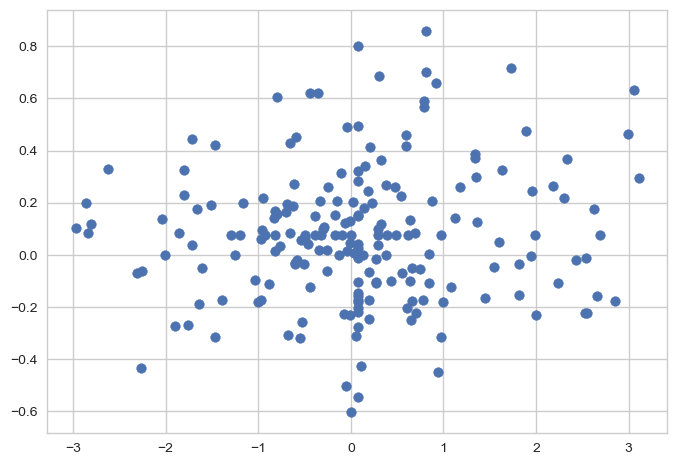

In [708]:
plt.scatter(y_test,predictions)

In [709]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.9352688633724195
MSE: 1.5152753593028825
RMSE: 1.2309652144975025


### __Lets apply SGD Regression__

In [710]:
from sklearn.linear_model import SGDRegressor

In [711]:
sgd_model = SGDRegressor(loss = "squared_loss", average=True)

In [712]:
%time sgd_model = sgd_model.fit(X_train,y_train)

Wall time: 83.9 ms


C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning:

max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



In [713]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [714]:
y_test_pred_sgd = clf.predict(X_test)

In [715]:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred_sgd))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_sgd))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_sgd)))

MAE: 0.903986130752283
MSE: 1.3998037419479026
RMSE: 1.1831330195493246


#### Observation

- We can see that applying SGD Regression on Linear model dint work as expected.
- We can apply the same on GridSearchCV, Looking at the above results in 7.2.3 i do not think there will be any changes.
- With all the above results let’s take LightGBM as our model for prediction.

#### [Back to Index](#Index)

<a id=section8><a/>

## 8. Model Selection and Submission

__Brief__

- I have tried Six ML models for the Loyalty Prediction data set, we have seen many different result with many different combination of parameters.
- After looking at all the results and comparing the RMSE of each results, We think __LightGBM__ will be the best model for prediction.
- __LightGBM__ will be fast and also its giving good results.

In [723]:
# Add target value to submition file
lgb_submition = pd.DataFrame(lgb_preds)
lgb_submition.to_csv("../Transformed_Datafiles/finalPrediction_submition.csv", index=False)

In [724]:
submission_data = pd.read_csv("../Transformed_Datafiles/finalPrediction_submition.csv")

In [725]:
submission_data.rename(index=str, columns={"0": "test_target"}, inplace= True)

In [726]:
submission_data.head()

test_target
0     0.026683
1     0.068384
2     0.059626
3     0.045918
4     0.059555

#### [Back to Index](#Index)

<a id=section9><a/>

## 9. Conclusion and Reference

### Conclusion

- ML projects are inherently uncertain and the approach i have used is accountable for hitting a specific accuracy goal. 
- I have performed error analysis for each model, I have tried to tune the models to get accurate results. 
- I have tried to implement all of my ideas as much as possible. I have done some trial and error to see how it works.
- I have explored and performed Data Analysis and Data Cleaning to build my ML Model as accurate as possible.
- Things which i have not performed in depth is using __bagging and boosting__ which i really wanted to do on this data, due to time constraint i could not do it, will try to implement it next time.
- Overall the Model looks good and __LightGBM model__ has given good RMSE score. Will try to tune up the model in future.